In [12]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay

In [13]:
EXAM_NAMES = ['Kuis 2', 'UTS']
EXAM_NUMBERS = {
    'Kuis 2': ['IA', 'IB', 'IC'],
    'UTS': ['IA', 'IB']
}
EXAMS = []
for exam_name in EXAM_NAMES:
    for exam_number in EXAM_NUMBERS[exam_name]:
        EXAMS.append((exam_name, exam_number))

X_AXIS = 'nilai autograder'
Y_AXIS = 'nilai manual'
EPS = 0.001

import os 
import sys

module_path = os.path.abspath(os.path.join('..')) 
if module_path not in sys.path: 
    sys.path.append(module_path) 
    
from grader.src.ged.classes.general_cost_function import RelabelMethod
from grader.src.grader import Grader, GraphPreprocessType

REAL_GRADE_FILENAME = 'Real Results.csv' 
AFILE_PREFIX = 'Grade Results_'
def get_afilename(s):
    return f'{AFILE_PREFIX}{s}'

real_dataframe = pd.read_csv(REAL_GRADE_FILENAME)
dataframes = {}
for node_cost in range(1, 4):
    for edge_cost in range(1, 4):
        if node_cost == edge_cost and node_cost != 1:
            continue
        for relabel_method in RelabelMethod.__iter__():
            for graph_preprocess_type in GraphPreprocessType.__iter__():
                for suff in ['', '_APR']:
                    filename = get_afilename(f'{relabel_method.name}_{graph_preprocess_type.name}_C{node_cost}{edge_cost}{suff}.csv')
                    if filename not in os.listdir('./'):
                        continue
                    dataframes[filename] = pd.read_csv(filename).rename(columns={'grade': 'nilai autograder'})
                    dataframes[filename] = pd.merge(dataframes[filename], real_dataframe, on=['nim', 'exam_name', 'number'])

  exam_name number       nim  nilai manual
0    Kuis 2     IA  10119057          75.0
1    Kuis 2     IA  13517016          67.5
2    Kuis 2     IA  13518021          75.0
3    Kuis 2     IA  13518073          72.5
4    Kuis 2     IA  13519001         100.0
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264, 5)
(264

In [4]:
# Correlation function
def correlation(df):
    return df.corr()

In [5]:
# MAE (Mean Absolute Error) function
def mae(df):
    return mean_absolute_error(df[X_AXIS], df[Y_AXIS])

In [6]:
# Linear Regression Plot function
def linear_regression_plot(name, df):
    m, b = np.polyfit(df[X_AXIS], df[Y_AXIS], 1)
    print(f'Info for plot={name}: m={m}, b={b}')
    fig, ax = plt.subplots(figsize=(8, 8), dpi=60)
    ax.scatter(df[X_AXIS], df[Y_AXIS])
    ax.set_title(f'Perbandingan Hasil Penilaian Menggunakan Sistem Autograder\n dan Hasil Penilaian Manual oleh Pendidik\n{name}')
    ax.set_xlabel('Hasil Penilaian Menggunakan Sistem Autograder')
    ax.set_ylabel('Hasil Penilaian Manual oleh Pendidik')
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 100])
    ax.set_aspect(1)
    ax.plot(df[Y_AXIS], m * df[Y_AXIS] + b)
    plt.show()

In [7]:
# Confusion Matrix Plot function
def confusion_matrix_plot(name, df):
    bins = [10 * x - EPS for x in range(11)] + [100 + EPS]
    labels = range(11)

    cat_X = pd.cut(df[X_AXIS], bins=bins, labels=labels)
    cat_Y = pd.cut(df[Y_AXIS], bins=bins, labels=labels)
    categorized_grade = pd.concat([cat_X, cat_Y], axis=1)
    
    cm = confusion_matrix(categorized_grade[X_AXIS], categorized_grade[Y_AXIS], labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    fig, ax = plt.subplots(figsize=(10, 8), dpi=60)
    ax.set_title(f'Confusion Matrix Perbandingan Hasil Penilaian Menggunakan Sistem Autograder\n dan Hasil Penilaian Manual oleh Pendidik\n{name}')
    disp.plot(ax=ax)
    disp.ax_.set(xlabel=X_AXIS, ylabel=Y_AXIS)
    plt.show()

In [32]:
# Print Correlations
all_correls = {}
correls = []
for name, df in dataframes.items():
    corr = correlation(df)
    correls.append((corr[X_AXIS][Y_AXIS], name))
    all_correls[name] = {}
    all_correls[name]['all'] = corr[X_AXIS][Y_AXIS]
    
correls.sort(reverse=True)
for corr, name in correls:
    print(f'{name}: {corr}')

Grade Results_NONE_UNCOLLAPSE_C31.csv: 0.7449776532642571
Grade Results_NONE_UNCOLLAPSE_C21.csv: 0.7371931649705262
Grade Results_NONE_UNCOLLAPSE_C32.csv: 0.7292346551031936
Grade Results_EXACT_UNCOLLAPSE_C11.csv: 0.7248189118154916
Grade Results_DAMERAU_LD_UNCOLLAPSE_C11.csv: 0.7226600508301619
Grade Results_COUNTER_UNCOLLAPSE_C11.csv: 0.7226600508301619
Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C11.csv: 0.7226600508301619
Grade Results_NONE_UNCOLLAPSE_C11.csv: 0.7168720779498187
Grade Results_COUNTER_UNCOLLAPSE_C12.csv: 0.7064204296592465
Grade Results_NONE_UNCOLLAPSE_C23.csv: 0.7059701874597814
Grade Results_COUNTER_COLLAPSE_NBE_C31_APR.csv: 0.7052570098667071
Grade Results_EXACT_UNCOLLAPSE_C12.csv: 0.7027802603818181
Grade Results_DAMERAU_LD_UNCOLLAPSE_C12.csv: 0.7027802603818181
Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C31_APR.csv: 0.7008161230811273
Grade Results_DAMERAU_LD_COLLAPSE_NBE_C31_APR.csv: 0.7000148327759066
Grade Results_NONE_UNCOLLAPSE_C12.csv: 0.6948790033541328
Grade R

In [33]:
exam_correls = {}
for exam in EXAMS:
    exam_correls[exam] = []
    for _, name in correls:
        df = dataframes[name]
        corr = correlation(df.loc[(df['exam_name'] == exam[0]) & (df['number'] == exam[1])])
        exam_correls[exam].append((corr[X_AXIS][Y_AXIS], name))
        all_correls[name][f'{exam[0]} {exam[1]}'] = corr[X_AXIS][Y_AXIS]
    exam_correls[exam].sort(reverse=True)
    
for exam in EXAMS:
    for corr, name in exam_correls[exam][:10]:
        print(f'{exam} {name}:\n {corr}', '\n-----\n')
    print('\n\n\n')
# for _, name in correls[90: 120]:
#     df = dataframes[name]
#     for exam in EXAMS:
#         corr = correlation(df.loc[(df['exam_name'] == exam[0]) & (df['number'] == exam[1])])
#         print(f'{exam} {name}:\n {corr[X_AXIS][Y_AXIS]}', '\n-----\n')

('Kuis 2', 'IA') Grade Results_EXACT_COLLAPSE_NBE_C23_APR.csv:
 0.22759777493635613 
-----

('Kuis 2', 'IA') Grade Results_DAMERAU_LD_COLLAPSE_NBE_C23_APR.csv:
 0.21072691884258601 
-----

('Kuis 2', 'IA') Grade Results_EXACT_COLLAPSE_NBE_C32_APR.csv:
 0.21044917990688966 
-----

('Kuis 2', 'IA') Grade Results_COUNTER_COLLAPSE_NBE_C32_APR.csv:
 0.21022040081470203 
-----

('Kuis 2', 'IA') Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C32_APR.csv:
 0.2031003848721801 
-----

('Kuis 2', 'IA') Grade Results_DAMERAU_LD_COLLAPSE_NBE_C32_APR.csv:
 0.1993051393937309 
-----

('Kuis 2', 'IA') Grade Results_COUNTER_COLLAPSE_NBE_C31_APR.csv:
 0.1971047887120603 
-----

('Kuis 2', 'IA') Grade Results_EXACT_COLLAPSE_NBE_C31_APR.csv:
 0.18914549699189356 
-----

('Kuis 2', 'IA') Grade Results_NONE_PROPAGATE_BRANCHING_C13.csv:
 0.18647716445483423 
-----

('Kuis 2', 'IA') Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C31_APR.csv:
 0.18571887460108424 
-----





('Kuis 2', 'IB') Grade Results_EXACT_UNCOLLAPSE

In [36]:
for name, all_corr in all_correls.items():
    print(f'{name}:')
    for exam, corr in all_corr.items():
        print(f'{exam}: {corr}')
    print('\n')

Grade Results_NONE_UNCOLLAPSE_C11.csv:
all: 0.7168720779498187
Kuis 2 IA: -0.1498997440810635
Kuis 2 IB: 0.4832269677852789
Kuis 2 IC: 0.6619171177283789
UTS IA: 0.34101680476335366
UTS IB: 0.26158377472777095


Grade Results_NONE_UNCOLLAPSE_C11_APR.csv:
all: 0.6848532040105724
Kuis 2 IA: -0.15213427191222773
Kuis 2 IB: 0.4600456460094974
Kuis 2 IC: 0.6500554287485432
UTS IA: 0.38081349792210134
UTS IB: 0.2915045421789954


Grade Results_NONE_COLLAPSE_C11.csv:
all: 0.6242814140350493
Kuis 2 IA: 0.12357335381800219
Kuis 2 IB: 0.30920232724037766
Kuis 2 IC: 0.47542518988079185
UTS IA: 0.5701844029175446
UTS IB: 0.5397599812847885


Grade Results_NONE_COLLAPSE_C11_APR.csv:
all: 0.6655327185332549
Kuis 2 IA: 0.1258964067109781
Kuis 2 IB: 0.34718903526991307
Kuis 2 IC: 0.6450660497185712
UTS IA: 0.5861941180635524
UTS IB: -0.02910374149619204


Grade Results_NONE_COLLAPSE_NBE_C11.csv:
all: 0.6416554205057077
Kuis 2 IA: 0.18042228579793665
Kuis 2 IB: -0.11966473670815904
Kuis 2 IC: 0.6281952

In [9]:
# Print MAE
# for name, df in dataframes.items():
#     print(f'MAE (Mean Absolute Error) of dataframe {name} exam: {mae(df)}')
    
maes = []
for name, df in dataframes.items():
    maes.append((mae(df), name))
maes.sort()
for mae, name in maes:
    print(f'{name}: {mae}')

Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C31_APR.csv: 10.432160293235848
Grade Results_COUNTER_UNCOLLAPSE_C31_APR.csv: 10.432160293235848
Grade Results_DAMERAU_LD_UNCOLLAPSE_C31_APR.csv: 10.432160293235848
Grade Results_EXACT_UNCOLLAPSE_C31_APR.csv: 10.432160293235848
Grade Results_COUNTER_COLLAPSE_NBE_C31_APR.csv: 10.559645765070268
Grade Results_NONE_UNCOLLAPSE_C31_APR.csv: 10.731115086500447
Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C31_APR.csv: 10.80719672672152
Grade Results_DAMERAU_LD_COLLAPSE_NBE_C31_APR.csv: 10.890566570455954
Grade Results_COUNTER_COLLAPSE_NBE_C21_APR.csv: 11.275137163618323
Grade Results_NONE_COLLAPSE_C21_APR.csv: 11.283605869229342
Grade Results_NONE_COLLAPSE_C31_APR.csv: 11.300397501989929
Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C21_APR.csv: 11.326455449354254
Grade Results_COUNTER_UNCOLLAPSE_C21_APR.csv: 11.326455449354254
Grade Results_DAMERAU_LD_UNCOLLAPSE_C21_APR.csv: 11.326455449354254
Grade Results_EXACT_UNCOLLAPSE_C21_APR.csv: 11.326455449354254
Grade Re

Linear Regression Plot of Grade Results_NONE_UNCOLLAPSE_C31.csv exam:
Info for plot=Grade Results_NONE_UNCOLLAPSE_C31.csv: m=0.693915122642896, b=12.546129735488405


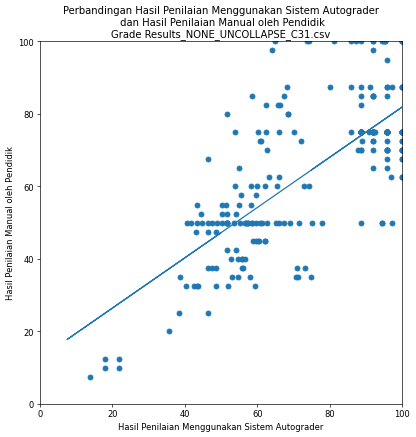

Linear Regression Plot of Grade Results_NONE_UNCOLLAPSE_C21.csv exam:
Info for plot=Grade Results_NONE_UNCOLLAPSE_C21.csv: m=0.6084285452926526, b=20.447690627006427


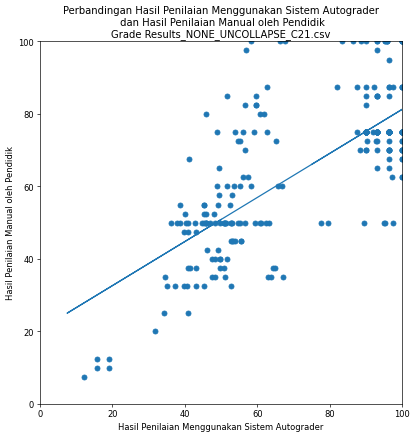

Linear Regression Plot of Grade Results_NONE_UNCOLLAPSE_C32.csv exam:
Info for plot=Grade Results_NONE_UNCOLLAPSE_C32.csv: m=0.5506359430602193, b=25.694705159951823


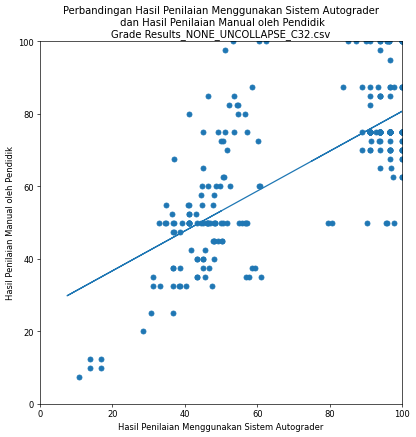

Linear Regression Plot of Grade Results_EXACT_UNCOLLAPSE_C11.csv exam:
Info for plot=Grade Results_EXACT_UNCOLLAPSE_C11.csv: m=0.4939103956138316, b=31.888160726085253


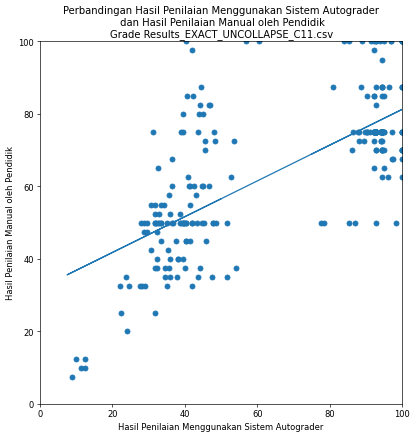

Linear Regression Plot of Grade Results_DAMERAU_LD_UNCOLLAPSE_C11.csv exam:
Info for plot=Grade Results_DAMERAU_LD_UNCOLLAPSE_C11.csv: m=0.49370250202693516, b=31.883122099830704


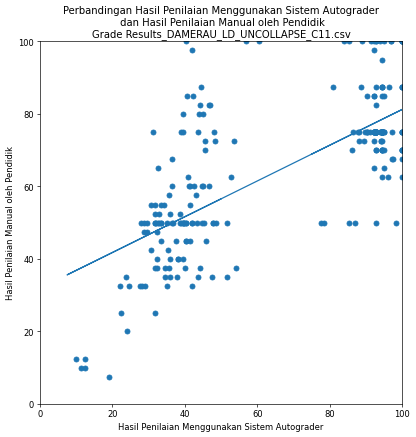

Linear Regression Plot of Grade Results_COUNTER_UNCOLLAPSE_C11.csv exam:
Info for plot=Grade Results_COUNTER_UNCOLLAPSE_C11.csv: m=0.49370250202693516, b=31.883122099830704


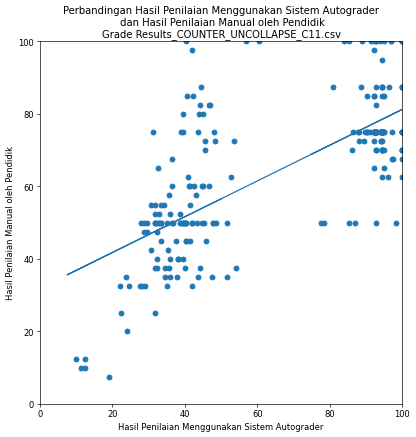

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C11.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C11.csv: m=0.49370250202693516, b=31.883122099830704


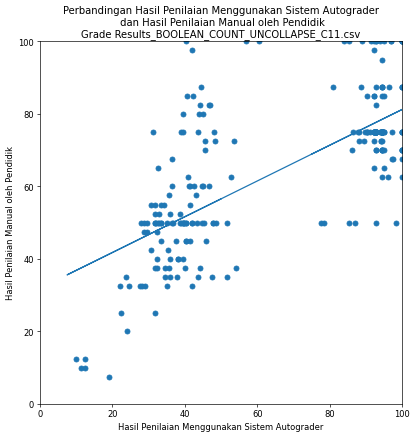

Linear Regression Plot of Grade Results_NONE_UNCOLLAPSE_C11.csv exam:
Info for plot=Grade Results_NONE_UNCOLLAPSE_C11.csv: m=0.4797739241913595, b=32.04010579179674


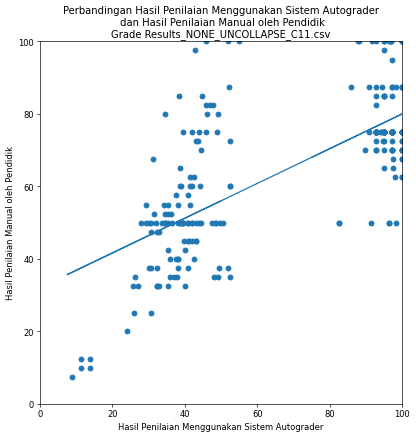

Linear Regression Plot of Grade Results_COUNTER_COLLAPSE_NBE_C21_APR.csv exam:
Info for plot=Grade Results_COUNTER_COLLAPSE_NBE_C21_APR.csv: m=0.8446482967495156, b=13.891994500167712


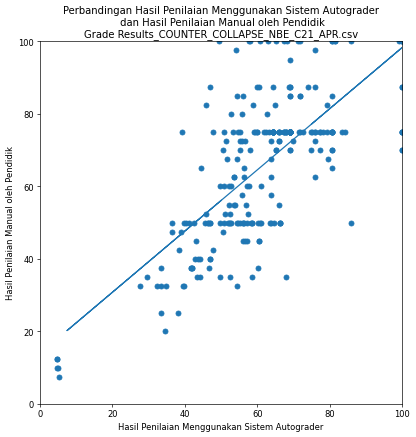

Linear Regression Plot of Grade Results_COUNTER_UNCOLLAPSE_C12.csv exam:
Info for plot=Grade Results_COUNTER_UNCOLLAPSE_C12.csv: m=0.4057997966021683, b=39.262141151127466


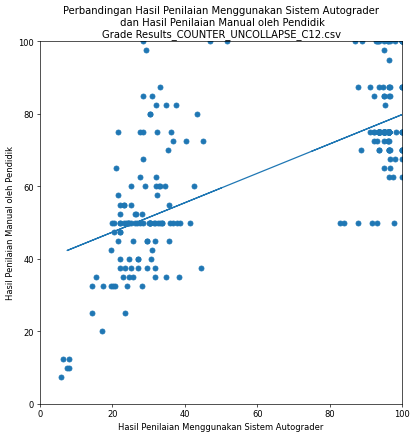

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C21_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C21_APR.csv: m=0.8531179636528962, b=13.786282014286503


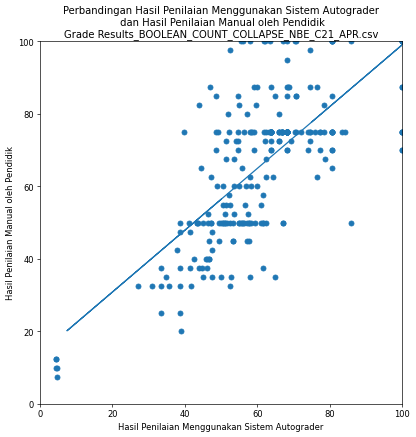

Linear Regression Plot of Grade Results_NONE_UNCOLLAPSE_C23.csv exam:
Info for plot=Grade Results_NONE_UNCOLLAPSE_C23.csv: m=0.4247963046062867, b=36.906684754220166


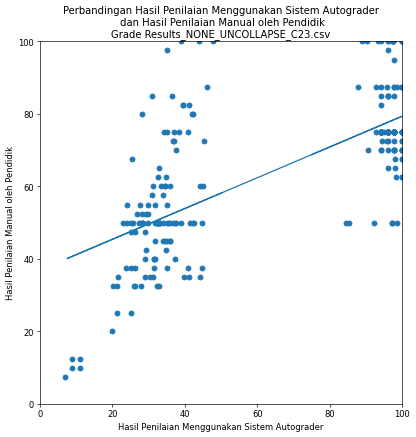

Linear Regression Plot of Grade Results_COUNTER_COLLAPSE_NBE_C31_APR.csv exam:
Info for plot=Grade Results_COUNTER_COLLAPSE_NBE_C31_APR.csv: m=0.8819433515770755, b=8.424094279890385


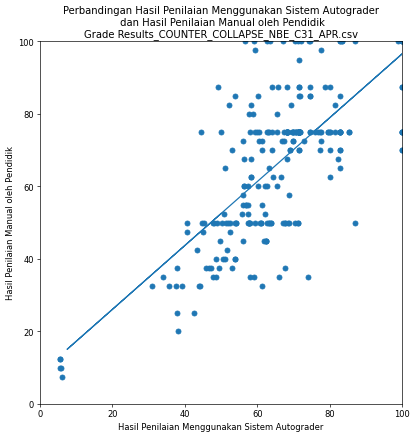

Linear Regression Plot of Grade Results_EXACT_UNCOLLAPSE_C12.csv exam:
Info for plot=Grade Results_EXACT_UNCOLLAPSE_C12.csv: m=0.40485300442130356, b=39.29742680685589


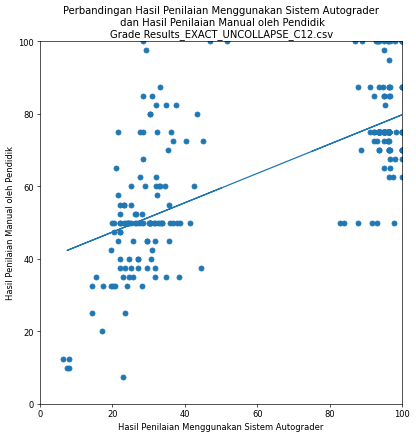

Linear Regression Plot of Grade Results_DAMERAU_LD_UNCOLLAPSE_C12.csv exam:
Info for plot=Grade Results_DAMERAU_LD_UNCOLLAPSE_C12.csv: m=0.40485300442130356, b=39.29742680685589


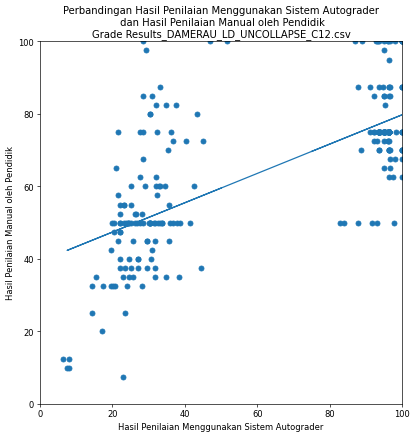

Linear Regression Plot of Grade Results_DAMERAU_LD_COLLAPSE_NBE_C21_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_COLLAPSE_NBE_C21_APR.csv: m=0.8352745754767108, b=15.421051127002654


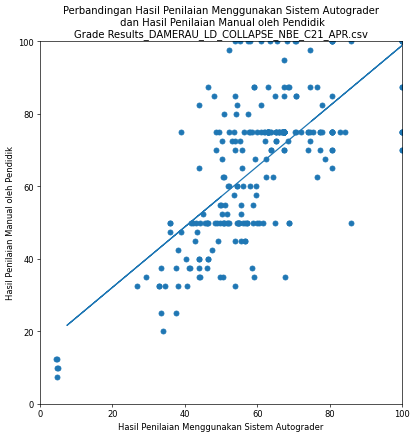

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C31_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C31_APR.csv: m=0.8910491696793744, b=8.074725427784571


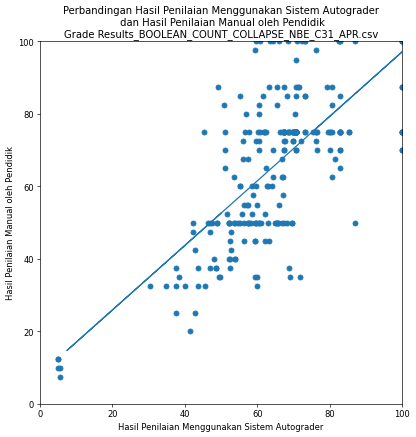

Linear Regression Plot of Grade Results_DAMERAU_LD_COLLAPSE_NBE_C31_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_COLLAPSE_NBE_C31_APR.csv: m=0.8798234908993388, b=9.366914733892933


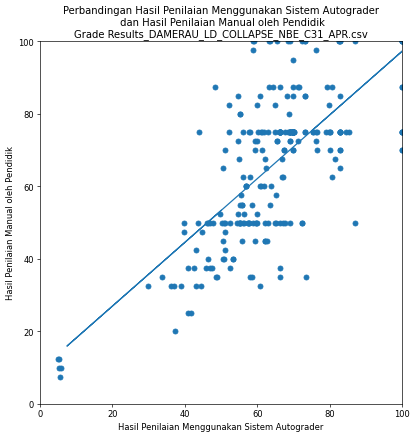

Linear Regression Plot of Grade Results_NONE_UNCOLLAPSE_C12.csv exam:
Info for plot=Grade Results_NONE_UNCOLLAPSE_C12.csv: m=0.3932077502415272, b=39.62532412797824


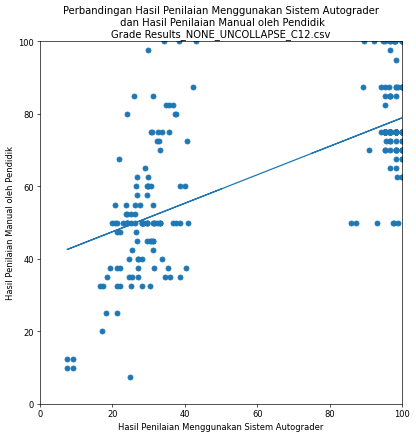

Linear Regression Plot of Grade Results_NONE_UNCOLLAPSE_C31_APR.csv exam:
Info for plot=Grade Results_NONE_UNCOLLAPSE_C31_APR.csv: m=0.9275958712207429, b=3.7186251835538187


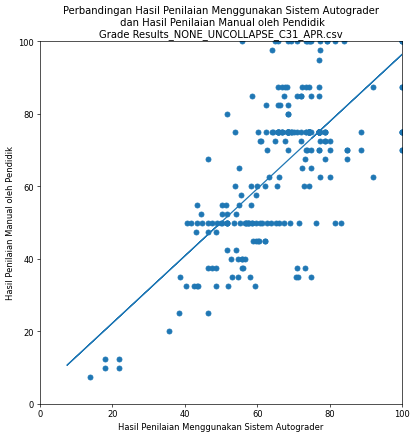

Linear Regression Plot of Grade Results_COUNTER_UNCOLLAPSE_C13.csv exam:
Info for plot=Grade Results_COUNTER_UNCOLLAPSE_C13.csv: m=0.37026839270799516, b=42.09837932882586


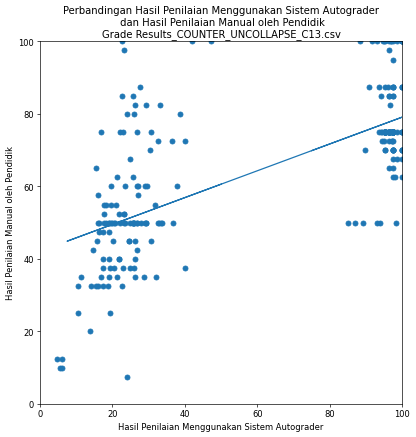

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C13.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C13.csv: m=0.37026839270799516, b=42.09837932882586


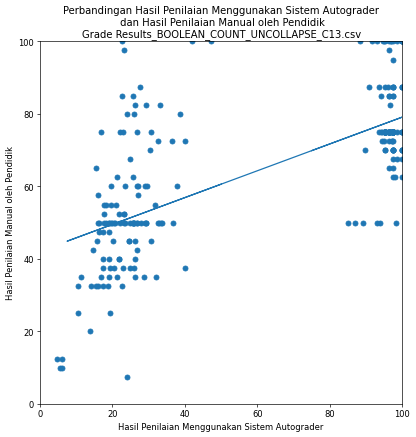

Linear Regression Plot of Grade Results_EXACT_UNCOLLAPSE_C31_APR.csv exam:
Info for plot=Grade Results_EXACT_UNCOLLAPSE_C31_APR.csv: m=0.8781938708281001, b=7.991579386371111


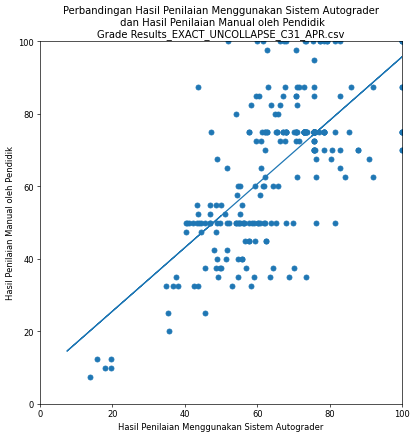

Linear Regression Plot of Grade Results_DAMERAU_LD_UNCOLLAPSE_C31_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_UNCOLLAPSE_C31_APR.csv: m=0.8781938708281001, b=7.991579386371111


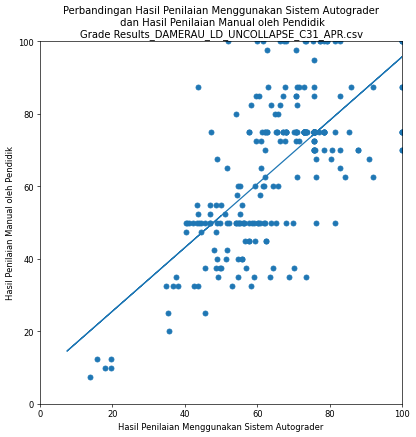

Linear Regression Plot of Grade Results_COUNTER_UNCOLLAPSE_C31_APR.csv exam:
Info for plot=Grade Results_COUNTER_UNCOLLAPSE_C31_APR.csv: m=0.8781938708281001, b=7.991579386371111


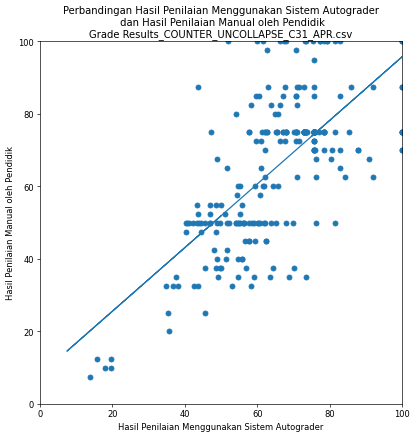

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C31_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C31_APR.csv: m=0.8781938708281001, b=7.991579386371111


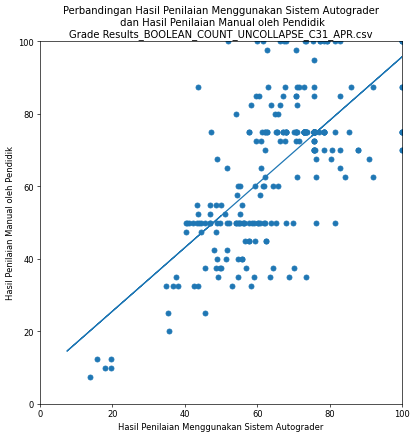

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C12.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C12.csv: m=0.3994985865662495, b=39.72334409538246


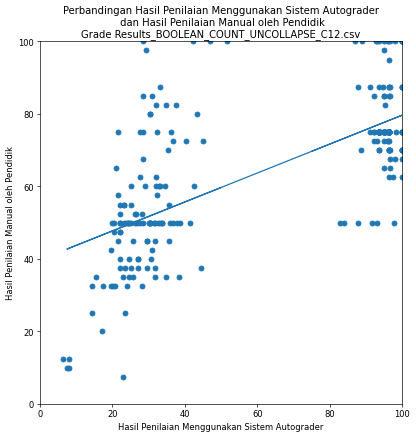

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C32_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C32_APR.csv: m=0.8014623465861394, b=19.31285842585456


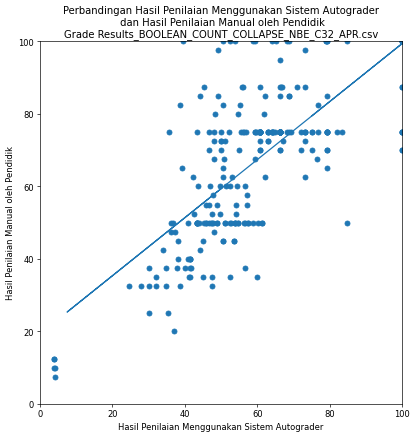

Linear Regression Plot of Grade Results_COUNTER_COLLAPSE_NBE_C32_APR.csv exam:
Info for plot=Grade Results_COUNTER_COLLAPSE_NBE_C32_APR.csv: m=0.794664834339718, b=19.342264282200414


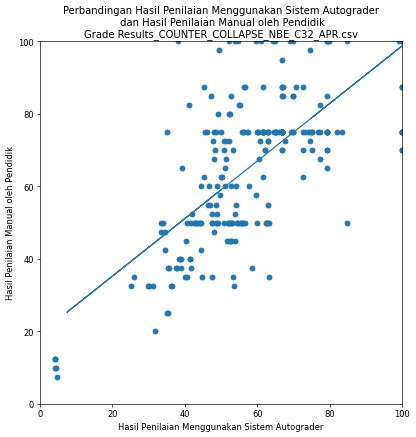

Linear Regression Plot of Grade Results_NONE_UNCOLLAPSE_C13.csv exam:
Info for plot=Grade Results_NONE_UNCOLLAPSE_C13.csv: m=0.3619307952214184, b=42.40235519835169


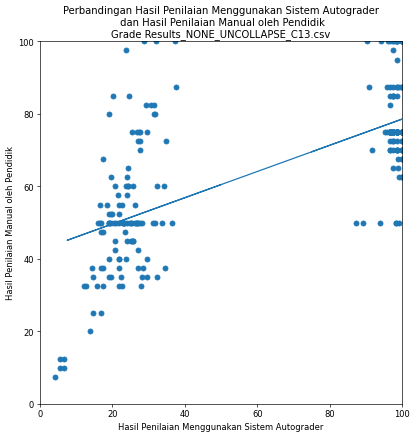

Linear Regression Plot of Grade Results_DAMERAU_LD_COLLAPSE_NBE_C32_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_COLLAPSE_NBE_C32_APR.csv: m=0.7872601434227388, b=20.582104971590706


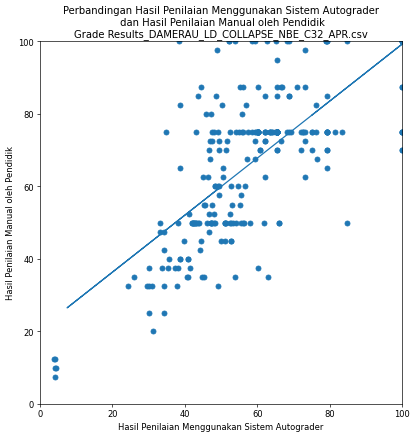

Linear Regression Plot of Grade Results_DAMERAU_LD_UNCOLLAPSE_C13.csv exam:
Info for plot=Grade Results_DAMERAU_LD_UNCOLLAPSE_C13.csv: m=0.36631384824165547, b=42.45692586552995


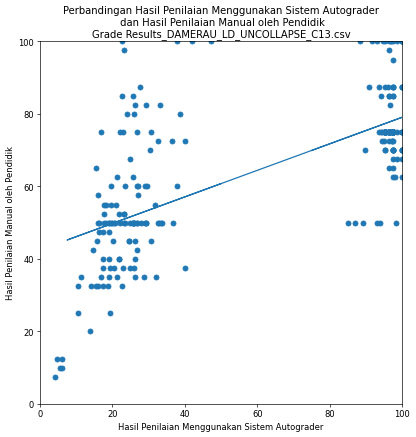

Linear Regression Plot of Grade Results_NONE_UNCOLLAPSE_C11_APR.csv exam:
Info for plot=Grade Results_NONE_UNCOLLAPSE_C11_APR.csv: m=0.6749781912867387, b=16.667611931523826


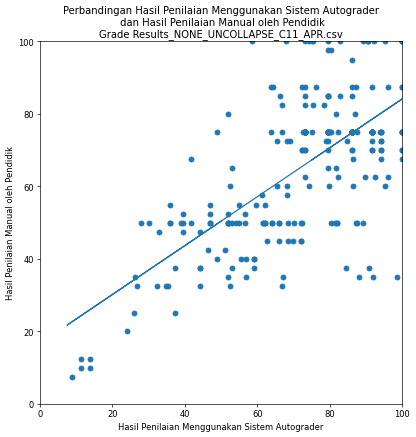

Linear Regression Plot of Grade Results_EXACT_UNCOLLAPSE_C21_APR.csv exam:
Info for plot=Grade Results_EXACT_UNCOLLAPSE_C21_APR.csv: m=0.8277780413353798, b=15.035043748192987


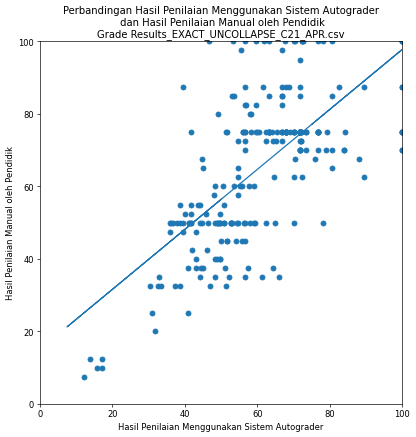

Linear Regression Plot of Grade Results_DAMERAU_LD_UNCOLLAPSE_C21_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_UNCOLLAPSE_C21_APR.csv: m=0.8277780413353798, b=15.035043748192987


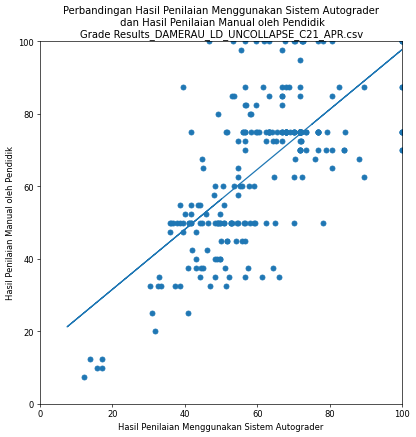

Linear Regression Plot of Grade Results_COUNTER_UNCOLLAPSE_C21_APR.csv exam:
Info for plot=Grade Results_COUNTER_UNCOLLAPSE_C21_APR.csv: m=0.8277780413353798, b=15.035043748192987


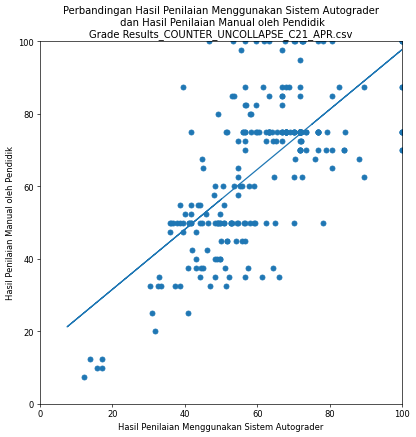

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C21_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C21_APR.csv: m=0.8277780413353798, b=15.035043748192987


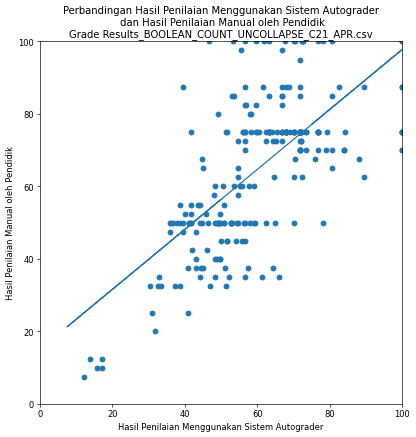

Linear Regression Plot of Grade Results_NONE_UNCOLLAPSE_C12_APR.csv exam:
Info for plot=Grade Results_NONE_UNCOLLAPSE_C12_APR.csv: m=0.6197564074287268, b=22.72499034393063


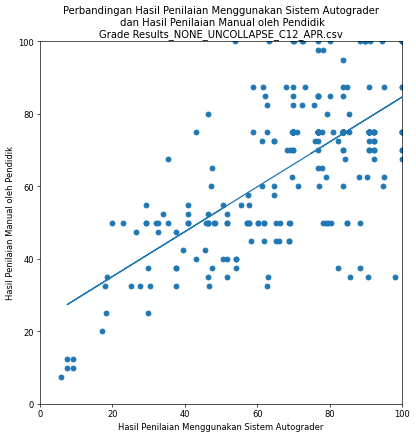

Linear Regression Plot of Grade Results_EXACT_COLLAPSE_NBE_C21_APR.csv exam:
Info for plot=Grade Results_EXACT_COLLAPSE_NBE_C21_APR.csv: m=0.7877393580230811, b=20.417142095492387


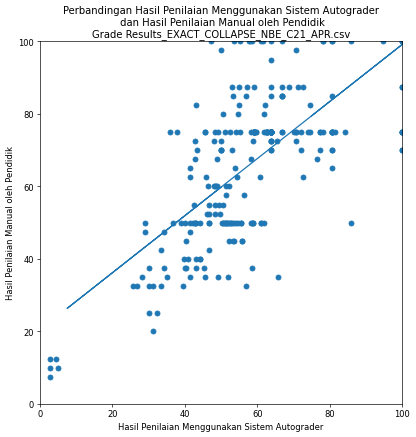

Linear Regression Plot of Grade Results_EXACT_UNCOLLAPSE_C12_APR.csv exam:
Info for plot=Grade Results_EXACT_UNCOLLAPSE_C12_APR.csv: m=0.6274693745184883, b=23.191703061057073


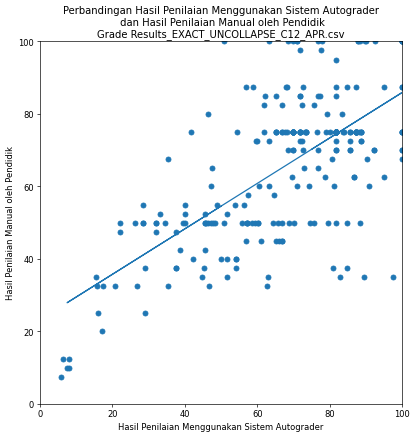

Linear Regression Plot of Grade Results_DAMERAU_LD_UNCOLLAPSE_C12_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_UNCOLLAPSE_C12_APR.csv: m=0.6274693745184883, b=23.191703061057073


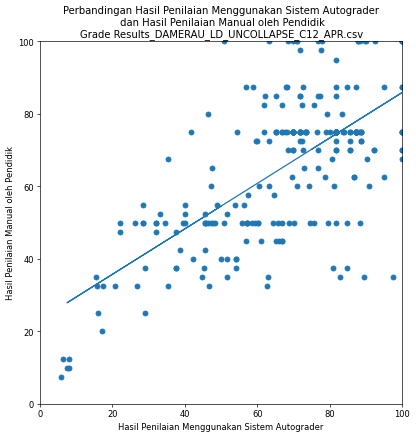

Linear Regression Plot of Grade Results_COUNTER_UNCOLLAPSE_C12_APR.csv exam:
Info for plot=Grade Results_COUNTER_UNCOLLAPSE_C12_APR.csv: m=0.6274693745184883, b=23.191703061057073


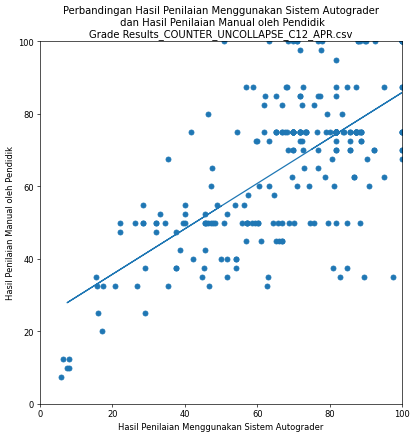

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C12_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C12_APR.csv: m=0.6274693745184883, b=23.191703061057073


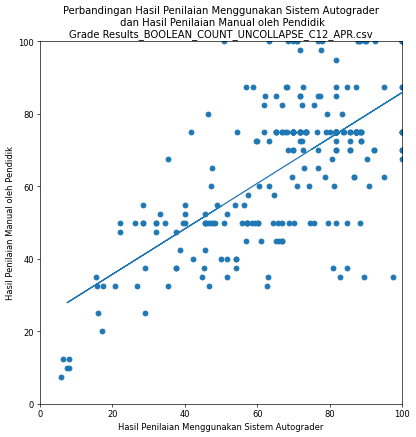

Linear Regression Plot of Grade Results_EXACT_UNCOLLAPSE_C11_APR.csv exam:
Info for plot=Grade Results_EXACT_UNCOLLAPSE_C11_APR.csv: m=0.6870294028804301, b=17.462600240633442


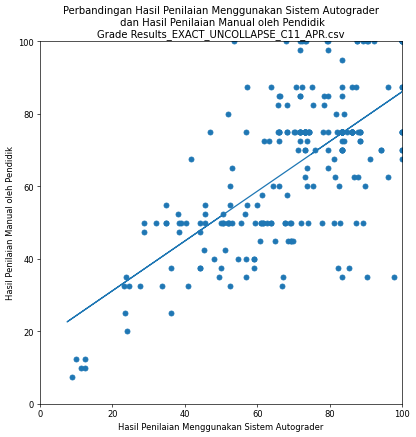

Linear Regression Plot of Grade Results_DAMERAU_LD_UNCOLLAPSE_C11_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_UNCOLLAPSE_C11_APR.csv: m=0.6870294028804301, b=17.462600240633442


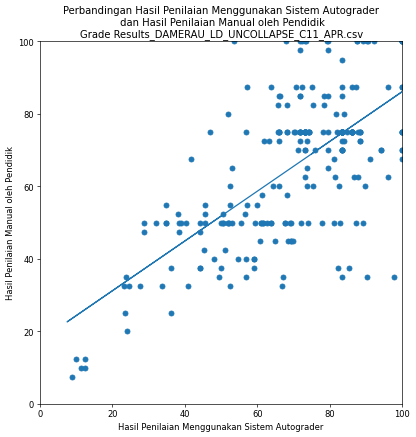

Linear Regression Plot of Grade Results_COUNTER_UNCOLLAPSE_C11_APR.csv exam:
Info for plot=Grade Results_COUNTER_UNCOLLAPSE_C11_APR.csv: m=0.6870294028804301, b=17.462600240633442


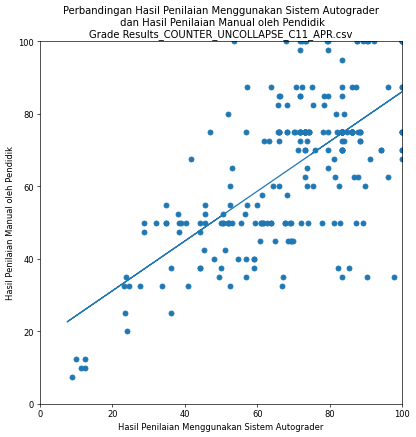

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C11_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C11_APR.csv: m=0.6870294028804301, b=17.462600240633442


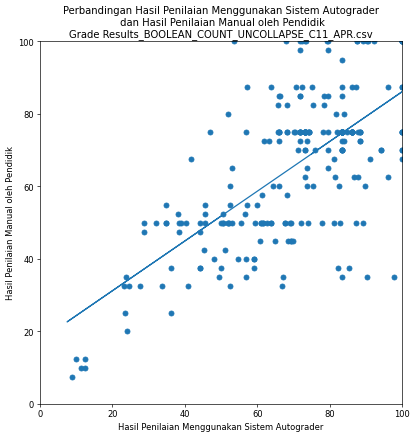

Linear Regression Plot of Grade Results_NONE_UNCOLLAPSE_C21_APR.csv exam:
Info for plot=Grade Results_NONE_UNCOLLAPSE_C21_APR.csv: m=0.8831058351191082, b=11.404151225925744


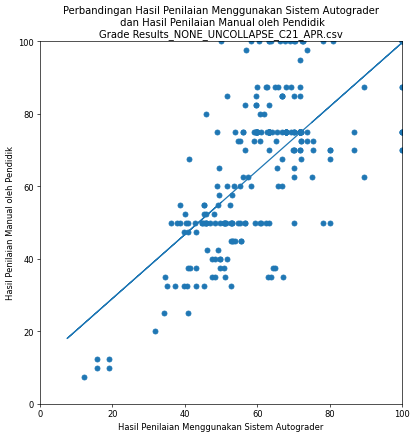

Linear Regression Plot of Grade Results_NONE_UNCOLLAPSE_C13_APR.csv exam:
Info for plot=Grade Results_NONE_UNCOLLAPSE_C13_APR.csv: m=0.595914327663728, b=25.32140521692614


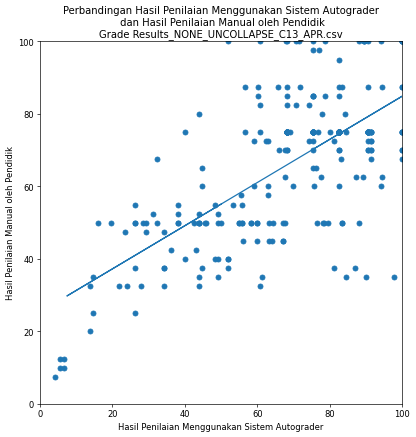

Linear Regression Plot of Grade Results_COUNTER_COLLAPSE_C31_APR.csv exam:
Info for plot=Grade Results_COUNTER_COLLAPSE_C31_APR.csv: m=0.8760340700797271, b=9.366098105105172


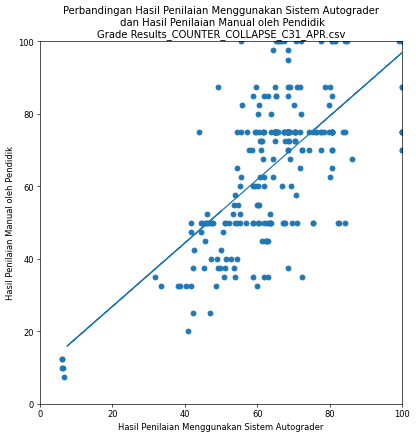

Linear Regression Plot of Grade Results_EXACT_COLLAPSE_NBE_C31_APR.csv exam:
Info for plot=Grade Results_EXACT_COLLAPSE_NBE_C31_APR.csv: m=0.8168945831278767, b=16.054450237552118


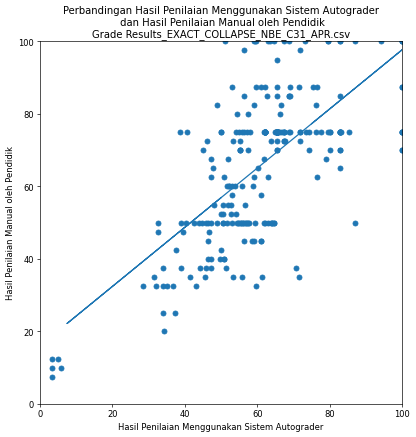

Linear Regression Plot of Grade Results_COUNTER_COLLAPSE_C21_APR.csv exam:
Info for plot=Grade Results_COUNTER_COLLAPSE_C21_APR.csv: m=0.8274348324951772, b=15.589482295680332


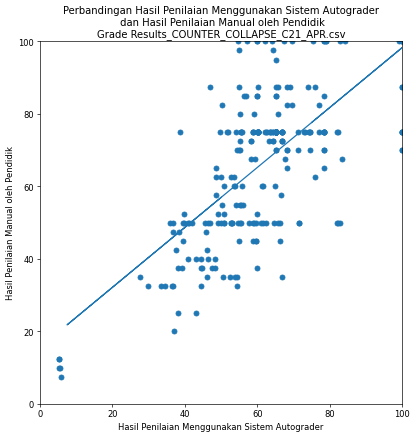

Linear Regression Plot of Grade Results_EXACT_COLLAPSE_NBE_C32_APR.csv exam:
Info for plot=Grade Results_EXACT_COLLAPSE_NBE_C32_APR.csv: m=0.7479507318905989, b=24.61052366093451


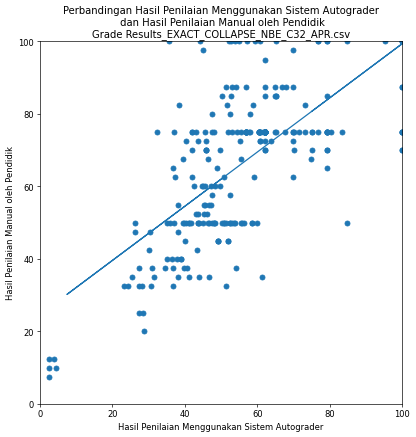

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C23_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C23_APR.csv: m=0.6858471964011184, b=31.64430975364645


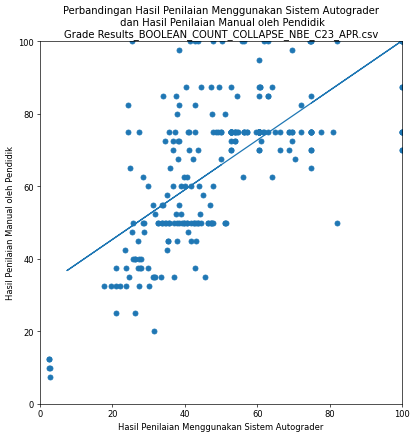

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C11.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C11.csv: m=0.5147976831213484, b=28.73816523622335


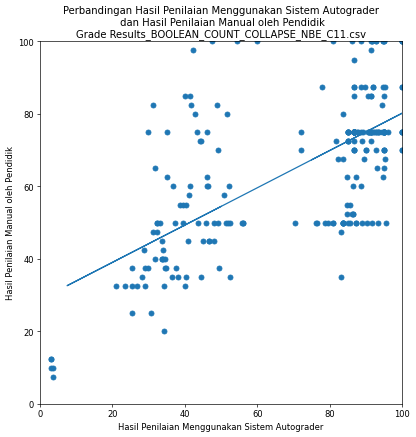

Linear Regression Plot of Grade Results_COUNTER_COLLAPSE_NBE_C11_APR.csv exam:
Info for plot=Grade Results_COUNTER_COLLAPSE_NBE_C11_APR.csv: m=0.7091258821709414, b=16.89076288969013


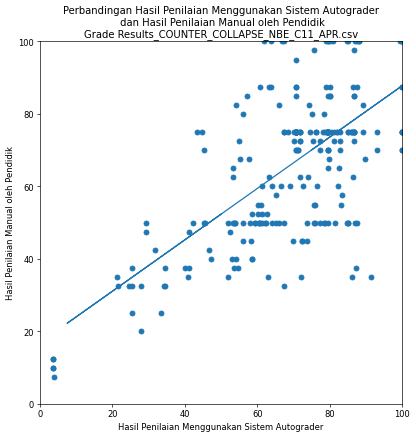

Linear Regression Plot of Grade Results_DAMERAU_LD_COLLAPSE_NBE_C11_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_COLLAPSE_NBE_C11_APR.csv: m=0.7103666397006182, b=17.24599319308898


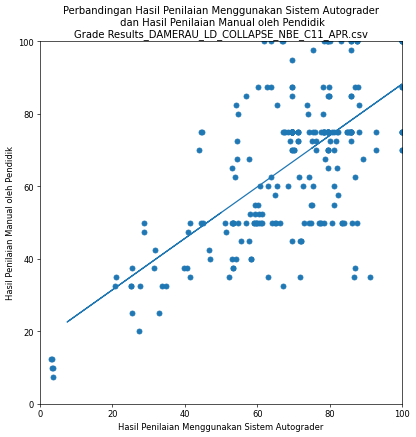

Linear Regression Plot of Grade Results_NONE_PROPAGATE_BRANCHING_C11_APR.csv exam:
Info for plot=Grade Results_NONE_PROPAGATE_BRANCHING_C11_APR.csv: m=0.7451213834583057, b=12.167889070860783


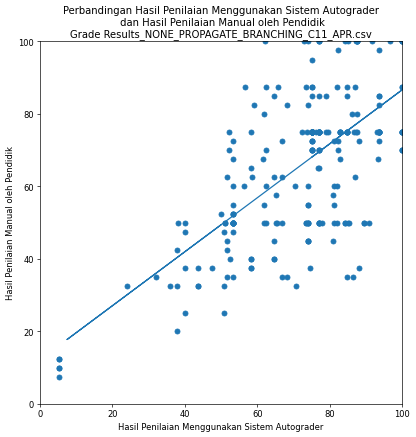

Linear Regression Plot of Grade Results_COUNTER_COLLAPSE_C11_APR.csv exam:
Info for plot=Grade Results_COUNTER_COLLAPSE_C11_APR.csv: m=0.7228007349325295, b=16.55583281933859


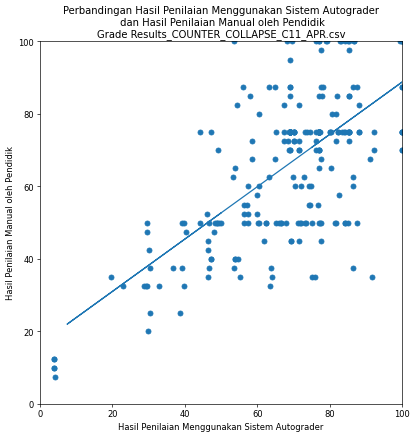

Linear Regression Plot of Grade Results_DAMERAU_LD_COLLAPSE_C11_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_COLLAPSE_C11_APR.csv: m=0.7256870522659616, b=16.84521342850123


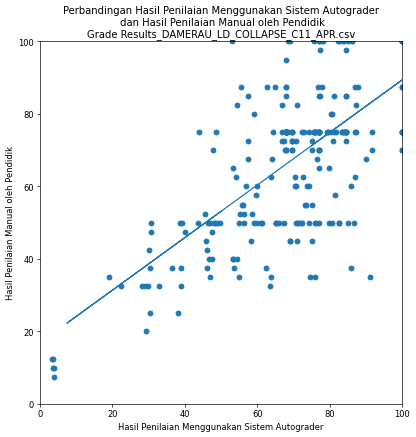

Linear Regression Plot of Grade Results_NONE_COLLAPSE_C31_APR.csv exam:
Info for plot=Grade Results_NONE_COLLAPSE_C31_APR.csv: m=0.8581231295370846, b=6.080385643094096


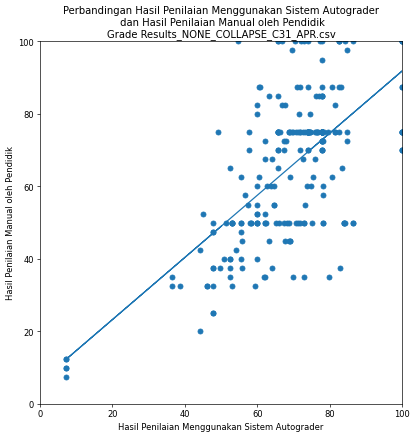

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C11_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C11_APR.csv: m=0.715744271470658, b=16.558053131266117


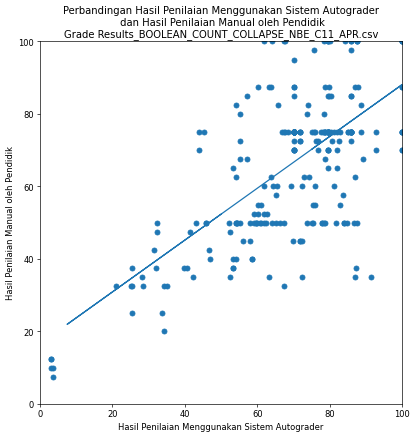

Linear Regression Plot of Grade Results_DAMERAU_LD_COLLAPSE_C31_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_COLLAPSE_C31_APR.csv: m=0.857502094226225, b=11.49180972708877


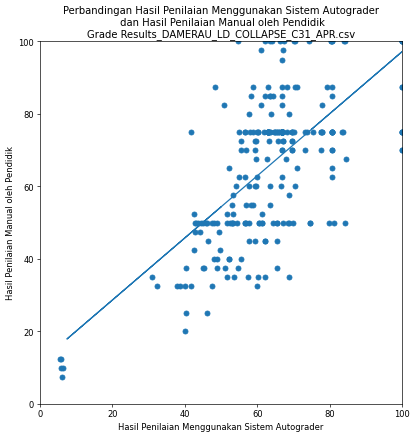

Linear Regression Plot of Grade Results_NONE_COLLAPSE_C11_APR.csv exam:
Info for plot=Grade Results_NONE_COLLAPSE_C11_APR.csv: m=0.7058092995385208, b=14.851200746625711


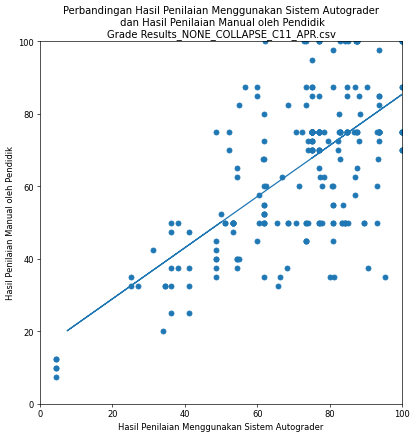

Linear Regression Plot of Grade Results_NONE_UNCOLLAPSE_C32_APR.csv exam:
Info for plot=Grade Results_NONE_UNCOLLAPSE_C32_APR.csv: m=0.8389735098342377, b=17.609159485028602


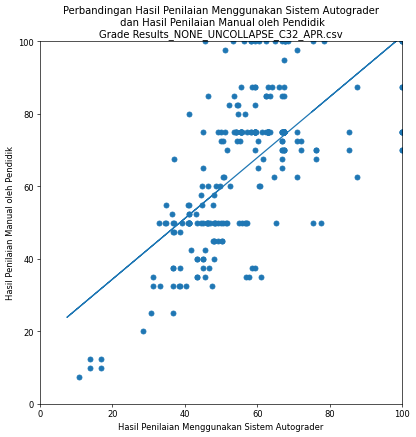

Linear Regression Plot of Grade Results_COUNTER_PROPAGATE_BRANCHING_C11_APR.csv exam:
Info for plot=Grade Results_COUNTER_PROPAGATE_BRANCHING_C11_APR.csv: m=0.7561059278952144, b=14.43790473215875


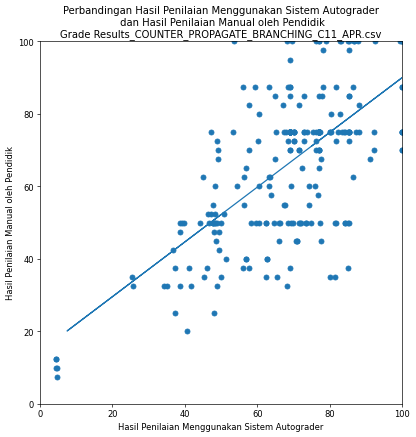

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_C31_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_COLLAPSE_C31_APR.csv: m=0.8636829745878123, b=10.796379572518687


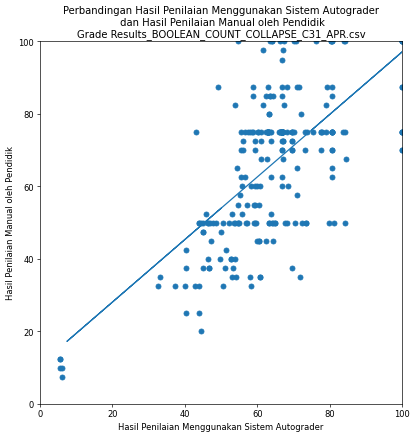

Linear Regression Plot of Grade Results_DAMERAU_LD_PROPAGATE_BRANCHING_C11_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_PROPAGATE_BRANCHING_C11_APR.csv: m=0.7562922889322068, b=14.950758390783028


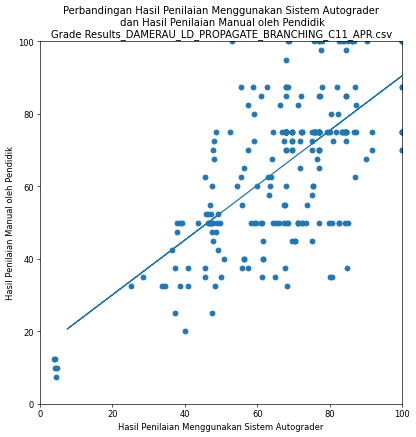

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_C11_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_COLLAPSE_C11_APR.csv: m=0.7274816135158974, b=16.513956903801823


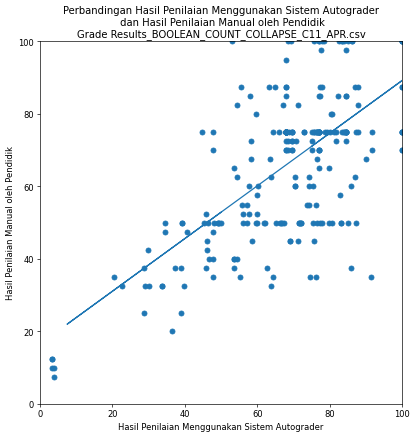

Linear Regression Plot of Grade Results_EXACT_COLLAPSE_NBE_C11_APR.csv exam:
Info for plot=Grade Results_EXACT_COLLAPSE_NBE_C11_APR.csv: m=0.6967057883197614, b=19.654783973870828


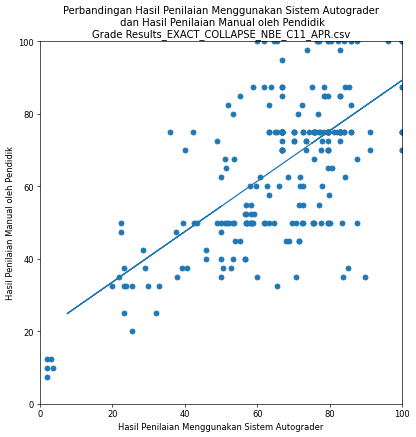

Linear Regression Plot of Grade Results_EXACT_UNCOLLAPSE_C32_APR.csv exam:
Info for plot=Grade Results_EXACT_UNCOLLAPSE_C32_APR.csv: m=0.7684916280371547, b=21.66053048663434


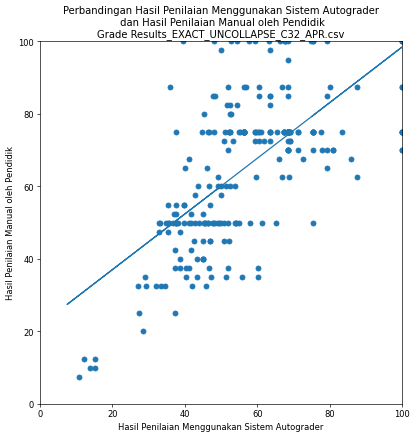

Linear Regression Plot of Grade Results_DAMERAU_LD_UNCOLLAPSE_C32_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_UNCOLLAPSE_C32_APR.csv: m=0.7684916280371547, b=21.66053048663434


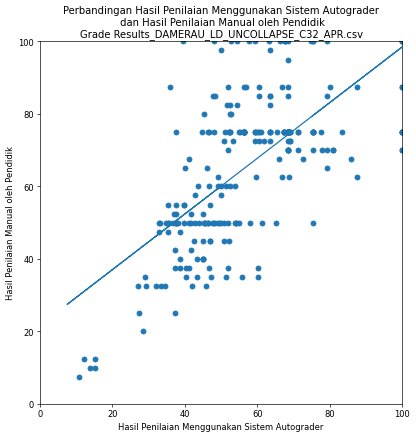

Linear Regression Plot of Grade Results_COUNTER_UNCOLLAPSE_C32_APR.csv exam:
Info for plot=Grade Results_COUNTER_UNCOLLAPSE_C32_APR.csv: m=0.7684916280371547, b=21.66053048663434


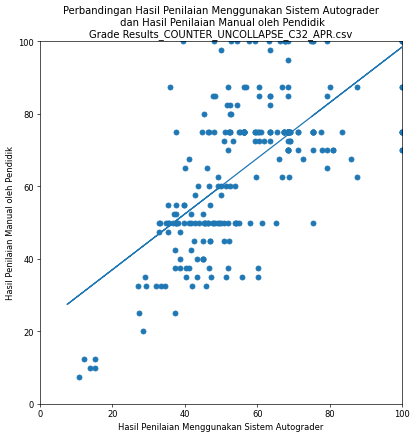

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C32_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C32_APR.csv: m=0.7684916280371547, b=21.66053048663434


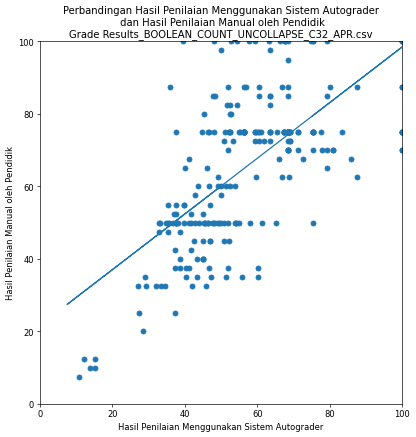

Linear Regression Plot of Grade Results_COUNTER_COLLAPSE_NBE_C23_APR.csv exam:
Info for plot=Grade Results_COUNTER_COLLAPSE_NBE_C23_APR.csv: m=0.6724192137306063, b=32.067267593665065


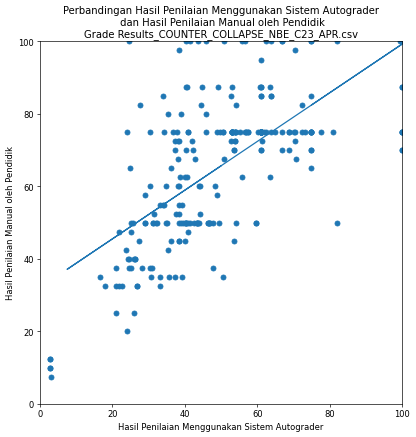

Linear Regression Plot of Grade Results_DAMERAU_LD_COLLAPSE_NBE_C12_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_COLLAPSE_NBE_C12_APR.csv: m=0.648510241855023, b=22.890021856366594


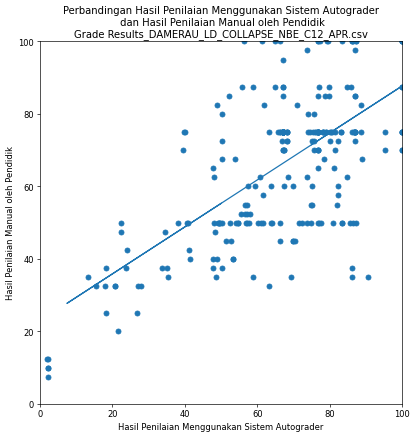

Linear Regression Plot of Grade Results_COUNTER_COLLAPSE_NBE_C12_APR.csv exam:
Info for plot=Grade Results_COUNTER_COLLAPSE_NBE_C12_APR.csv: m=0.6435503062436942, b=22.99534776007069


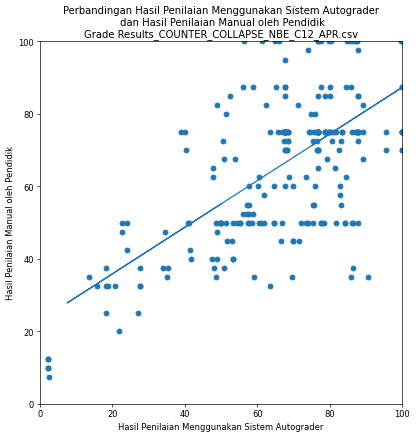

Linear Regression Plot of Grade Results_EXACT_COLLAPSE_C11_APR.csv exam:
Info for plot=Grade Results_EXACT_COLLAPSE_C11_APR.csv: m=0.7099413151347096, b=19.79654720094728


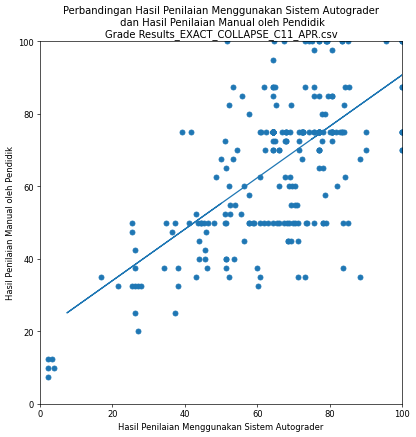

Linear Regression Plot of Grade Results_NONE_PROPAGATE_BRANCHING_C12_APR.csv exam:
Info for plot=Grade Results_NONE_PROPAGATE_BRANCHING_C12_APR.csv: m=0.6870548018710224, b=19.08462728886848


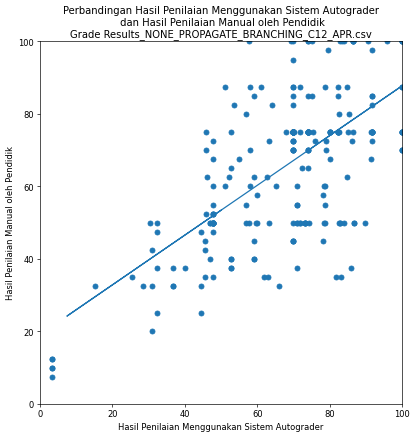

Linear Regression Plot of Grade Results_EXACT_COLLAPSE_NBE_C23_APR.csv exam:
Info for plot=Grade Results_EXACT_COLLAPSE_NBE_C23_APR.csv: m=0.6528621078254602, b=34.52703512572808


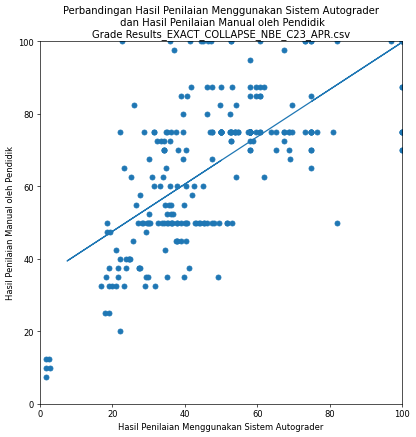

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C12_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C12_APR.csv: m=0.6498657174206233, b=22.62422832353871


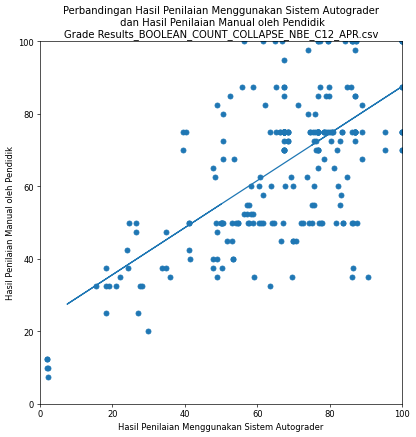

Linear Regression Plot of Grade Results_COUNTER_COLLAPSE_NBE_C13_APR.csv exam:
Info for plot=Grade Results_COUNTER_COLLAPSE_NBE_C13_APR.csv: m=0.6136153260517233, b=38.29865623919722


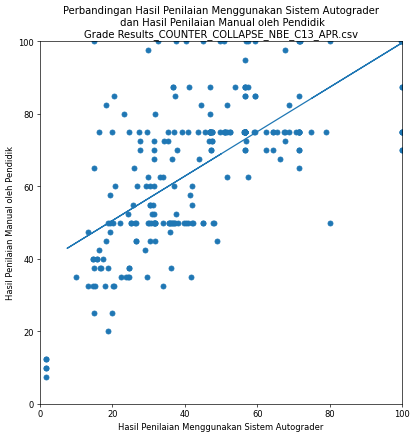

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C11_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C11_APR.csv: m=0.7551023093340559, b=14.802308141400037


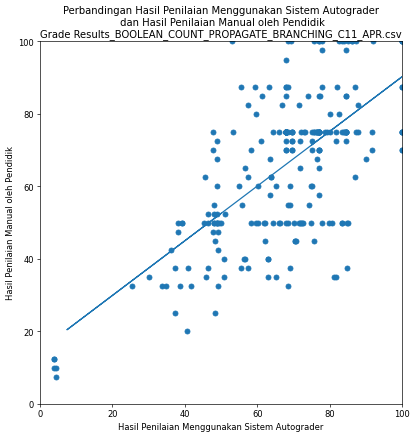

Linear Regression Plot of Grade Results_DAMERAU_LD_COLLAPSE_C12_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_COLLAPSE_C12_APR.csv: m=0.6609214804290633, b=22.67686714665612


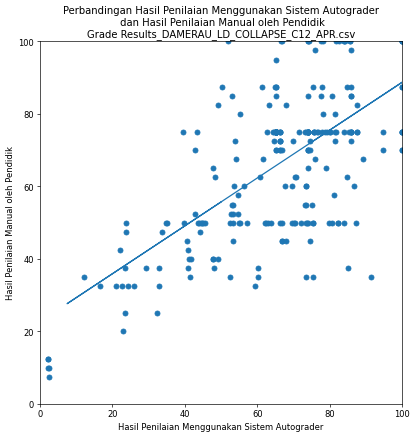

Linear Regression Plot of Grade Results_COUNTER_COLLAPSE_C12_APR.csv exam:
Info for plot=Grade Results_COUNTER_COLLAPSE_C12_APR.csv: m=0.6564104468265856, b=22.709601138780734


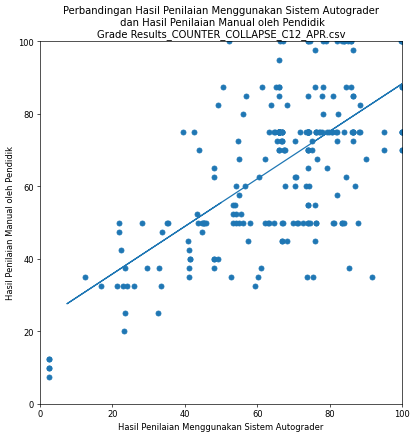

Linear Regression Plot of Grade Results_COUNTER_PROPAGATE_BRANCHING_C12_APR.csv exam:
Info for plot=Grade Results_COUNTER_PROPAGATE_BRANCHING_C12_APR.csv: m=0.693720278385853, b=20.419211058885146


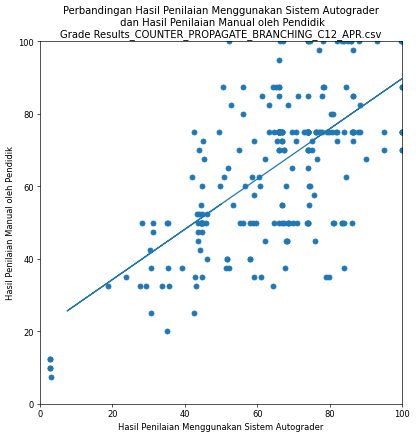

Linear Regression Plot of Grade Results_EXACT_COLLAPSE_NBE_C12_APR.csv exam:
Info for plot=Grade Results_EXACT_COLLAPSE_NBE_C12_APR.csv: m=0.6395809694874895, b=24.37326285699693


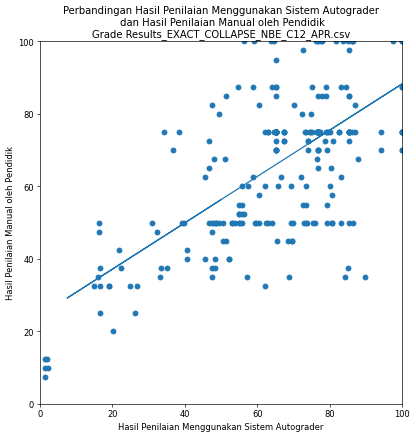

Linear Regression Plot of Grade Results_DAMERAU_LD_PROPAGATE_BRANCHING_C12_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_PROPAGATE_BRANCHING_C12_APR.csv: m=0.696303749527474, b=20.54679410443641


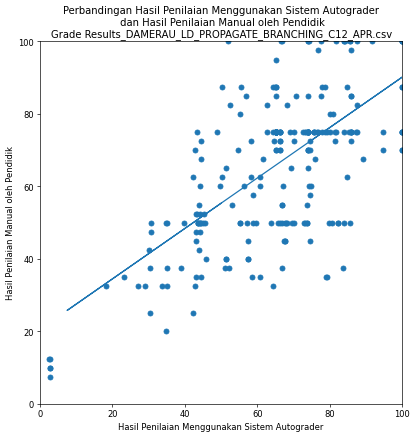

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_C21_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_COLLAPSE_C21_APR.csv: m=0.8178233550153946, b=16.741289698087606


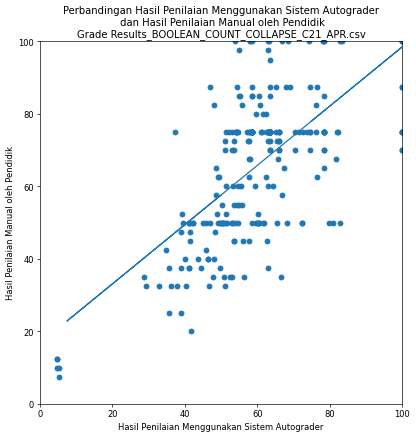

Linear Regression Plot of Grade Results_NONE_COLLAPSE_NBE_C11_APR.csv exam:
Info for plot=Grade Results_NONE_COLLAPSE_NBE_C11_APR.csv: m=0.6820757968173732, b=16.599260240704


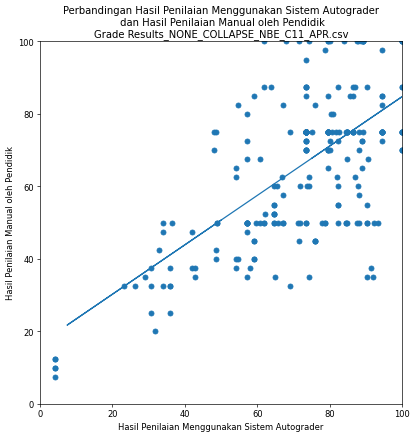

Linear Regression Plot of Grade Results_DAMERAU_LD_COLLAPSE_C21_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_COLLAPSE_C21_APR.csv: m=0.8083911022062645, b=17.585038493020487


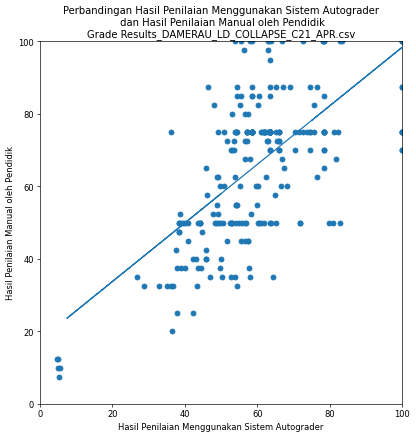

Linear Regression Plot of Grade Results_DAMERAU_LD_COLLAPSE_NBE_C23_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_COLLAPSE_NBE_C23_APR.csv: m=0.6620538576173653, b=33.07298898088406


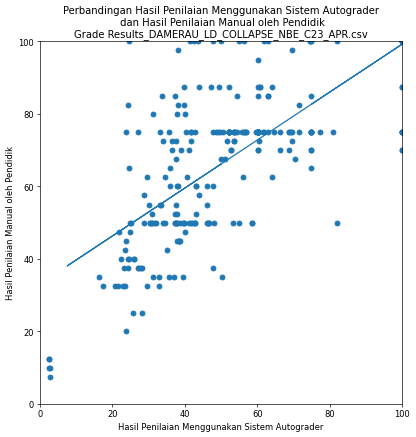

Linear Regression Plot of Grade Results_NONE_COLLAPSE_C12_APR.csv exam:
Info for plot=Grade Results_NONE_COLLAPSE_C12_APR.csv: m=0.6511650125934043, b=21.321288806777858


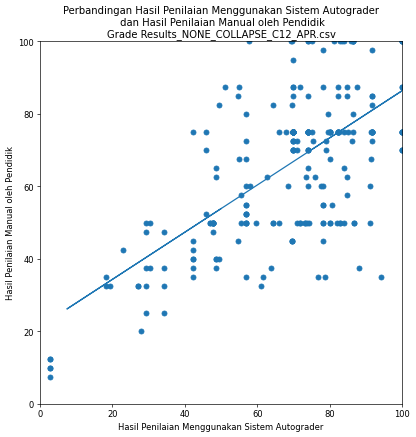

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_C12_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_COLLAPSE_C12_APR.csv: m=0.6607108681864862, b=22.57566180534299


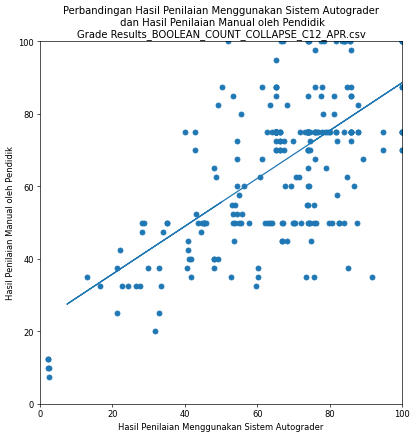

Linear Regression Plot of Grade Results_EXACT_COLLAPSE_C12_APR.csv exam:
Info for plot=Grade Results_EXACT_COLLAPSE_C12_APR.csv: m=0.6517913800077357, b=24.405105363092662


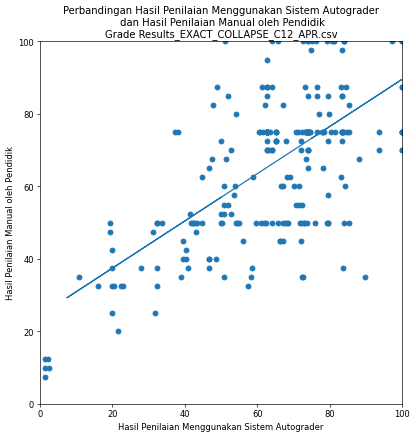

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C12_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C12_APR.csv: m=0.6920625489240662, b=20.720926271276337


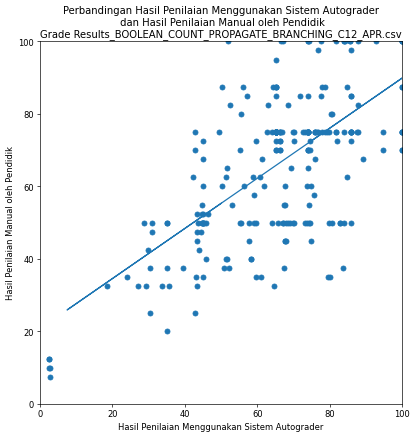

Linear Regression Plot of Grade Results_EXACT_PROPAGATE_BRANCHING_C11_APR.csv exam:
Info for plot=Grade Results_EXACT_PROPAGATE_BRANCHING_C11_APR.csv: m=0.7394214796543465, b=17.933183876040296


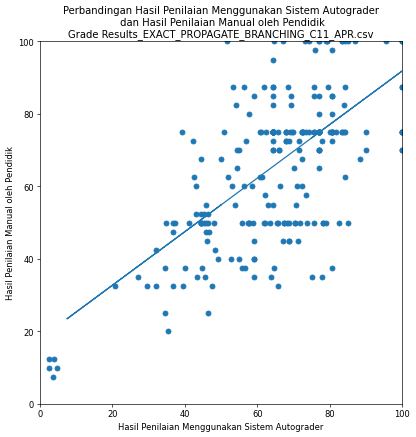

Linear Regression Plot of Grade Results_NONE_COLLAPSE_NBE_C12_APR.csv exam:
Info for plot=Grade Results_NONE_COLLAPSE_NBE_C12_APR.csv: m=0.6340116688731026, b=22.283955377861833


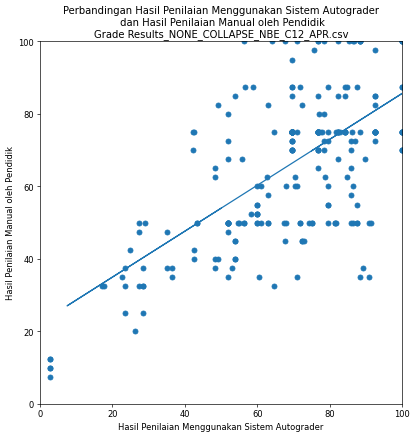

Linear Regression Plot of Grade Results_DAMERAU_LD_COLLAPSE_NBE_C11.csv exam:
Info for plot=Grade Results_DAMERAU_LD_COLLAPSE_NBE_C11.csv: m=0.49958671167555874, b=29.501259801846746


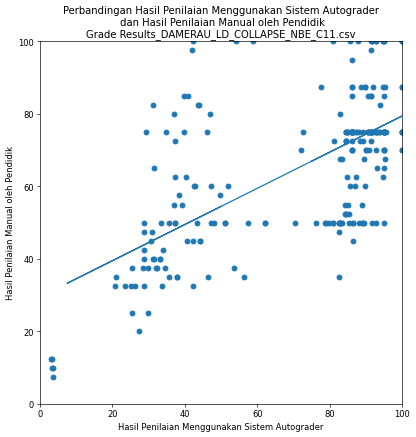

Linear Regression Plot of Grade Results_EXACT_PROPAGATE_BRANCHING_C12_APR.csv exam:
Info for plot=Grade Results_EXACT_PROPAGATE_BRANCHING_C12_APR.csv: m=0.6880328162078854, b=22.20699539609985


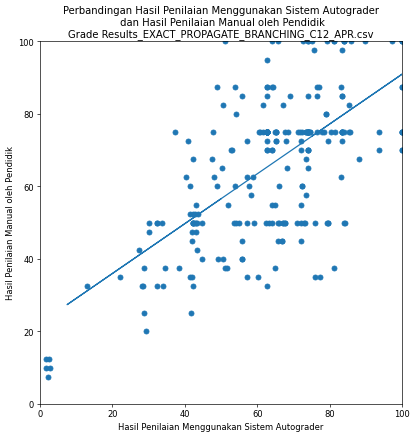

Linear Regression Plot of Grade Results_COUNTER_COLLAPSE_C32_APR.csv exam:
Info for plot=Grade Results_COUNTER_COLLAPSE_C32_APR.csv: m=0.7676246669281042, b=21.576016269243866


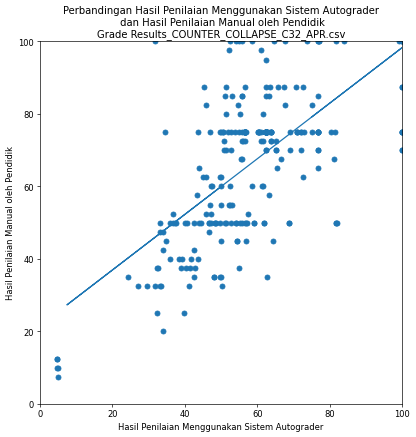

Linear Regression Plot of Grade Results_NONE_COLLAPSE_C13_APR.csv exam:
Info for plot=Grade Results_NONE_COLLAPSE_C13_APR.csv: m=0.6259150387532374, b=24.192378994918585


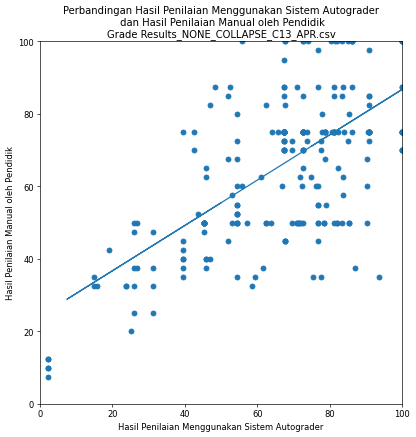

Linear Regression Plot of Grade Results_NONE_COLLAPSE_C21_APR.csv exam:
Info for plot=Grade Results_NONE_COLLAPSE_C21_APR.csv: m=0.8070604875598332, b=13.65496006431709


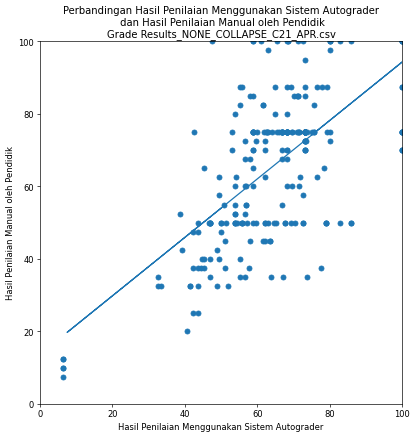

Linear Regression Plot of Grade Results_COUNTER_COLLAPSE_NBE_C12.csv exam:
Info for plot=Grade Results_COUNTER_COLLAPSE_NBE_C12.csv: m=0.42459136349644977, b=35.44401490779978


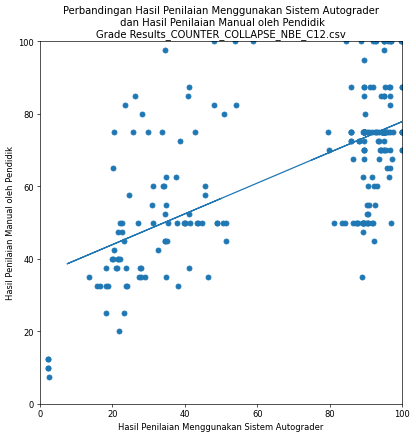

Linear Regression Plot of Grade Results_NONE_COLLAPSE_NBE_C31_APR.csv exam:
Info for plot=Grade Results_NONE_COLLAPSE_NBE_C31_APR.csv: m=0.8326816354078522, b=9.156820388670194


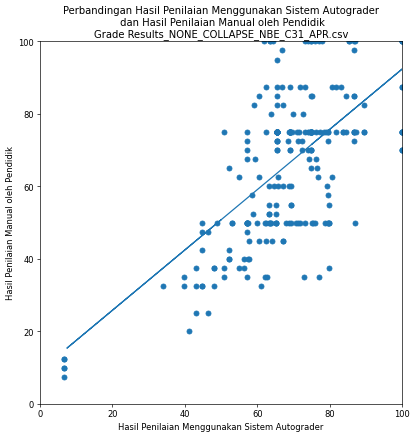

Linear Regression Plot of Grade Results_EXACT_COLLAPSE_NBE_C13_APR.csv exam:
Info for plot=Grade Results_EXACT_COLLAPSE_NBE_C13_APR.csv: m=0.5922404088590606, b=40.1693711798344


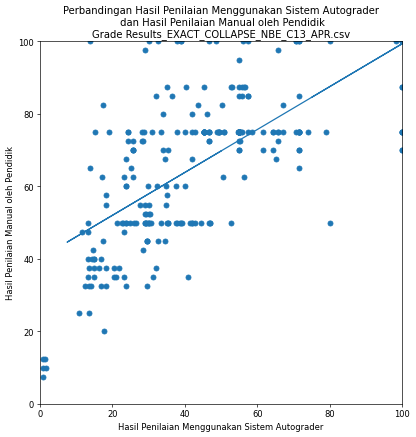

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C13_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C13_APR.csv: m=0.6027576371369939, b=39.14786892573558


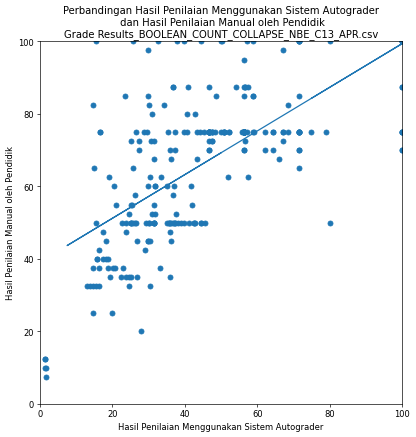

Linear Regression Plot of Grade Results_NONE_COLLAPSE_NBE_C11.csv exam:
Info for plot=Grade Results_NONE_COLLAPSE_NBE_C11.csv: m=0.49537360355068805, b=27.20554290917188


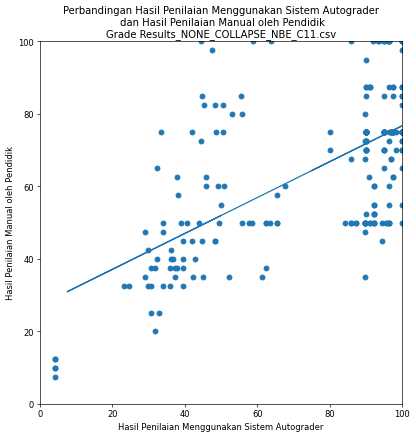

Linear Regression Plot of Grade Results_COUNTER_COLLAPSE_NBE_C11.csv exam:
Info for plot=Grade Results_COUNTER_COLLAPSE_NBE_C11.csv: m=0.5029912582709832, b=28.191265237093443


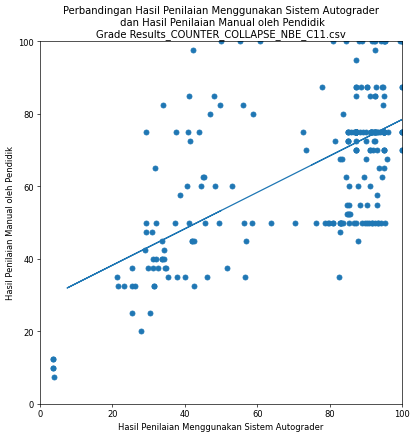

Linear Regression Plot of Grade Results_EXACT_COLLAPSE_C21_APR.csv exam:
Info for plot=Grade Results_EXACT_COLLAPSE_C21_APR.csv: m=0.7603793218847837, b=23.288203884214635


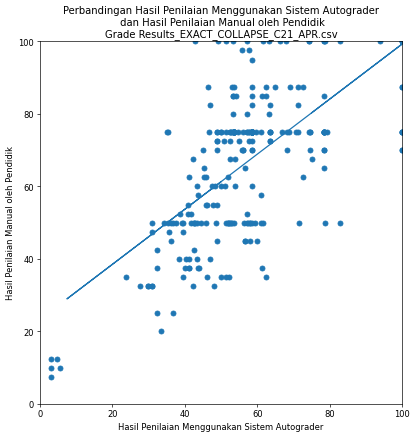

Linear Regression Plot of Grade Results_NONE_PROPAGATE_BRANCHING_C31_APR.csv exam:
Info for plot=Grade Results_NONE_PROPAGATE_BRANCHING_C31_APR.csv: m=0.8788101957392834, b=3.7863822190406755


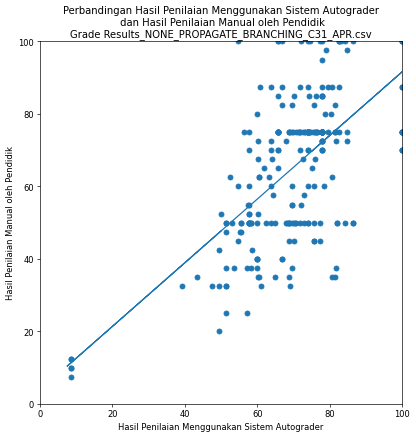

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_C32_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_COLLAPSE_C32_APR.csv: m=0.7642839494609756, b=22.22408131676022


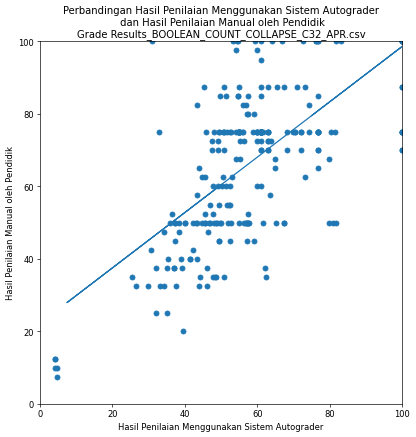

Linear Regression Plot of Grade Results_COUNTER_COLLAPSE_C11.csv exam:
Info for plot=Grade Results_COUNTER_COLLAPSE_C11.csv: m=0.5328001304855625, b=25.291019515492255


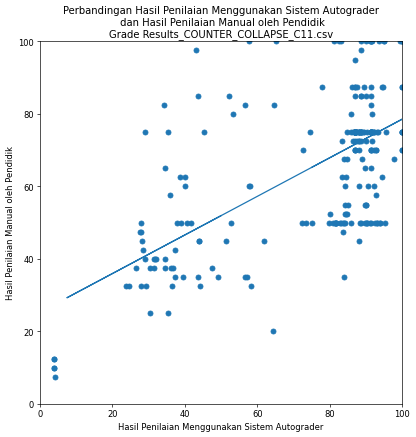

Linear Regression Plot of Grade Results_DAMERAU_LD_COLLAPSE_C32_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_COLLAPSE_C32_APR.csv: m=0.7572346496206852, b=22.799901365939032


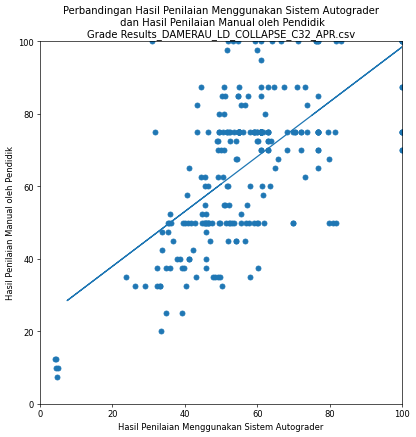

Linear Regression Plot of Grade Results_COUNTER_PROPAGATE_BRANCHING_C31_APR.csv exam:
Info for plot=Grade Results_COUNTER_PROPAGATE_BRANCHING_C31_APR.csv: m=0.8670725295282813, b=9.093179061272291


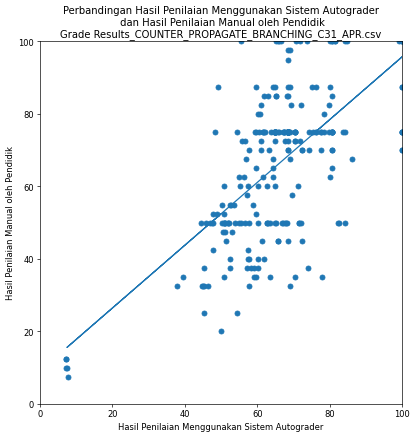

Linear Regression Plot of Grade Results_DAMERAU_LD_PROPAGATE_BRANCHING_C31_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_PROPAGATE_BRANCHING_C31_APR.csv: m=0.8544762449502504, b=10.843396305481752


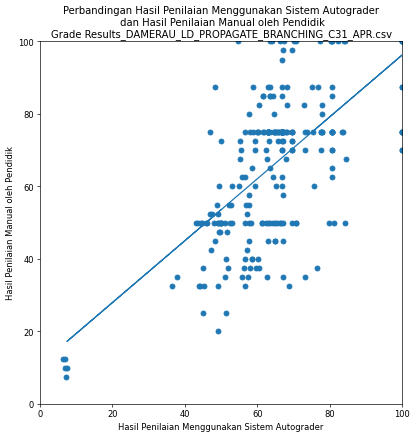

Linear Regression Plot of Grade Results_DAMERAU_LD_PROPAGATE_BRANCHING_C21_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_PROPAGATE_BRANCHING_C21_APR.csv: m=0.817546660550917, b=16.20528102097709


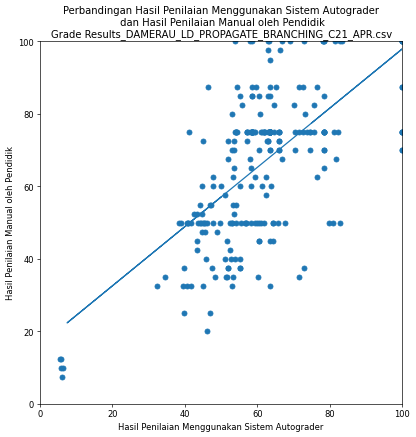

Linear Regression Plot of Grade Results_EXACT_COLLAPSE_C32_APR.csv exam:
Info for plot=Grade Results_EXACT_COLLAPSE_C32_APR.csv: m=0.7325041776016705, b=26.600816406930743


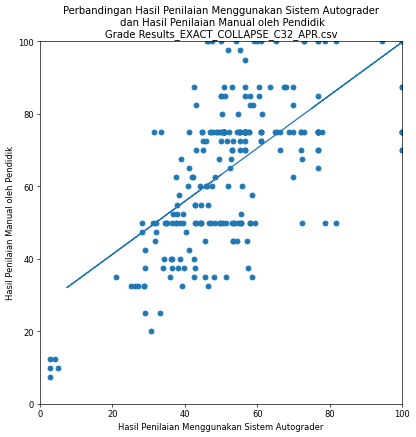

Linear Regression Plot of Grade Results_DAMERAU_LD_COLLAPSE_NBE_C13_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_COLLAPSE_NBE_C13_APR.csv: m=0.5897469202717787, b=39.84353767272103


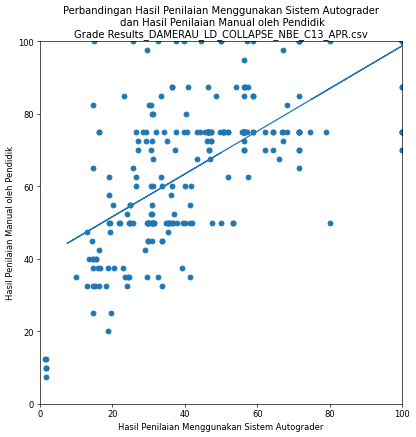

Linear Regression Plot of Grade Results_EXACT_COLLAPSE_C31_APR.csv exam:
Info for plot=Grade Results_EXACT_COLLAPSE_C31_APR.csv: m=0.7823592938713753, b=19.53348884094723


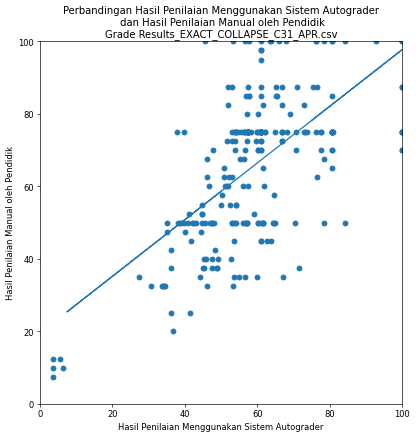

Linear Regression Plot of Grade Results_EXACT_COLLAPSE_C11.csv exam:
Info for plot=Grade Results_EXACT_COLLAPSE_C11.csv: m=0.5350640399308908, b=26.622946116743588


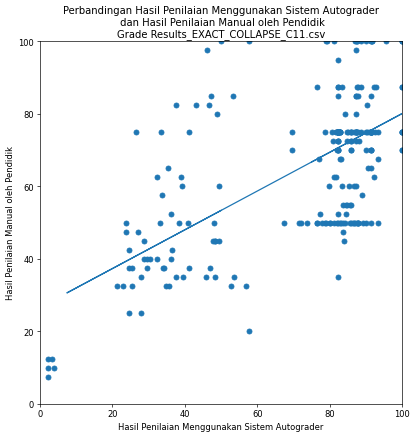

Linear Regression Plot of Grade Results_COUNTER_PROPAGATE_BRANCHING_C21_APR.csv exam:
Info for plot=Grade Results_COUNTER_PROPAGATE_BRANCHING_C21_APR.csv: m=0.8214739202242857, b=15.170859612920339


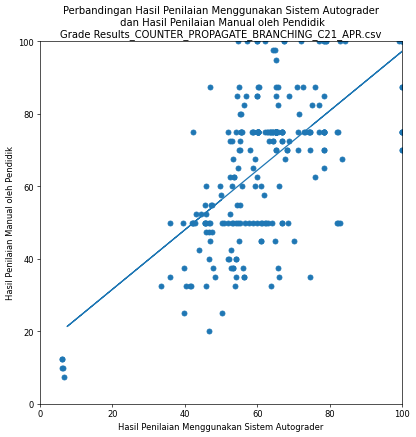

Linear Regression Plot of Grade Results_EXACT_COLLAPSE_NBE_C11.csv exam:
Info for plot=Grade Results_EXACT_COLLAPSE_NBE_C11.csv: m=0.48605568051374964, b=31.196767785721242


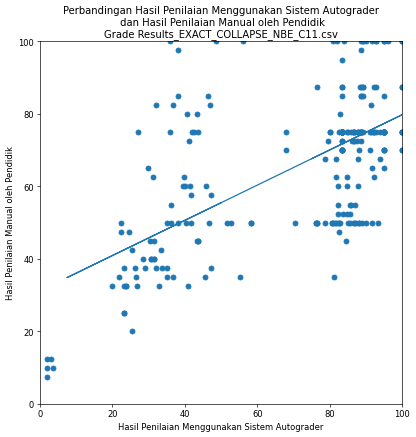

Linear Regression Plot of Grade Results_NONE_COLLAPSE_NBE_C21_APR.csv exam:
Info for plot=Grade Results_NONE_COLLAPSE_NBE_C21_APR.csv: m=0.7853578078037788, b=16.33917815074978


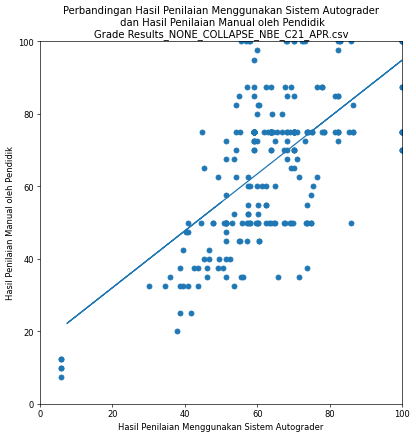

Linear Regression Plot of Grade Results_NONE_COLLAPSE_C32_APR.csv exam:
Info for plot=Grade Results_NONE_COLLAPSE_C32_APR.csv: m=0.7589143247575568, b=19.682303417857735


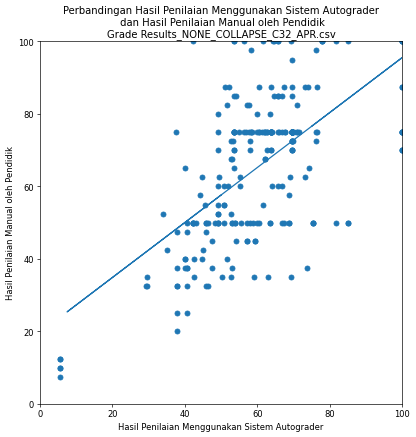

Linear Regression Plot of Grade Results_NONE_COLLAPSE_C11.csv exam:
Info for plot=Grade Results_NONE_COLLAPSE_C11.csv: m=0.5063219688700653, b=23.83569015633699


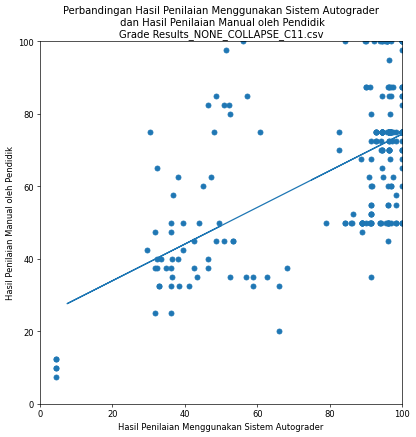

Linear Regression Plot of Grade Results_COUNTER_COLLAPSE_C23_APR.csv exam:
Info for plot=Grade Results_COUNTER_COLLAPSE_C23_APR.csv: m=0.6584918449794813, b=33.25278298648674


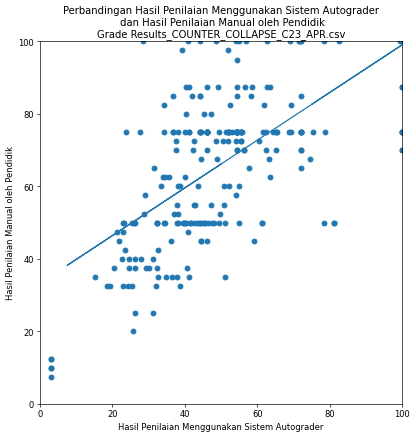

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C31_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C31_APR.csv: m=0.8493977556716102, b=10.717650643487977


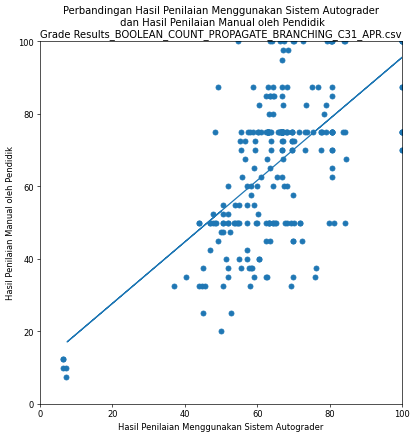

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_C11.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_COLLAPSE_C11.csv: m=0.5245647064024109, b=26.1025823068749


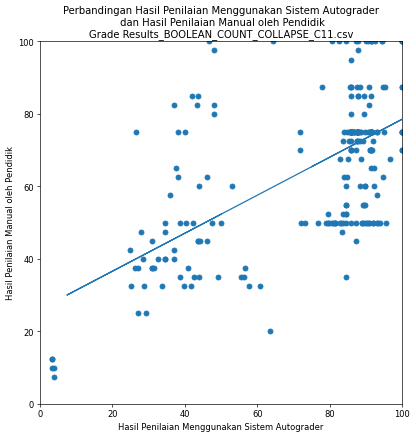

Linear Regression Plot of Grade Results_NONE_PROPAGATE_BRANCHING_C21_APR.csv exam:
Info for plot=Grade Results_NONE_PROPAGATE_BRANCHING_C21_APR.csv: m=0.8210414057489747, b=11.774614335570798


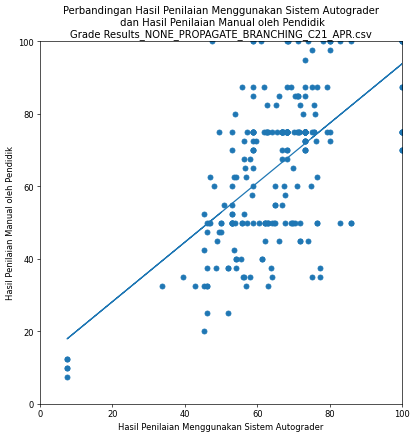

Linear Regression Plot of Grade Results_DAMERAU_LD_PROPAGATE_BRANCHING_C32_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_PROPAGATE_BRANCHING_C32_APR.csv: m=0.7583074567305786, b=21.9527166017465


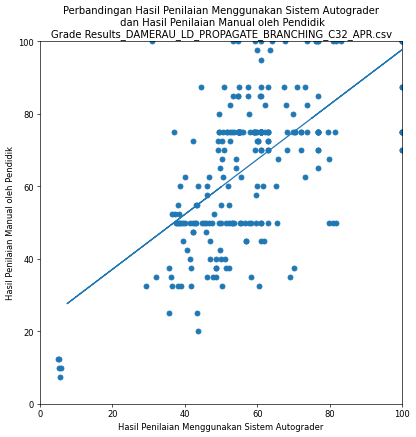

Linear Regression Plot of Grade Results_DAMERAU_LD_COLLAPSE_C11.csv exam:
Info for plot=Grade Results_DAMERAU_LD_COLLAPSE_C11.csv: m=0.5149200324639517, b=26.963008194674178


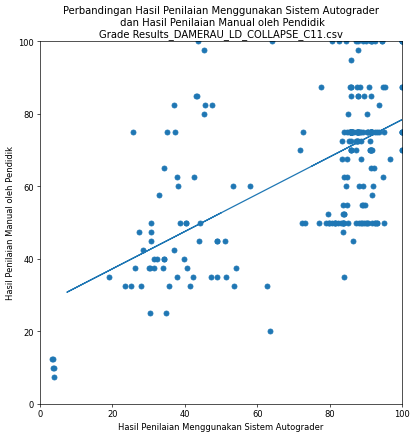

Linear Regression Plot of Grade Results_NONE_COLLAPSE_NBE_C32_APR.csv exam:
Info for plot=Grade Results_NONE_COLLAPSE_NBE_C32_APR.csv: m=0.7399814298842372, b=22.076178607950506


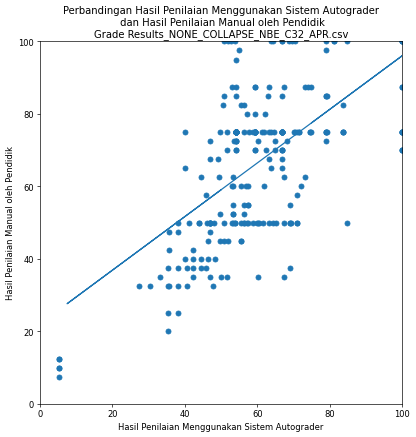

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C21_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C21_APR.csv: m=0.8075944195054184, b=16.356661247250486


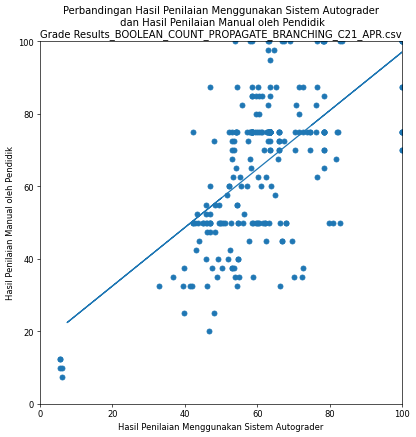

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C12.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C12.csv: m=0.3987141819969319, b=37.20711271641076


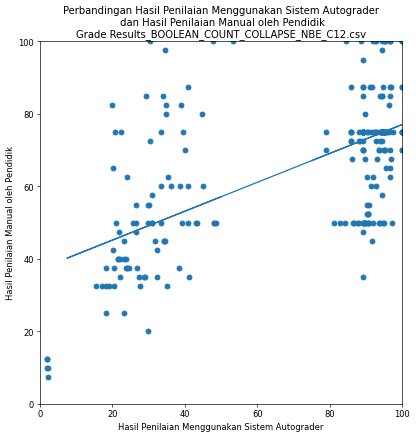

Linear Regression Plot of Grade Results_COUNTER_PROPAGATE_BRANCHING_C32_APR.csv exam:
Info for plot=Grade Results_COUNTER_PROPAGATE_BRANCHING_C32_APR.csv: m=0.7588206173156896, b=21.308961256775074


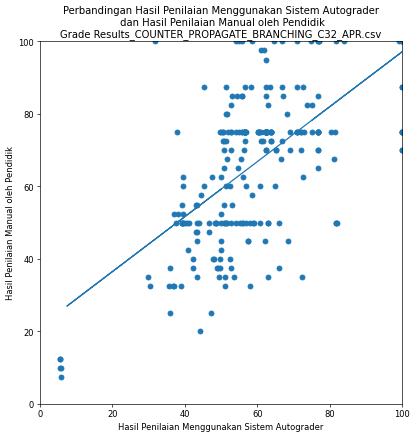

Linear Regression Plot of Grade Results_EXACT_COLLAPSE_NBE_C12.csv exam:
Info for plot=Grade Results_EXACT_COLLAPSE_NBE_C12.csv: m=0.40483646275152396, b=36.96282289259198


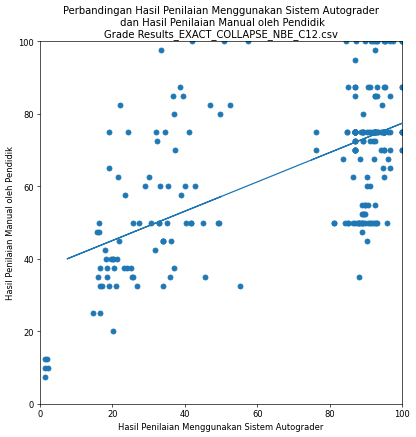

Linear Regression Plot of Grade Results_EXACT_COLLAPSE_C23_APR.csv exam:
Info for plot=Grade Results_EXACT_COLLAPSE_C23_APR.csv: m=0.6389275594670697, b=36.095129754147386


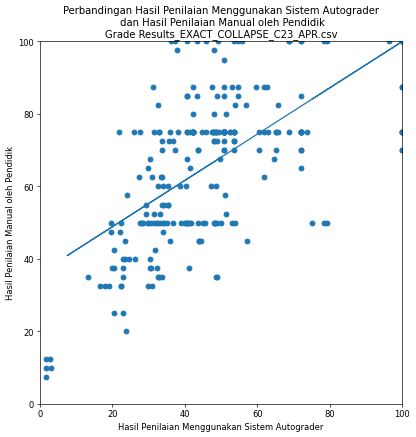

Linear Regression Plot of Grade Results_DAMERAU_LD_COLLAPSE_NBE_C12.csv exam:
Info for plot=Grade Results_DAMERAU_LD_COLLAPSE_NBE_C12.csv: m=0.3965529353880417, b=37.27033883384464


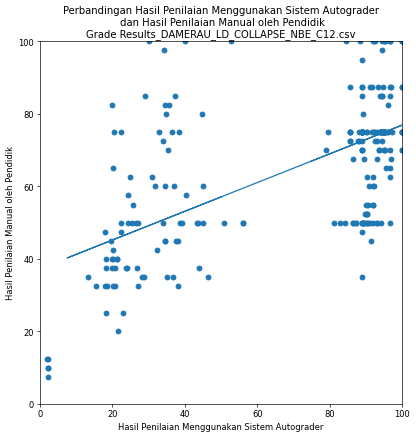

Linear Regression Plot of Grade Results_NONE_UNCOLLAPSE_C23_APR.csv exam:
Info for plot=Grade Results_NONE_UNCOLLAPSE_C23_APR.csv: m=0.6931979921097449, b=34.23439006252503


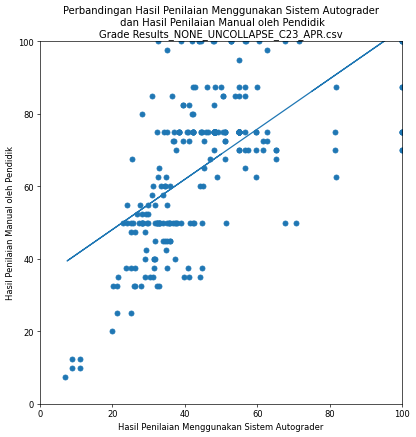

Linear Regression Plot of Grade Results_COUNTER_COLLAPSE_C12.csv exam:
Info for plot=Grade Results_COUNTER_COLLAPSE_C12.csv: m=0.4321177810281948, b=32.76456437531901


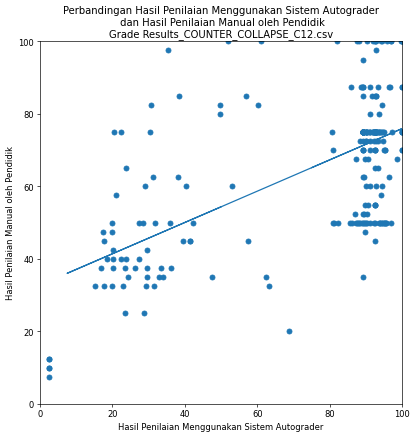

Linear Regression Plot of Grade Results_NONE_COLLAPSE_NBE_C13.csv exam:
Info for plot=Grade Results_NONE_COLLAPSE_NBE_C13.csv: m=0.3661109701580451, b=38.571772715492735


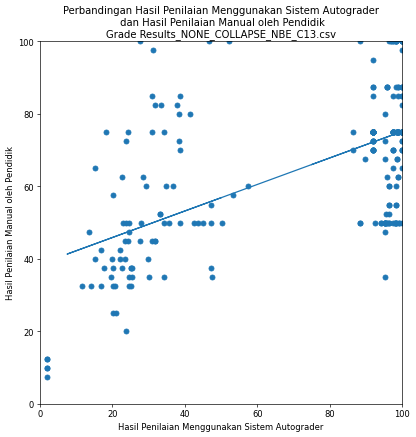

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_C23_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_COLLAPSE_C23_APR.csv: m=0.6400761064340239, b=34.557413835409854


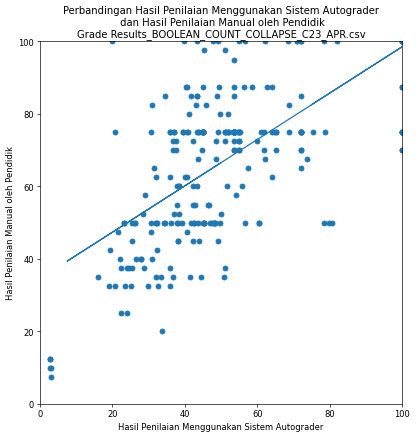

Linear Regression Plot of Grade Results_COUNTER_COLLAPSE_C13.csv exam:
Info for plot=Grade Results_COUNTER_COLLAPSE_C13.csv: m=0.3930000858209155, b=35.72070770929683


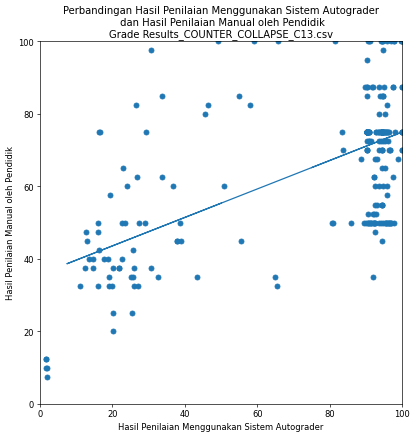

Linear Regression Plot of Grade Results_COUNTER_COLLAPSE_C13_APR.csv exam:
Info for plot=Grade Results_COUNTER_COLLAPSE_C13_APR.csv: m=0.5817752943267903, b=40.4716547260037


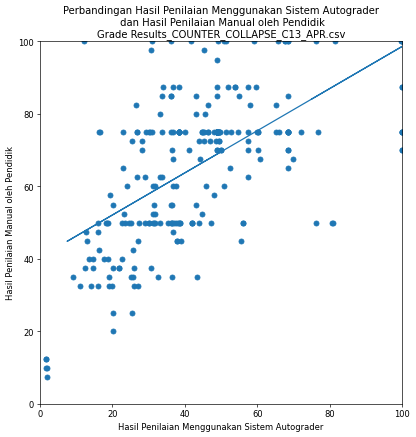

Linear Regression Plot of Grade Results_NONE_PROPAGATE_BRANCHING_C32_APR.csv exam:
Info for plot=Grade Results_NONE_PROPAGATE_BRANCHING_C32_APR.csv: m=0.7674215363256826, b=18.141289868744483


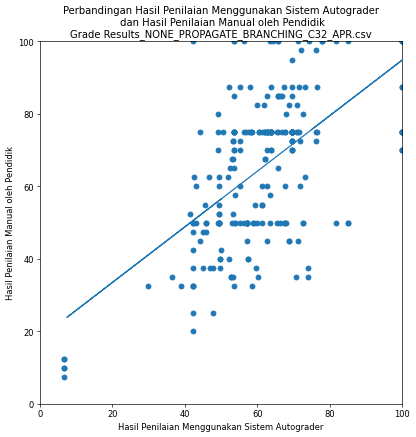

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_C12.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_COLLAPSE_C12.csv: m=0.42376810248697394, b=33.830339973200495


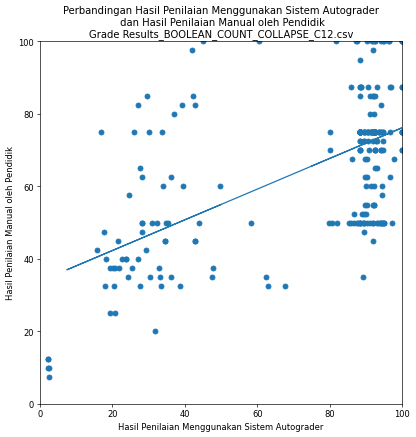

Linear Regression Plot of Grade Results_DAMERAU_LD_COLLAPSE_C23_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_COLLAPSE_C23_APR.csv: m=0.6275677447359371, b=35.297110984174296


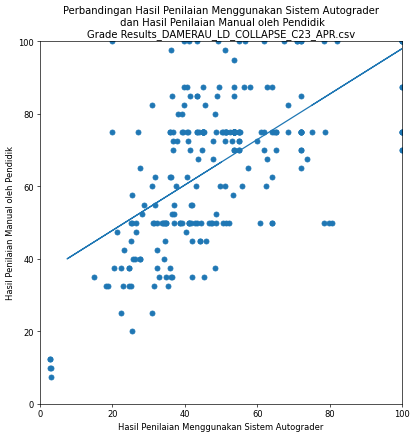

Linear Regression Plot of Grade Results_EXACT_PROPAGATE_BRANCHING_C21_APR.csv exam:
Info for plot=Grade Results_EXACT_PROPAGATE_BRANCHING_C21_APR.csv: m=0.7432014751645336, b=23.35845015440819


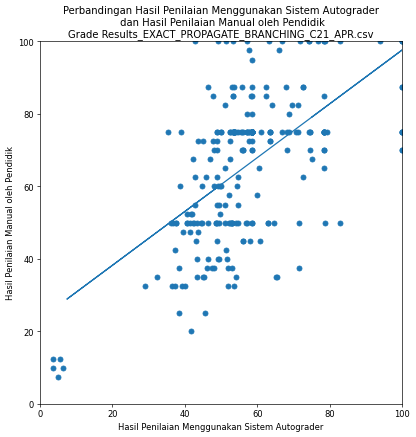

Linear Regression Plot of Grade Results_EXACT_COLLAPSE_C12.csv exam:
Info for plot=Grade Results_EXACT_COLLAPSE_C12.csv: m=0.43036243449529066, b=33.72978036207686


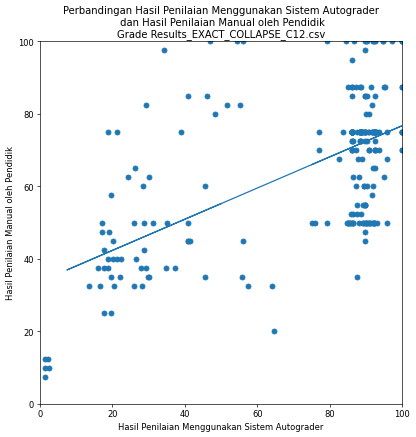

Linear Regression Plot of Grade Results_EXACT_UNCOLLAPSE_C23_APR.csv exam:
Info for plot=Grade Results_EXACT_UNCOLLAPSE_C23_APR.csv: m=0.6101492198856284, b=37.398673102068805


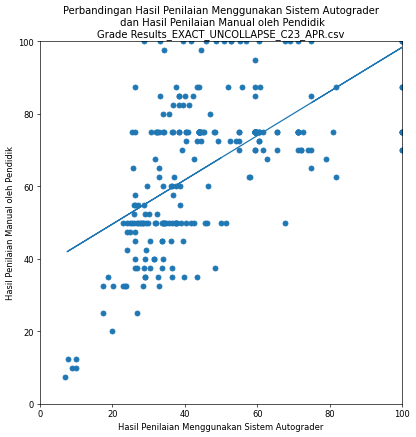

Linear Regression Plot of Grade Results_DAMERAU_LD_UNCOLLAPSE_C23_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_UNCOLLAPSE_C23_APR.csv: m=0.6101492198856284, b=37.398673102068805


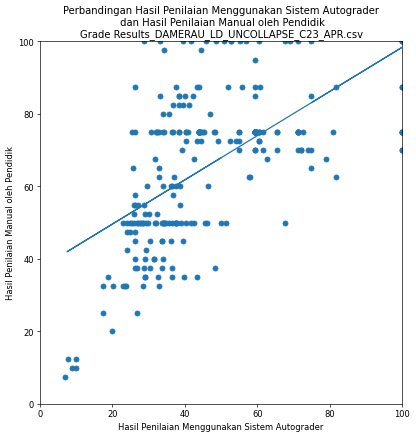

Linear Regression Plot of Grade Results_COUNTER_UNCOLLAPSE_C23_APR.csv exam:
Info for plot=Grade Results_COUNTER_UNCOLLAPSE_C23_APR.csv: m=0.6101492198856284, b=37.398673102068805


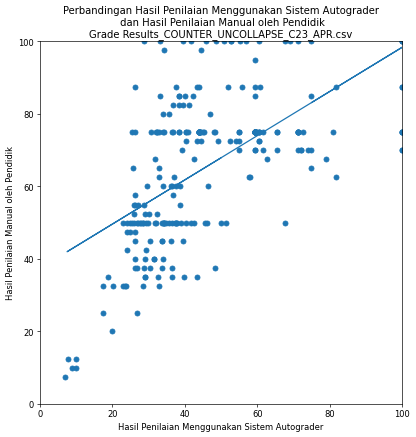

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C23_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C23_APR.csv: m=0.6101492198856284, b=37.398673102068805


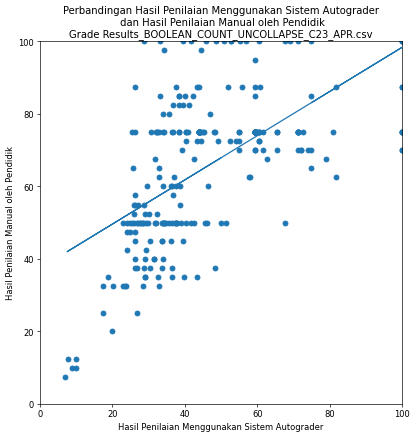

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C32_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C32_APR.csv: m=0.7395234699501722, b=22.714399695015917


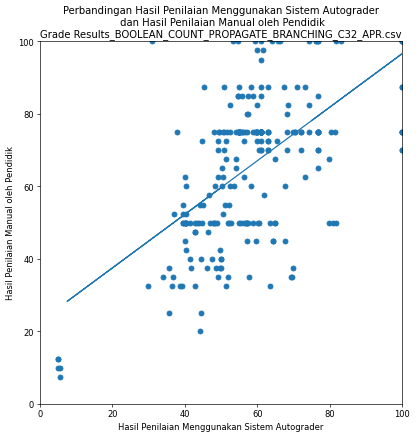

Linear Regression Plot of Grade Results_EXACT_PROPAGATE_BRANCHING_C32_APR.csv exam:
Info for plot=Grade Results_EXACT_PROPAGATE_BRANCHING_C32_APR.csv: m=0.7005363836692632, b=27.687559268171388


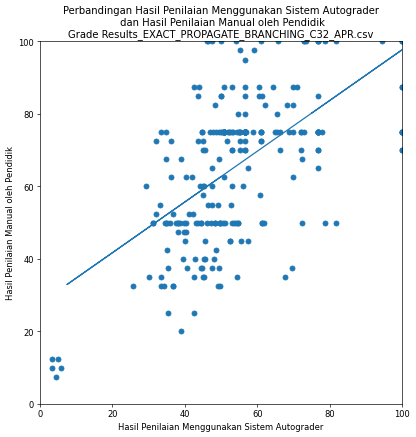

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C11.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C11.csv: m=0.6961784825215419, b=9.71976993872681


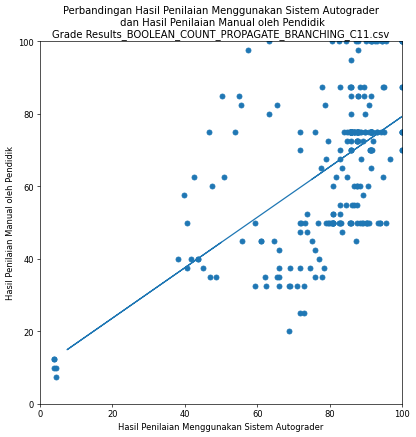

Linear Regression Plot of Grade Results_EXACT_COLLAPSE_C13_APR.csv exam:
Info for plot=Grade Results_EXACT_COLLAPSE_C13_APR.csv: m=0.5726837862337983, b=41.84951248354433


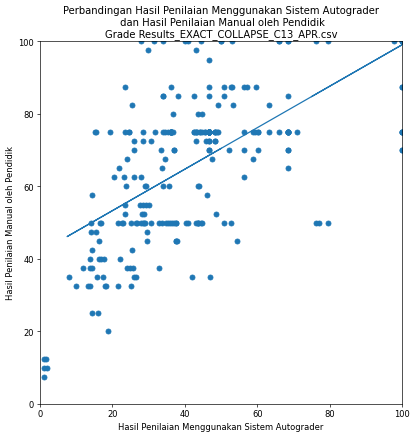

Linear Regression Plot of Grade Results_NONE_COLLAPSE_NBE_C12.csv exam:
Info for plot=Grade Results_NONE_COLLAPSE_NBE_C12.csv: m=0.3881940171040822, b=35.87554456815342


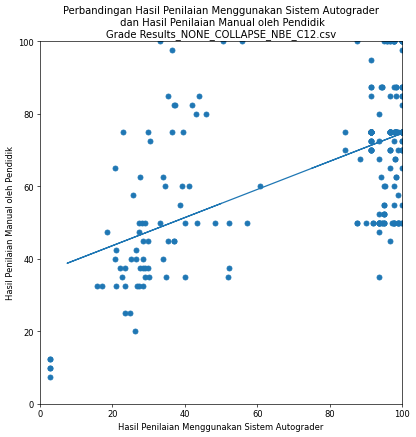

Linear Regression Plot of Grade Results_EXACT_PROPAGATE_BRANCHING_C31_APR.csv exam:
Info for plot=Grade Results_EXACT_PROPAGATE_BRANCHING_C31_APR.csv: m=0.7626459168276524, b=19.833392265440477


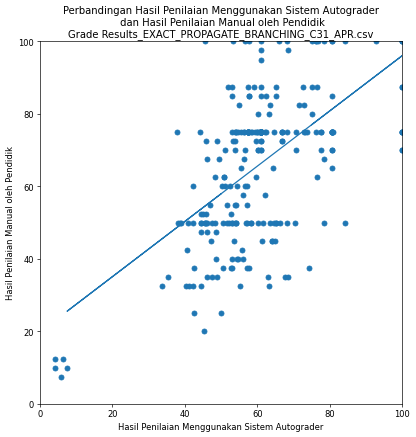

Linear Regression Plot of Grade Results_NONE_COLLAPSE_C12.csv exam:
Info for plot=Grade Results_NONE_COLLAPSE_C12.csv: m=0.403905339610831, b=33.12159563692483


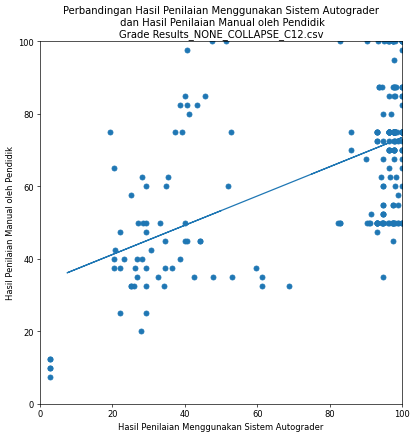

Linear Regression Plot of Grade Results_COUNTER_PROPAGATE_BRANCHING_C11.csv exam:
Info for plot=Grade Results_COUNTER_PROPAGATE_BRANCHING_C11.csv: m=0.6622650571178569, b=12.41526011719438


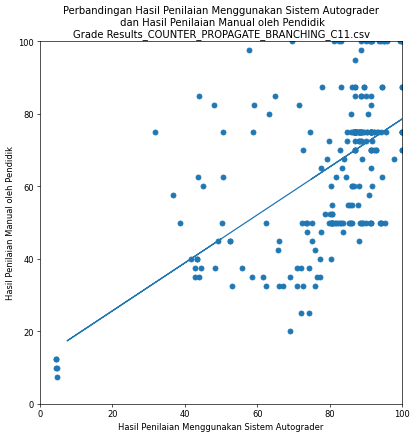

Linear Regression Plot of Grade Results_DAMERAU_LD_PROPAGATE_BRANCHING_C11.csv exam:
Info for plot=Grade Results_DAMERAU_LD_PROPAGATE_BRANCHING_C11.csv: m=0.6553763234333416, b=13.569259804009878


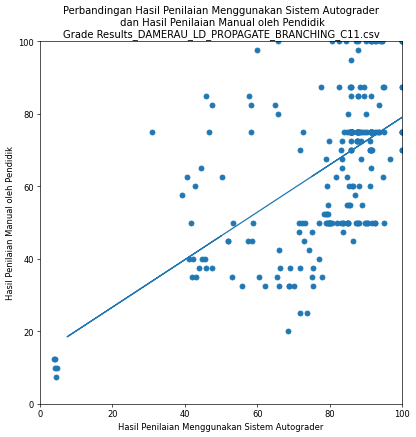

Linear Regression Plot of Grade Results_NONE_COLLAPSE_C13.csv exam:
Info for plot=Grade Results_NONE_COLLAPSE_C13.csv: m=0.3834767917112595, b=34.429956341400356


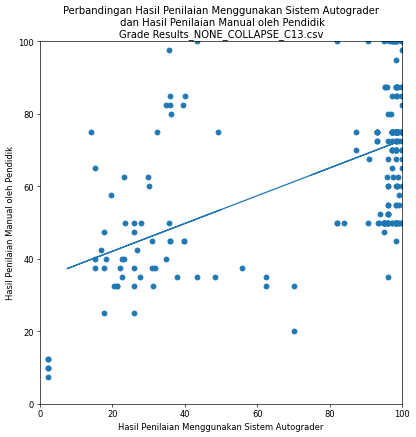

Linear Regression Plot of Grade Results_DAMERAU_LD_PROPAGATE_BRANCHING_C23_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_PROPAGATE_BRANCHING_C23_APR.csv: m=0.6418699651638432, b=33.612160675801164


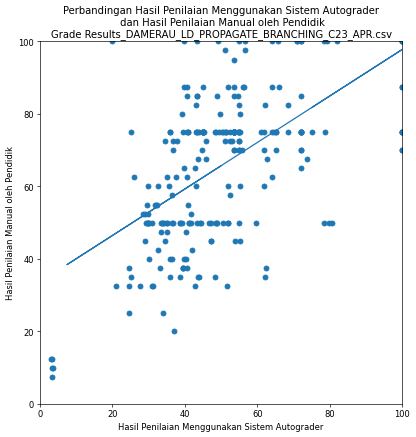

Linear Regression Plot of Grade Results_EXACT_PROPAGATE_BRANCHING_C23_APR.csv exam:
Info for plot=Grade Results_EXACT_PROPAGATE_BRANCHING_C23_APR.csv: m=0.6154900341501143, b=36.49522548535999


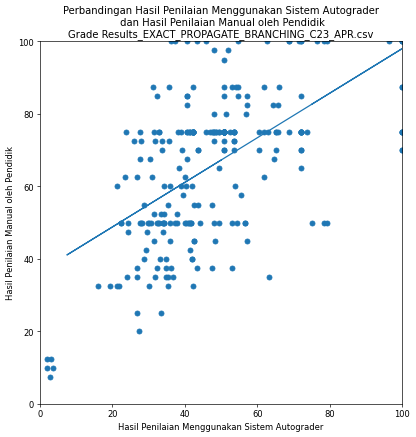

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_C13_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_COLLAPSE_C13_APR.csv: m=0.5647019933593478, b=41.395450723864705


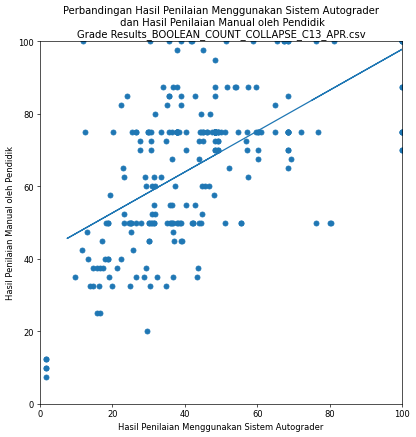

Linear Regression Plot of Grade Results_NONE_PROPAGATE_BRANCHING_C11.csv exam:
Info for plot=Grade Results_NONE_PROPAGATE_BRANCHING_C11.csv: m=0.6430932378527648, b=9.51435253528305


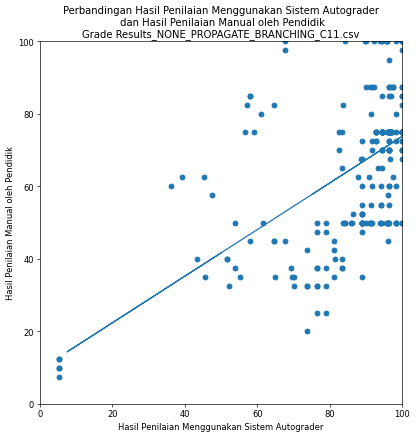

Linear Regression Plot of Grade Results_COUNTER_PROPAGATE_BRANCHING_C23_APR.csv exam:
Info for plot=Grade Results_COUNTER_PROPAGATE_BRANCHING_C23_APR.csv: m=0.6402114700208537, b=33.209473674776916


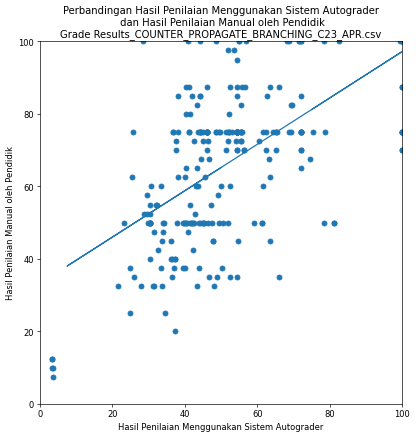

Linear Regression Plot of Grade Results_DAMERAU_LD_COLLAPSE_C12.csv exam:
Info for plot=Grade Results_DAMERAU_LD_COLLAPSE_C12.csv: m=0.40670825491913826, b=34.89507345937866


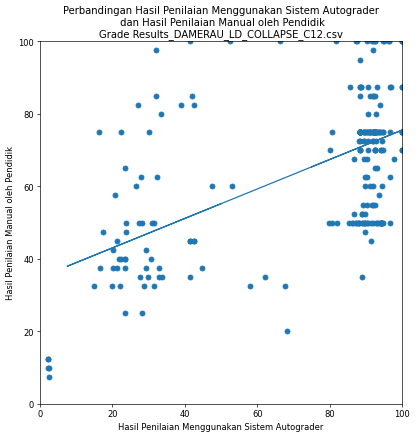

Linear Regression Plot of Grade Results_EXACT_PROPAGATE_BRANCHING_C11.csv exam:
Info for plot=Grade Results_EXACT_PROPAGATE_BRANCHING_C11.csv: m=0.6411784181616009, b=15.907998511917924


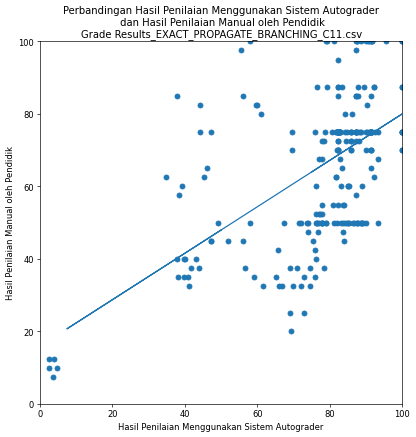

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_C13.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_COLLAPSE_C13.csv: m=0.3773825536131486, b=36.73771966884951


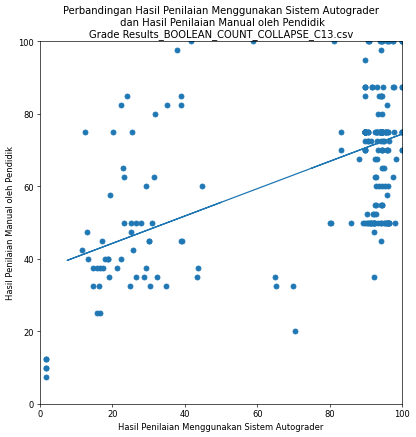

Linear Regression Plot of Grade Results_NONE_COLLAPSE_C23_APR.csv exam:
Info for plot=Grade Results_NONE_COLLAPSE_C23_APR.csv: m=0.6104205437082266, b=35.31155171047117


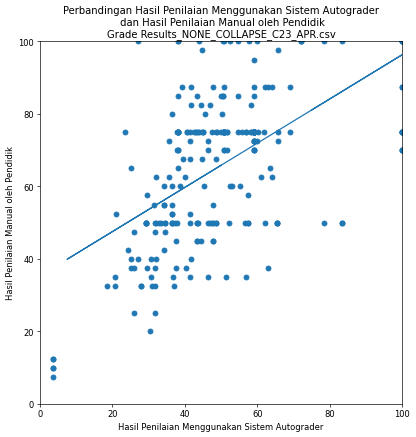

Linear Regression Plot of Grade Results_DAMERAU_LD_COLLAPSE_C13_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_COLLAPSE_C13_APR.csv: m=0.5468471706897279, b=42.293843072225606


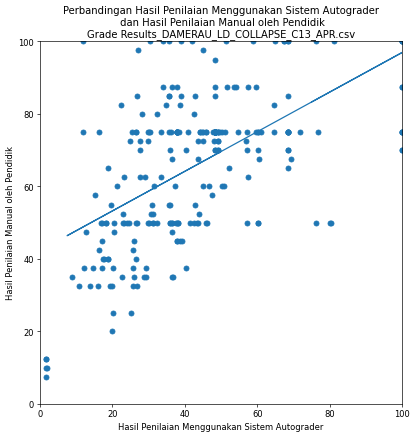

Linear Regression Plot of Grade Results_EXACT_UNCOLLAPSE_C13_APR.csv exam:
Info for plot=Grade Results_EXACT_UNCOLLAPSE_C13_APR.csv: m=0.5298001424024339, b=44.894730550055506


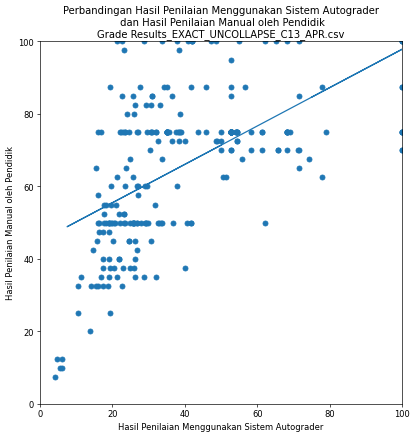

Linear Regression Plot of Grade Results_DAMERAU_LD_UNCOLLAPSE_C13_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_UNCOLLAPSE_C13_APR.csv: m=0.5298001424024339, b=44.894730550055506


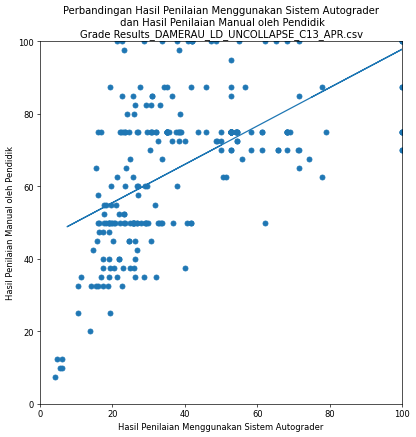

Linear Regression Plot of Grade Results_COUNTER_UNCOLLAPSE_C13_APR.csv exam:
Info for plot=Grade Results_COUNTER_UNCOLLAPSE_C13_APR.csv: m=0.5298001424024339, b=44.894730550055506


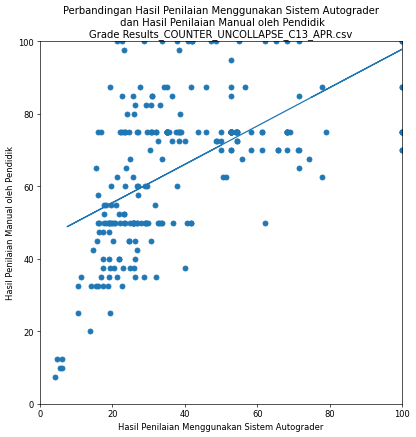

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C13_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C13_APR.csv: m=0.5298001424024339, b=44.894730550055506


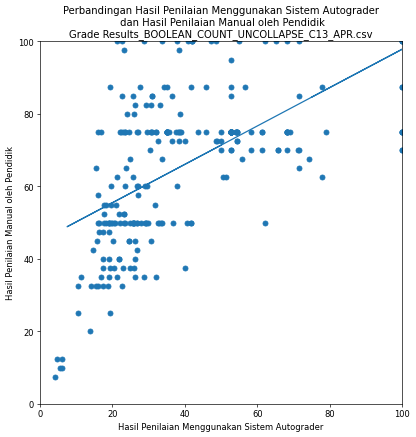

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C23_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C23_APR.csv: m=0.6218434576414641, b=34.46120634954773


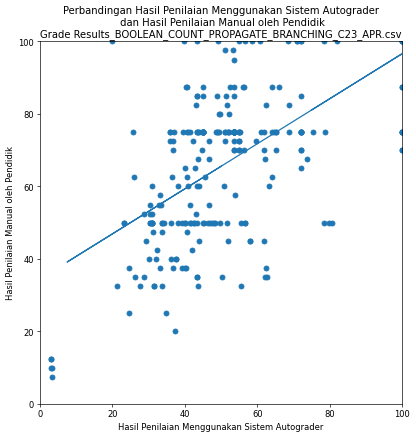

Linear Regression Plot of Grade Results_NONE_COLLAPSE_NBE_C23_APR.csv exam:
Info for plot=Grade Results_NONE_COLLAPSE_NBE_C23_APR.csv: m=0.5950329012205559, b=37.19675399035378


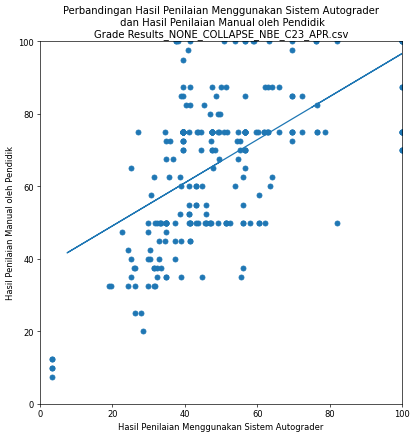

Linear Regression Plot of Grade Results_EXACT_PROPAGATE_BRANCHING_C13_APR.csv exam:
Info for plot=Grade Results_EXACT_PROPAGATE_BRANCHING_C13_APR.csv: m=0.5409886311989672, b=42.460055568876456


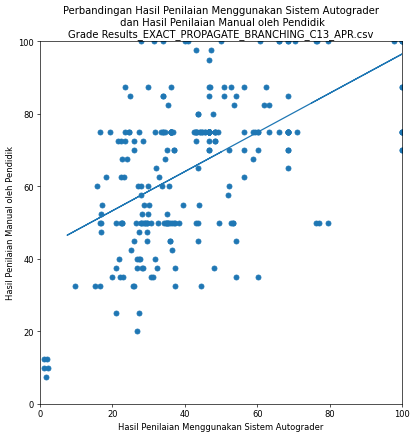

Linear Regression Plot of Grade Results_DAMERAU_LD_PROPAGATE_BRANCHING_C13_APR.csv exam:
Info for plot=Grade Results_DAMERAU_LD_PROPAGATE_BRANCHING_C13_APR.csv: m=0.5524593197583946, b=40.936855502635645


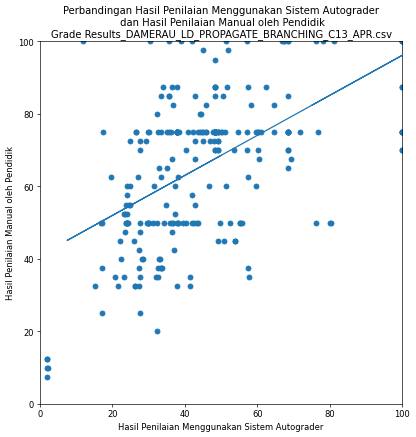

Linear Regression Plot of Grade Results_COUNTER_PROPAGATE_BRANCHING_C13_APR.csv exam:
Info for plot=Grade Results_COUNTER_PROPAGATE_BRANCHING_C13_APR.csv: m=0.5507640361169414, b=40.982584755085504


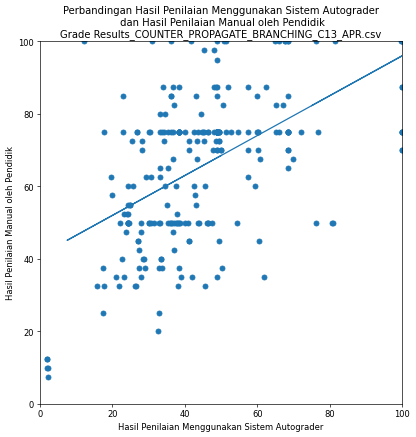

Linear Regression Plot of Grade Results_NONE_PROPAGATE_BRANCHING_C12.csv exam:
Info for plot=Grade Results_NONE_PROPAGATE_BRANCHING_C12.csv: m=0.5227658821007315, b=19.90677998484184


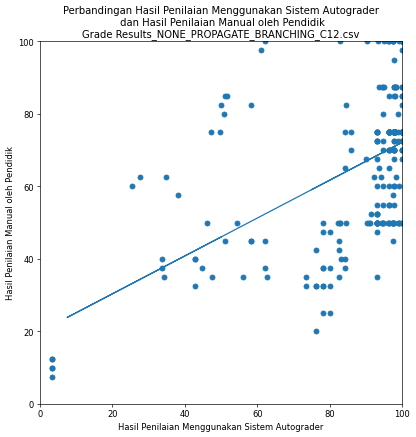

Linear Regression Plot of Grade Results_DAMERAU_LD_PROPAGATE_BRANCHING_C12.csv exam:
Info for plot=Grade Results_DAMERAU_LD_PROPAGATE_BRANCHING_C12.csv: m=0.5312086645344581, b=22.08452030057798


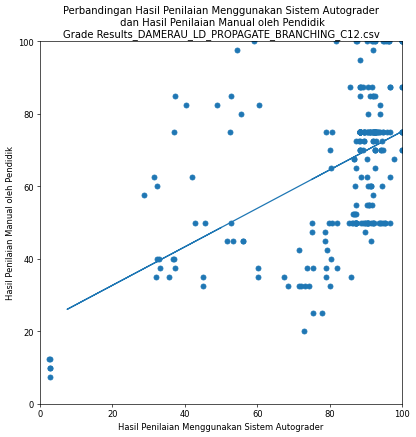

Linear Regression Plot of Grade Results_NONE_PROPAGATE_BRANCHING_C23_APR.csv exam:
Info for plot=Grade Results_NONE_PROPAGATE_BRANCHING_C23_APR.csv: m=0.600794598628224, b=34.677067726605166


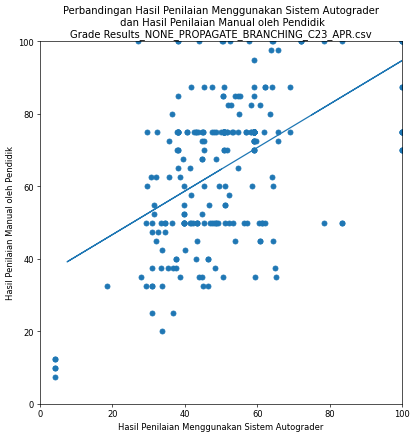

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C12.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C12.csv: m=0.5234855855370971, b=22.746153014655906


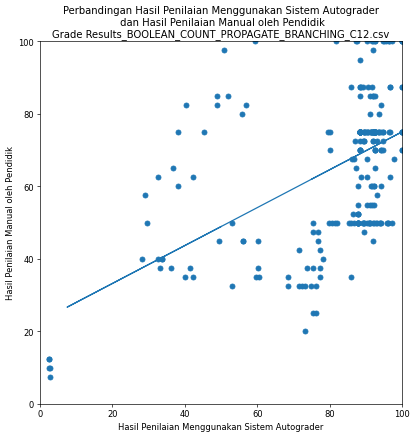

Linear Regression Plot of Grade Results_COUNTER_PROPAGATE_BRANCHING_C13.csv exam:
Info for plot=Grade Results_COUNTER_PROPAGATE_BRANCHING_C13.csv: m=0.4242848795502835, b=31.584358978100116


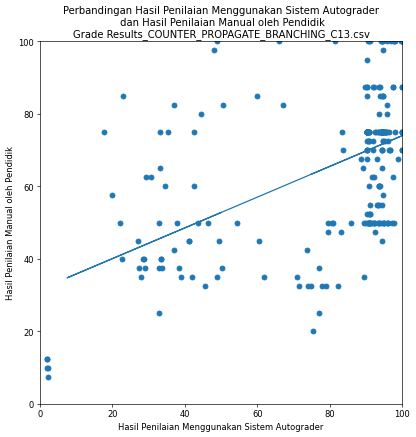

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C13_APR.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C13_APR.csv: m=0.541605092703904, b=41.32338560371768


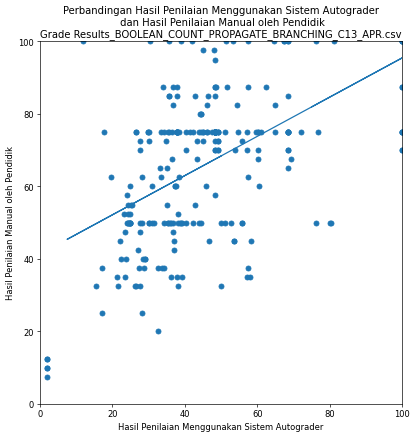

Linear Regression Plot of Grade Results_EXACT_PROPAGATE_BRANCHING_C12.csv exam:
Info for plot=Grade Results_EXACT_PROPAGATE_BRANCHING_C12.csv: m=0.5202161607870237, b=23.59596318431992


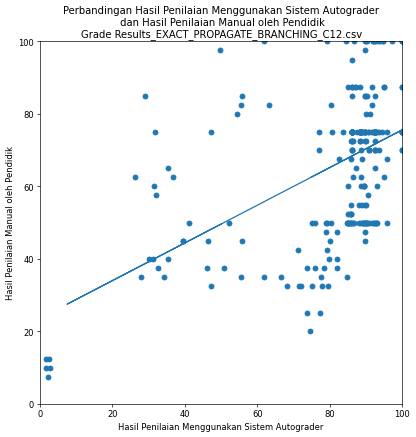

Linear Regression Plot of Grade Results_NONE_COLLAPSE_NBE_C13_APR.csv exam:
Info for plot=Grade Results_NONE_COLLAPSE_NBE_C13_APR.csv: m=0.4973531051952295, b=45.704407783749694


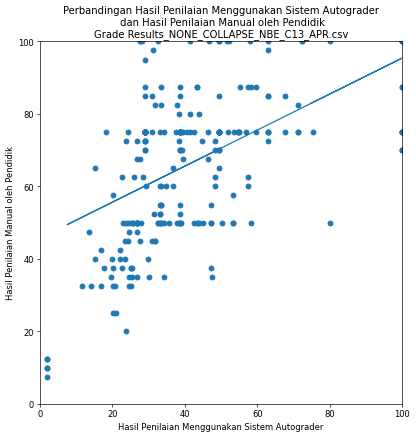

Linear Regression Plot of Grade Results_NONE_PROPAGATE_BRANCHING_C13.csv exam:
Info for plot=Grade Results_NONE_PROPAGATE_BRANCHING_C13.csv: m=0.46415699325642923, b=24.923632526629756


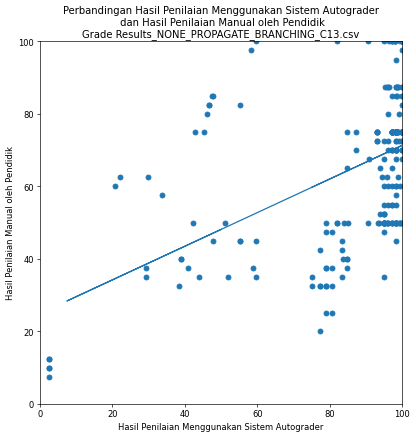

Linear Regression Plot of Grade Results_COUNTER_PROPAGATE_BRANCHING_C12.csv exam:
Info for plot=Grade Results_COUNTER_PROPAGATE_BRANCHING_C12.csv: m=0.46391537106530256, b=27.97243078873004


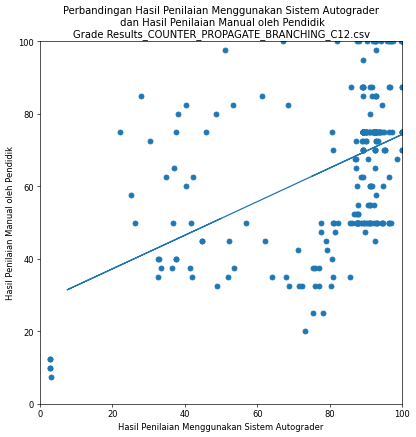

Linear Regression Plot of Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C13.csv exam:
Info for plot=Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C13.csv: m=0.45550170932874623, b=27.75927514801249


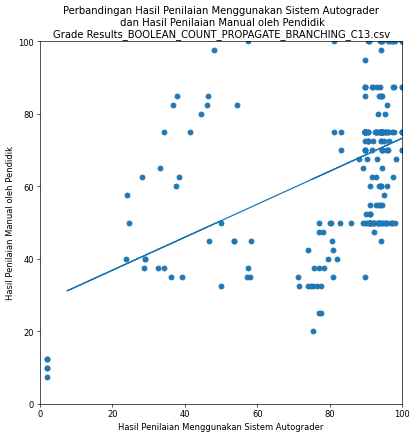

Linear Regression Plot of Grade Results_NONE_PROPAGATE_BRANCHING_C13_APR.csv exam:
Info for plot=Grade Results_NONE_PROPAGATE_BRANCHING_C13_APR.csv: m=0.4916042158972958, b=43.82017248469467


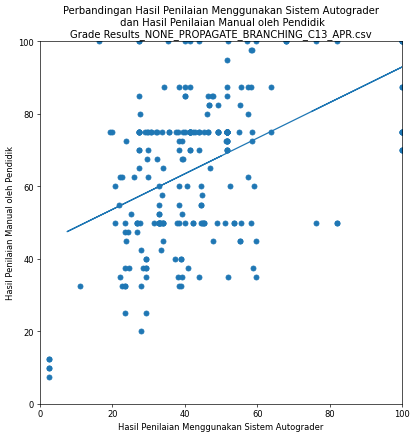

In [10]:
# Show Linear Regression Plot
# for name, df in dataframes.items():
#     print(f'Linear Regression Plot of {name} exam:')
#     linear_regression_plot(name, df)
for _, name in correls:
    df = dataframes[name]
    print(f'Linear Regression Plot of {name} exam:')
    linear_regression_plot(name, df)

Confusion Matrix Plot of Grade Results_NONE_UNCOLLAPSE_C31.csv exam:


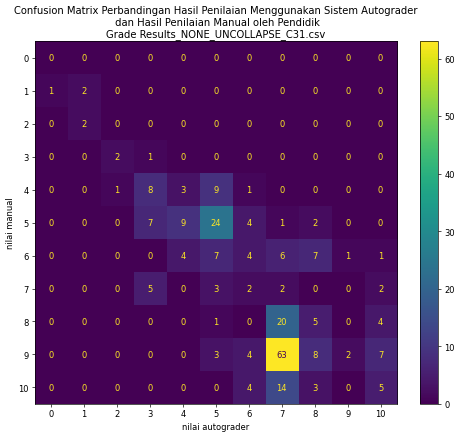

Confusion Matrix Plot of Grade Results_NONE_UNCOLLAPSE_C21.csv exam:


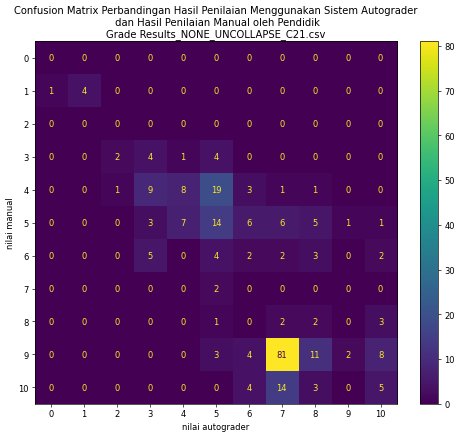

Confusion Matrix Plot of Grade Results_NONE_UNCOLLAPSE_C32.csv exam:


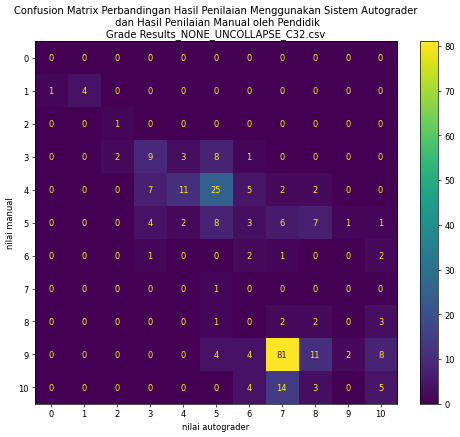

Confusion Matrix Plot of Grade Results_EXACT_UNCOLLAPSE_C11.csv exam:


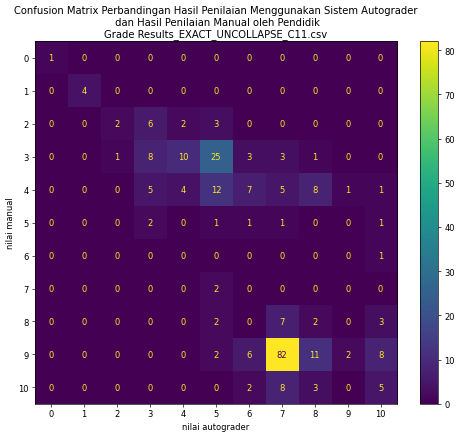

Confusion Matrix Plot of Grade Results_DAMERAU_LD_UNCOLLAPSE_C11.csv exam:


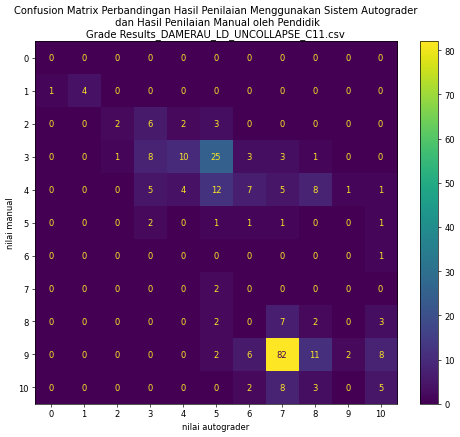

Confusion Matrix Plot of Grade Results_COUNTER_UNCOLLAPSE_C11.csv exam:


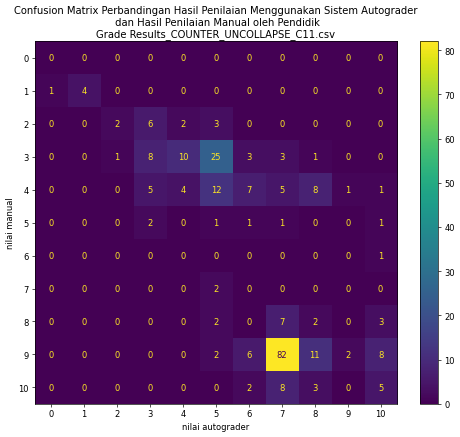

Confusion Matrix Plot of Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C11.csv exam:


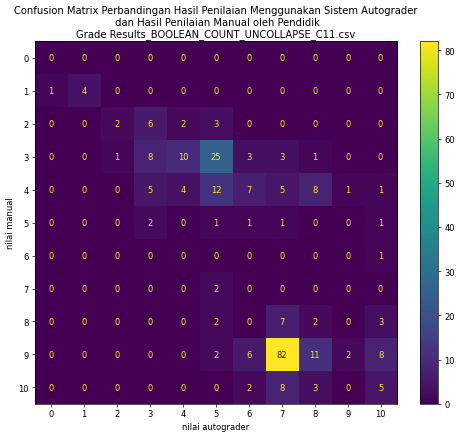

Confusion Matrix Plot of Grade Results_NONE_UNCOLLAPSE_C11.csv exam:


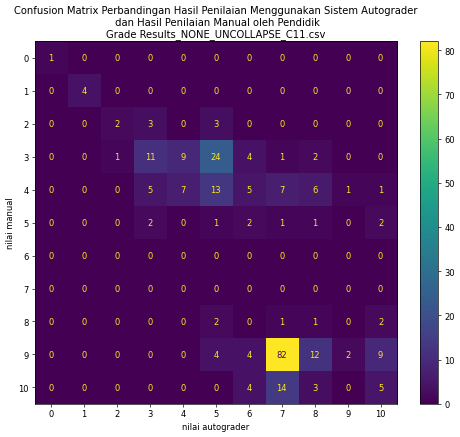

Confusion Matrix Plot of Grade Results_COUNTER_COLLAPSE_NBE_C21_APR.csv exam:


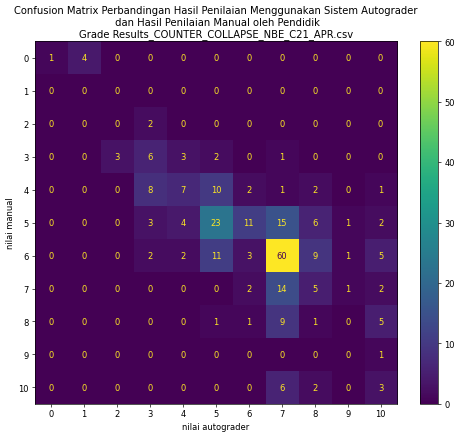

Confusion Matrix Plot of Grade Results_COUNTER_UNCOLLAPSE_C12.csv exam:


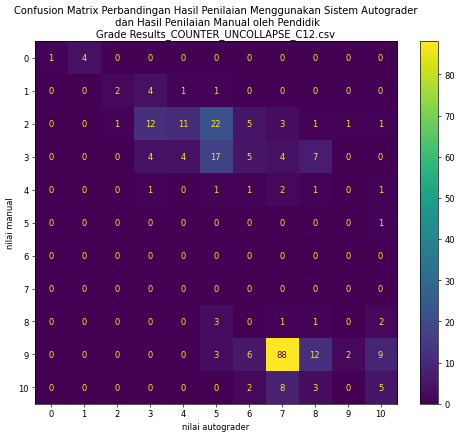

Confusion Matrix Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C21_APR.csv exam:


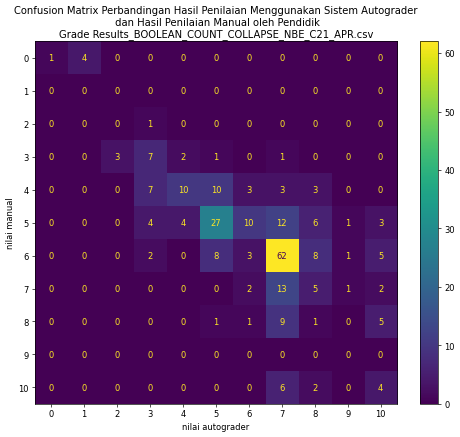

Confusion Matrix Plot of Grade Results_NONE_UNCOLLAPSE_C23.csv exam:


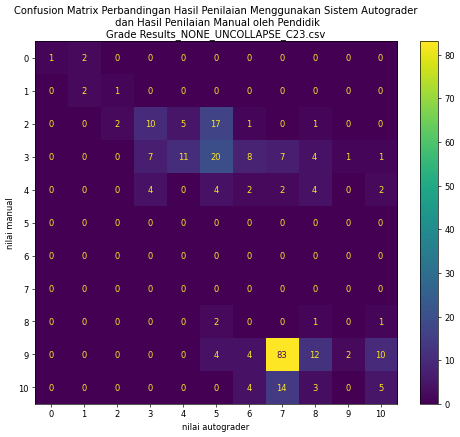

Confusion Matrix Plot of Grade Results_COUNTER_COLLAPSE_NBE_C31_APR.csv exam:


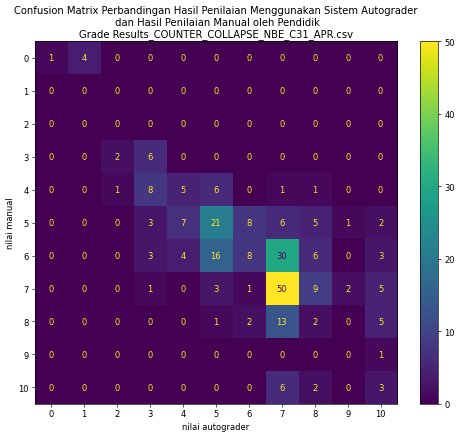

Confusion Matrix Plot of Grade Results_EXACT_UNCOLLAPSE_C12.csv exam:


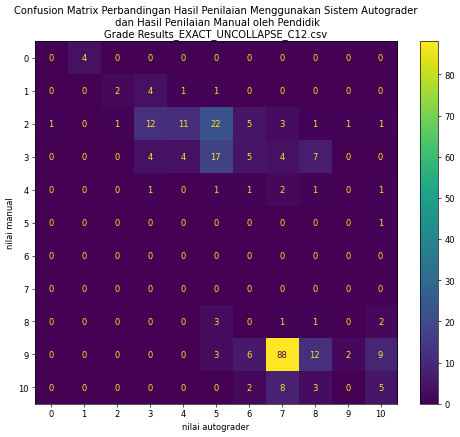

Confusion Matrix Plot of Grade Results_DAMERAU_LD_UNCOLLAPSE_C12.csv exam:


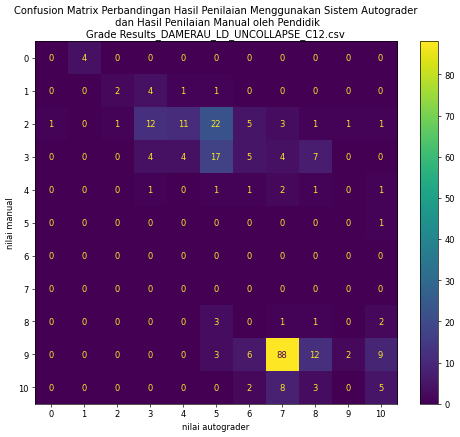

Confusion Matrix Plot of Grade Results_DAMERAU_LD_COLLAPSE_NBE_C21_APR.csv exam:


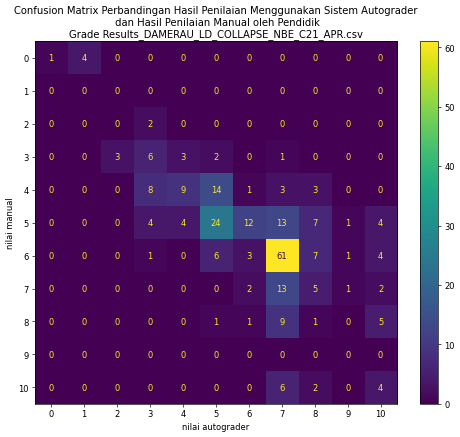

Confusion Matrix Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C31_APR.csv exam:


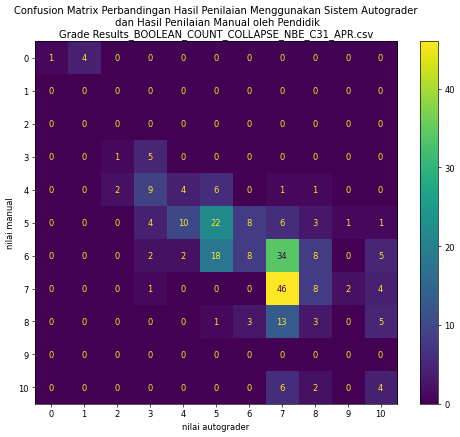

Confusion Matrix Plot of Grade Results_DAMERAU_LD_COLLAPSE_NBE_C31_APR.csv exam:


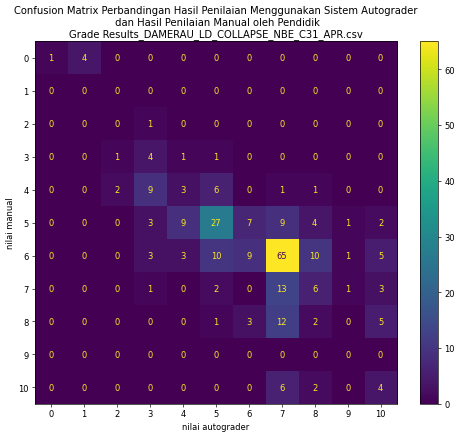

Confusion Matrix Plot of Grade Results_NONE_UNCOLLAPSE_C12.csv exam:


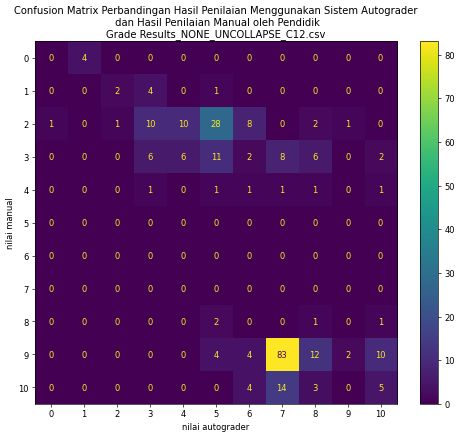

Confusion Matrix Plot of Grade Results_NONE_UNCOLLAPSE_C31_APR.csv exam:


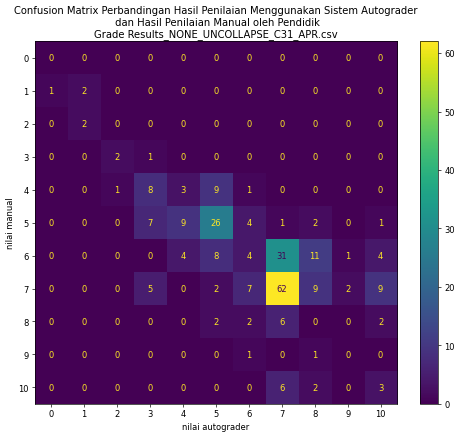

Confusion Matrix Plot of Grade Results_COUNTER_UNCOLLAPSE_C13.csv exam:


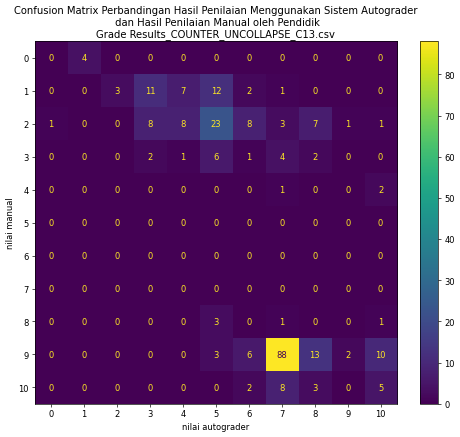

Confusion Matrix Plot of Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C13.csv exam:


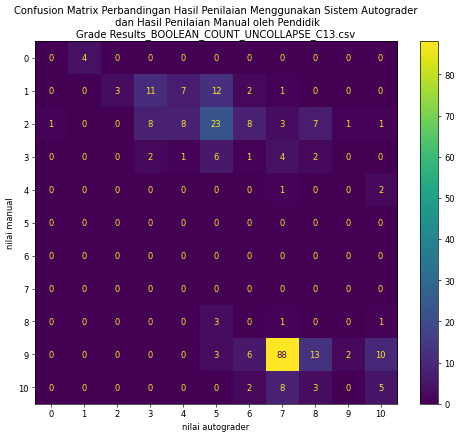

Confusion Matrix Plot of Grade Results_EXACT_UNCOLLAPSE_C31_APR.csv exam:


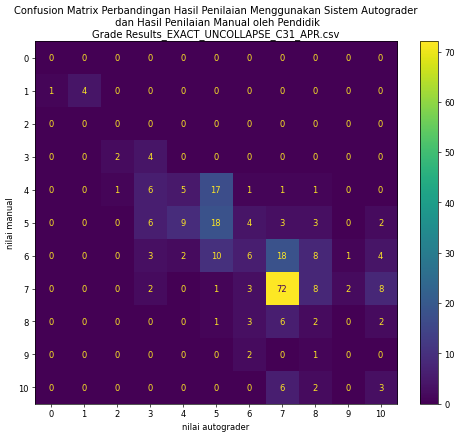

Confusion Matrix Plot of Grade Results_DAMERAU_LD_UNCOLLAPSE_C31_APR.csv exam:


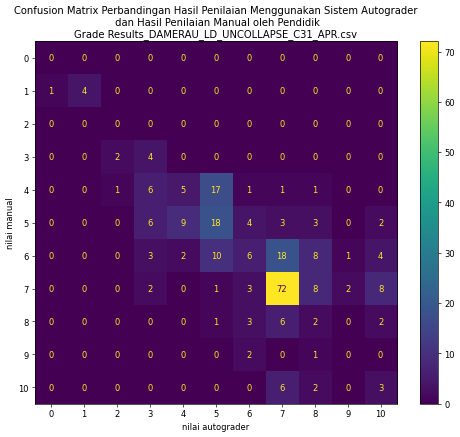

Confusion Matrix Plot of Grade Results_COUNTER_UNCOLLAPSE_C31_APR.csv exam:


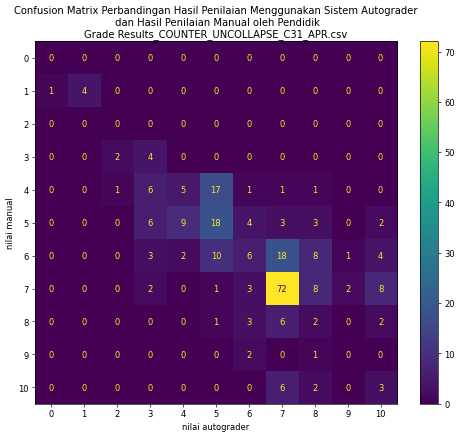

Confusion Matrix Plot of Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C31_APR.csv exam:


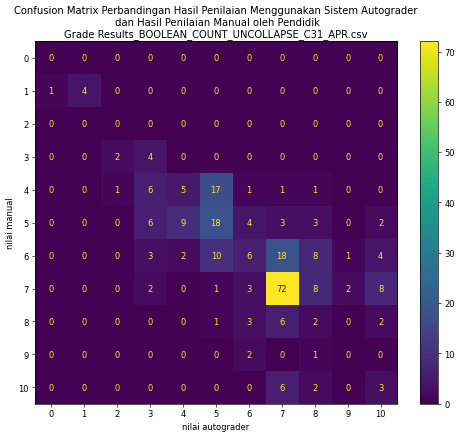

Confusion Matrix Plot of Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C12.csv exam:


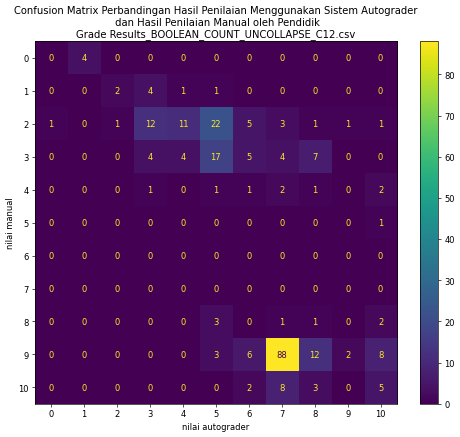

Confusion Matrix Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C32_APR.csv exam:


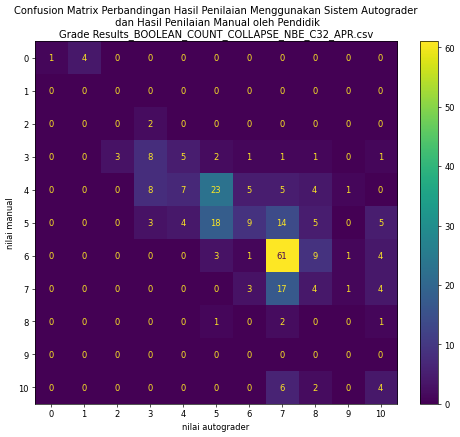

Confusion Matrix Plot of Grade Results_COUNTER_COLLAPSE_NBE_C32_APR.csv exam:


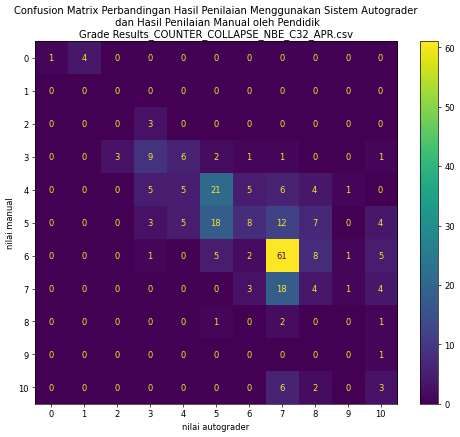

Confusion Matrix Plot of Grade Results_NONE_UNCOLLAPSE_C13.csv exam:


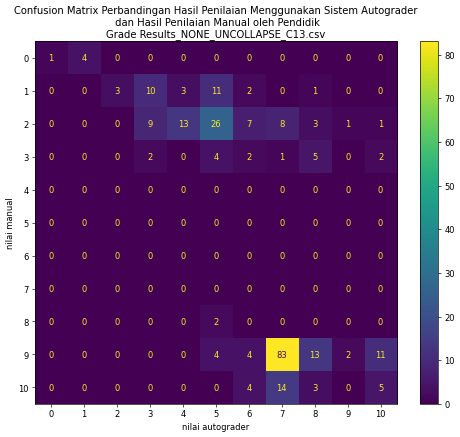

Confusion Matrix Plot of Grade Results_DAMERAU_LD_COLLAPSE_NBE_C32_APR.csv exam:


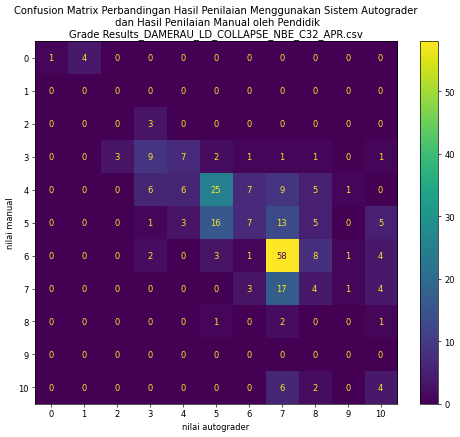

Confusion Matrix Plot of Grade Results_DAMERAU_LD_UNCOLLAPSE_C13.csv exam:


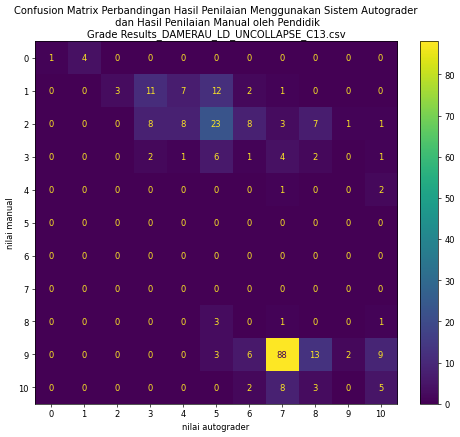

Confusion Matrix Plot of Grade Results_NONE_UNCOLLAPSE_C11_APR.csv exam:


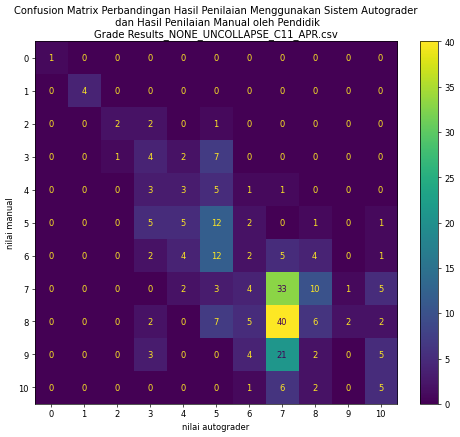

Confusion Matrix Plot of Grade Results_EXACT_UNCOLLAPSE_C21_APR.csv exam:


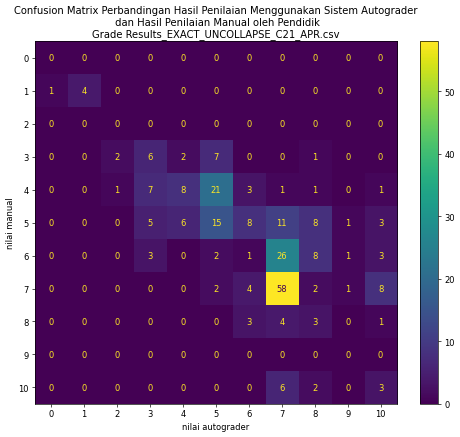

Confusion Matrix Plot of Grade Results_DAMERAU_LD_UNCOLLAPSE_C21_APR.csv exam:


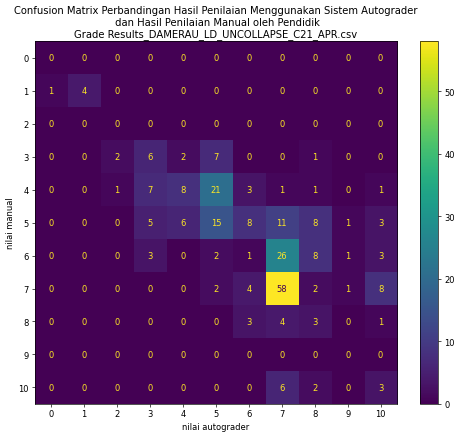

Confusion Matrix Plot of Grade Results_COUNTER_UNCOLLAPSE_C21_APR.csv exam:


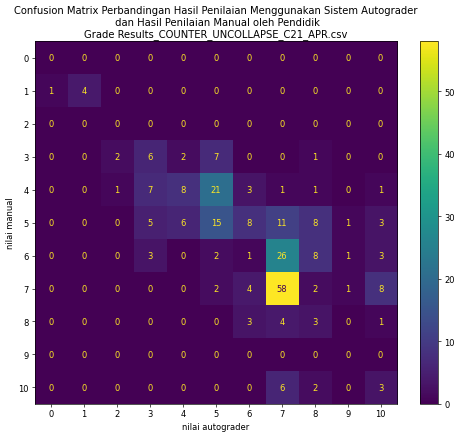

Confusion Matrix Plot of Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C21_APR.csv exam:


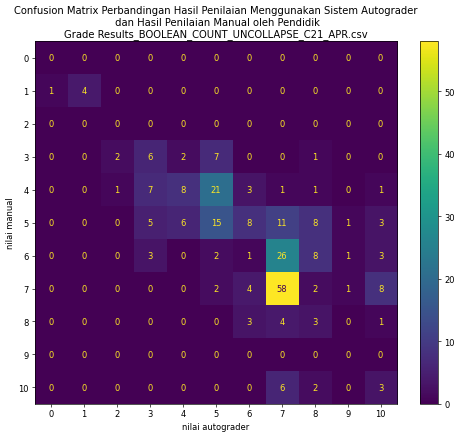

Confusion Matrix Plot of Grade Results_NONE_UNCOLLAPSE_C12_APR.csv exam:


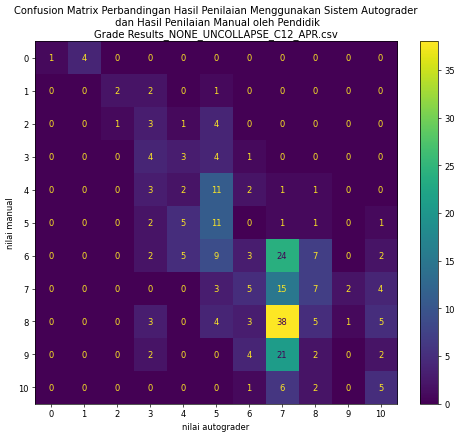

Confusion Matrix Plot of Grade Results_EXACT_COLLAPSE_NBE_C21_APR.csv exam:


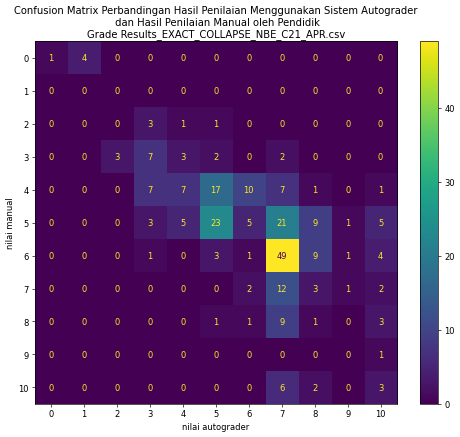

Confusion Matrix Plot of Grade Results_EXACT_UNCOLLAPSE_C12_APR.csv exam:


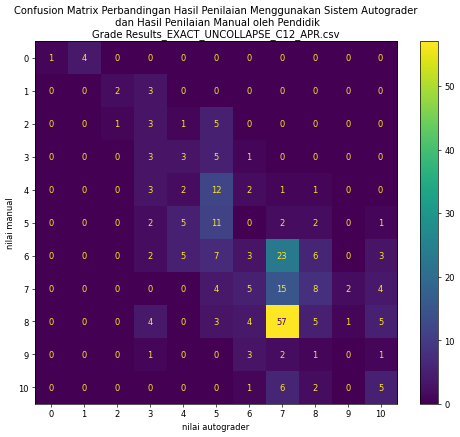

Confusion Matrix Plot of Grade Results_DAMERAU_LD_UNCOLLAPSE_C12_APR.csv exam:


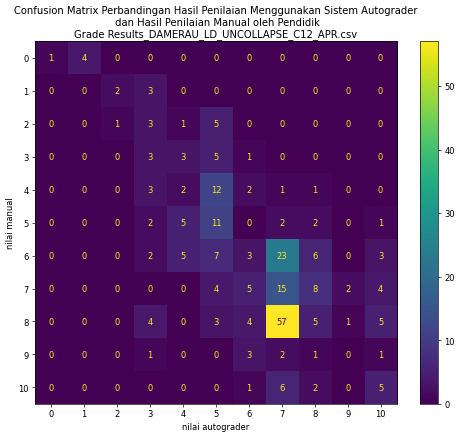

Confusion Matrix Plot of Grade Results_COUNTER_UNCOLLAPSE_C12_APR.csv exam:


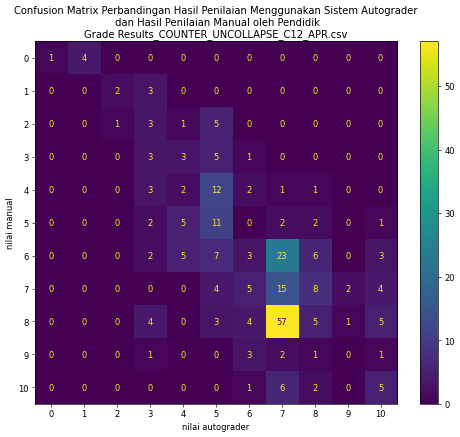

Confusion Matrix Plot of Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C12_APR.csv exam:


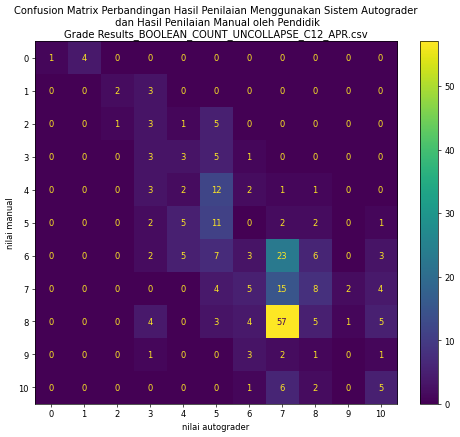

Confusion Matrix Plot of Grade Results_EXACT_UNCOLLAPSE_C11_APR.csv exam:


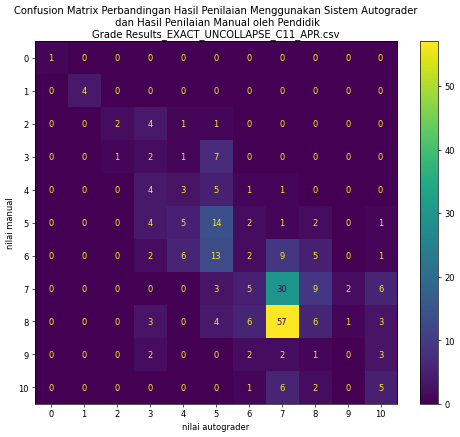

Confusion Matrix Plot of Grade Results_DAMERAU_LD_UNCOLLAPSE_C11_APR.csv exam:


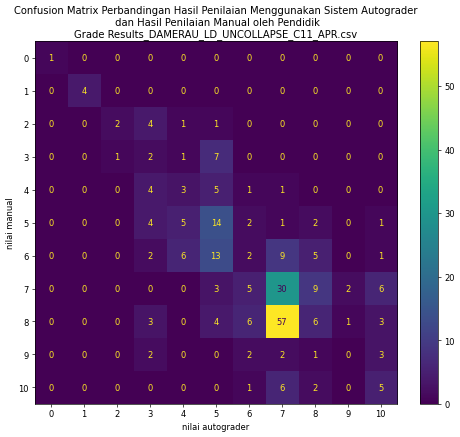

Confusion Matrix Plot of Grade Results_COUNTER_UNCOLLAPSE_C11_APR.csv exam:


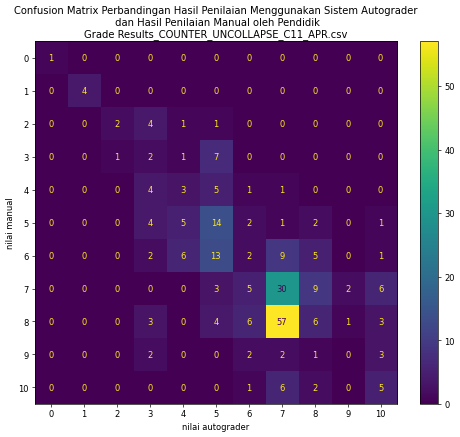

Confusion Matrix Plot of Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C11_APR.csv exam:


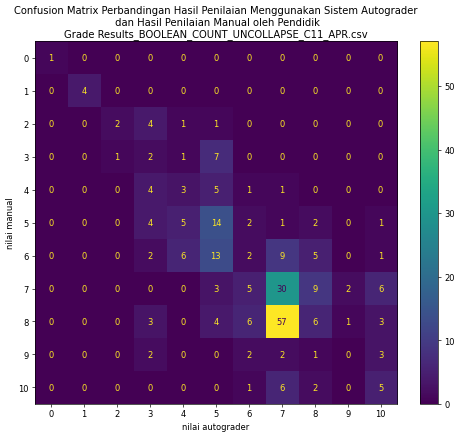

Confusion Matrix Plot of Grade Results_NONE_UNCOLLAPSE_C21_APR.csv exam:


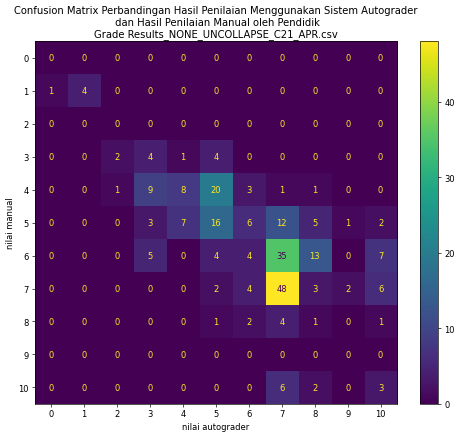

Confusion Matrix Plot of Grade Results_NONE_UNCOLLAPSE_C13_APR.csv exam:


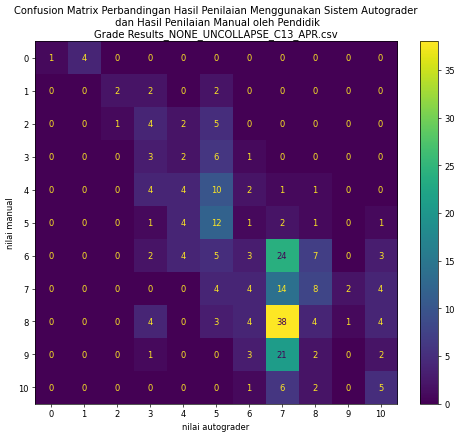

Confusion Matrix Plot of Grade Results_COUNTER_COLLAPSE_C31_APR.csv exam:


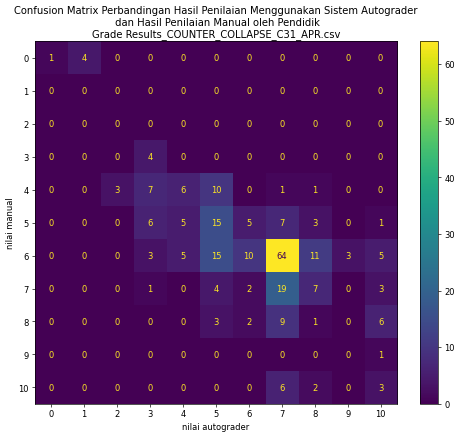

Confusion Matrix Plot of Grade Results_EXACT_COLLAPSE_NBE_C31_APR.csv exam:


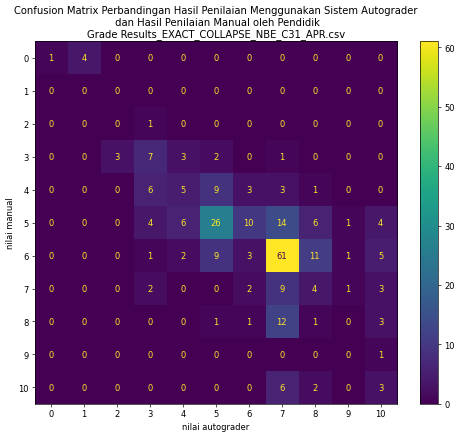

Confusion Matrix Plot of Grade Results_COUNTER_COLLAPSE_C21_APR.csv exam:


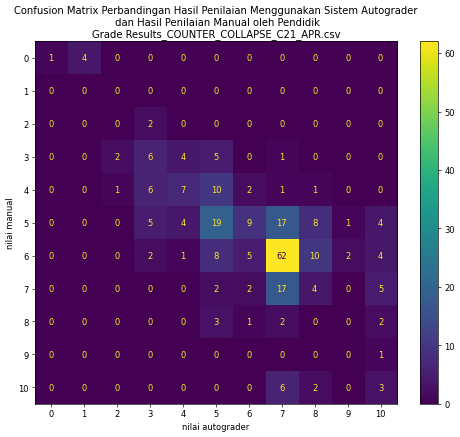

Confusion Matrix Plot of Grade Results_EXACT_COLLAPSE_NBE_C32_APR.csv exam:


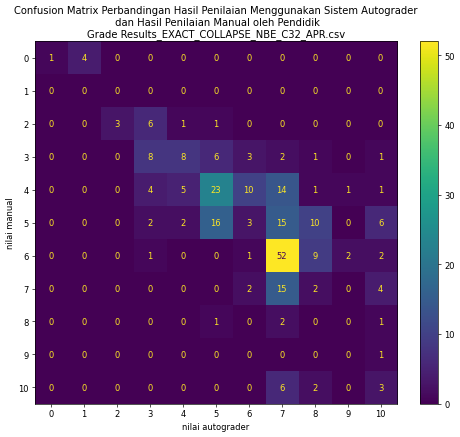

Confusion Matrix Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C23_APR.csv exam:


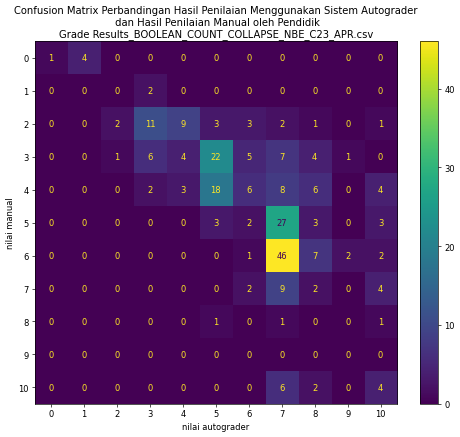

Confusion Matrix Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C11.csv exam:


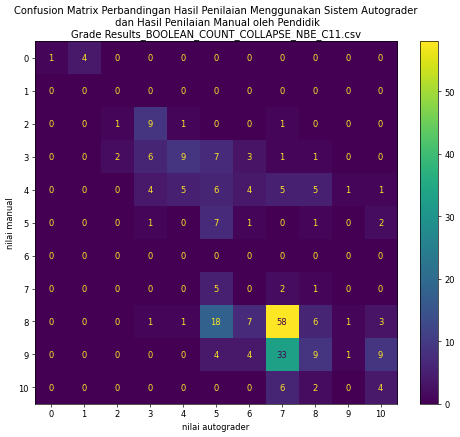

Confusion Matrix Plot of Grade Results_COUNTER_COLLAPSE_NBE_C11_APR.csv exam:


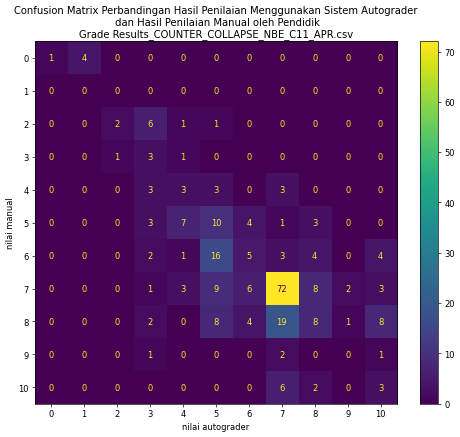

Confusion Matrix Plot of Grade Results_DAMERAU_LD_COLLAPSE_NBE_C11_APR.csv exam:


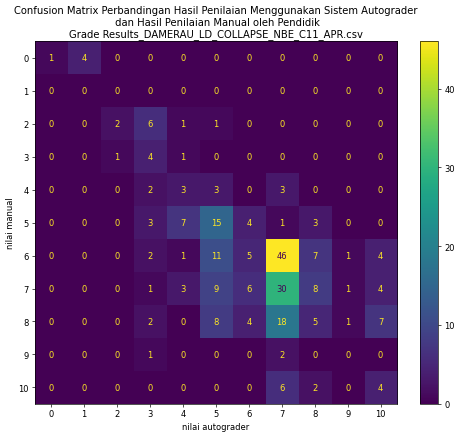

Confusion Matrix Plot of Grade Results_NONE_PROPAGATE_BRANCHING_C11_APR.csv exam:


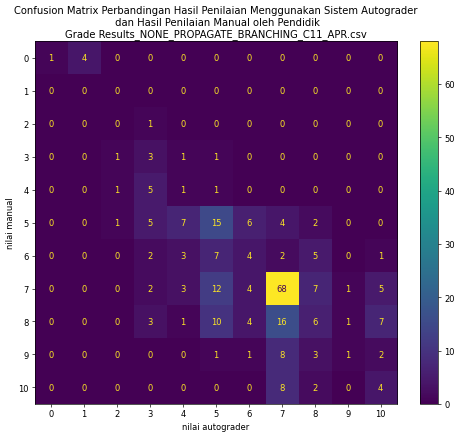

Confusion Matrix Plot of Grade Results_COUNTER_COLLAPSE_C11_APR.csv exam:


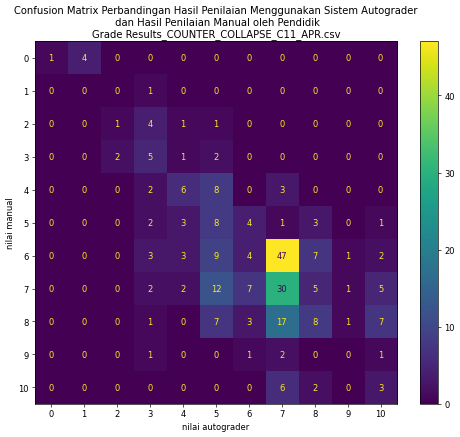

Confusion Matrix Plot of Grade Results_DAMERAU_LD_COLLAPSE_C11_APR.csv exam:


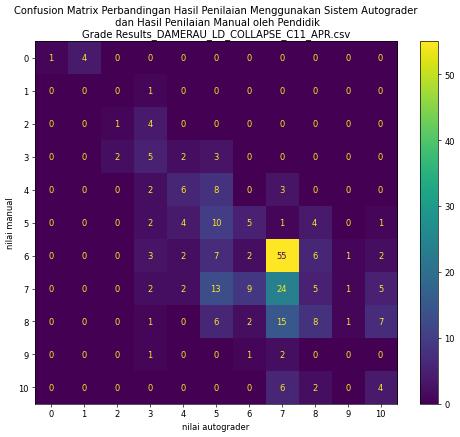

Confusion Matrix Plot of Grade Results_NONE_COLLAPSE_C31_APR.csv exam:


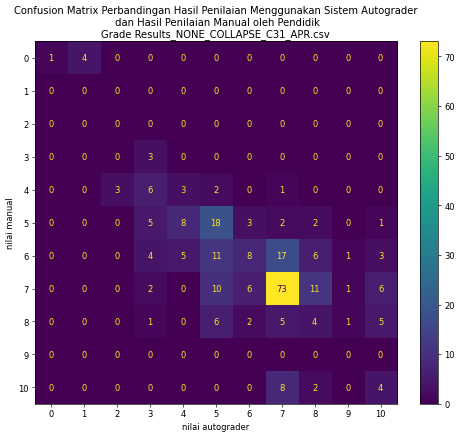

Confusion Matrix Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C11_APR.csv exam:


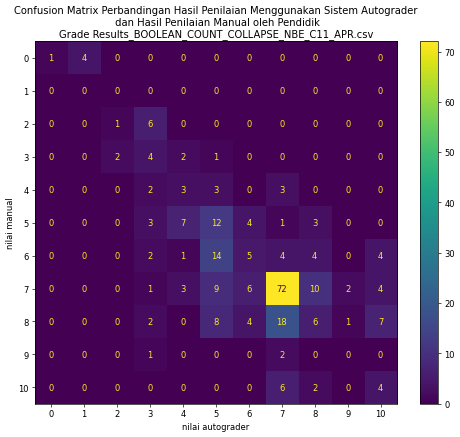

Confusion Matrix Plot of Grade Results_DAMERAU_LD_COLLAPSE_C31_APR.csv exam:


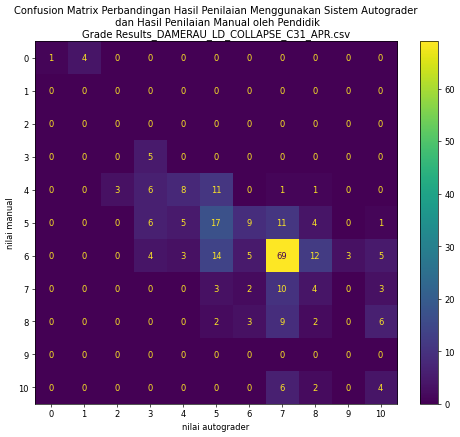

Confusion Matrix Plot of Grade Results_NONE_COLLAPSE_C11_APR.csv exam:


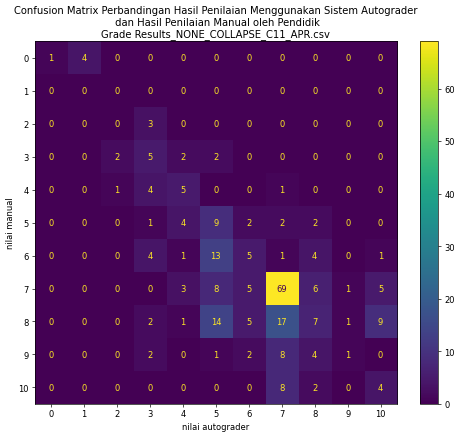

Confusion Matrix Plot of Grade Results_NONE_UNCOLLAPSE_C32_APR.csv exam:


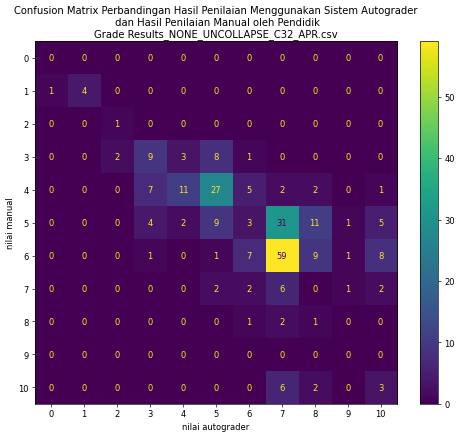

Confusion Matrix Plot of Grade Results_COUNTER_PROPAGATE_BRANCHING_C11_APR.csv exam:


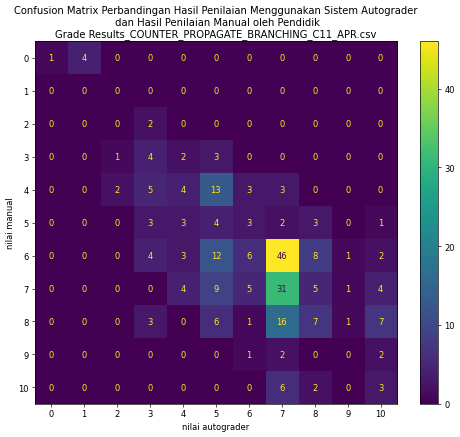

Confusion Matrix Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_C31_APR.csv exam:


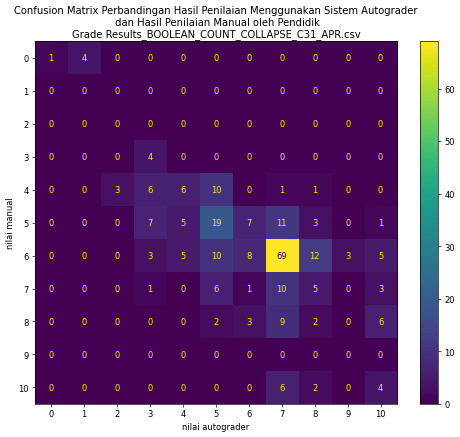

Confusion Matrix Plot of Grade Results_DAMERAU_LD_PROPAGATE_BRANCHING_C11_APR.csv exam:


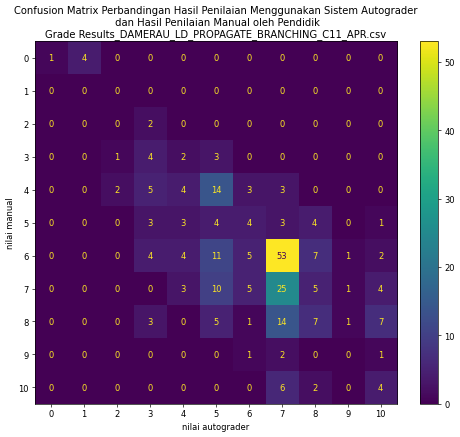

Confusion Matrix Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_C11_APR.csv exam:


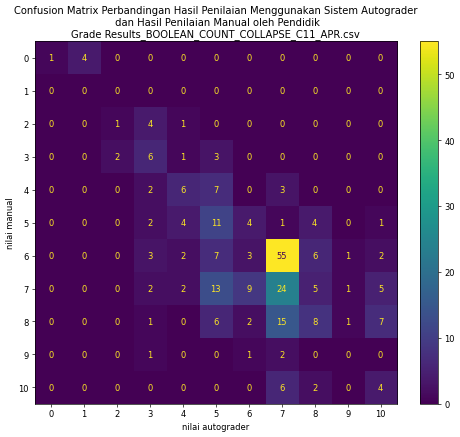

Confusion Matrix Plot of Grade Results_EXACT_COLLAPSE_NBE_C11_APR.csv exam:


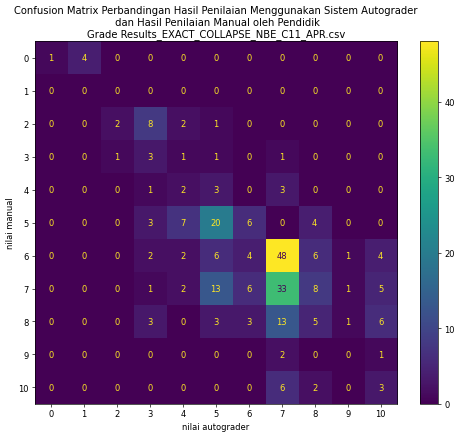

Confusion Matrix Plot of Grade Results_EXACT_UNCOLLAPSE_C32_APR.csv exam:


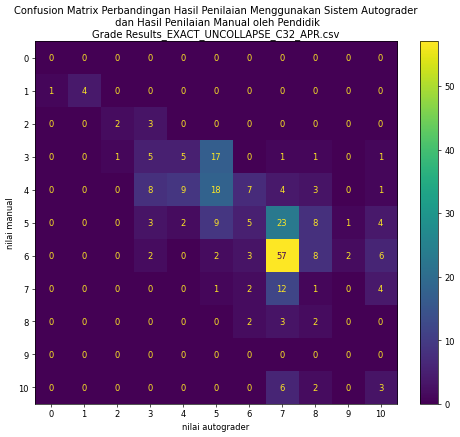

Confusion Matrix Plot of Grade Results_DAMERAU_LD_UNCOLLAPSE_C32_APR.csv exam:


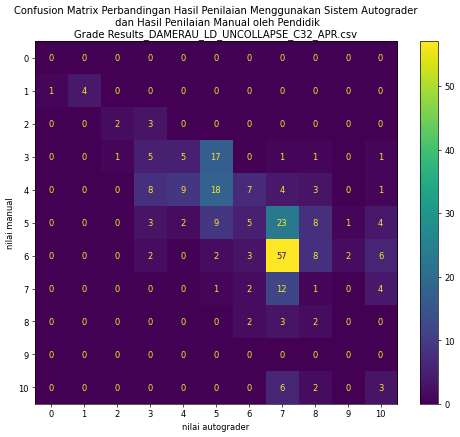

Confusion Matrix Plot of Grade Results_COUNTER_UNCOLLAPSE_C32_APR.csv exam:


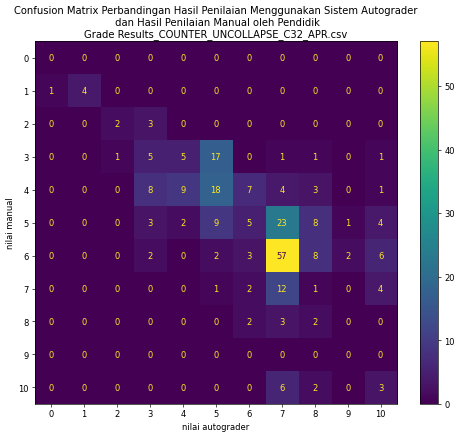

Confusion Matrix Plot of Grade Results_BOOLEAN_COUNT_UNCOLLAPSE_C32_APR.csv exam:


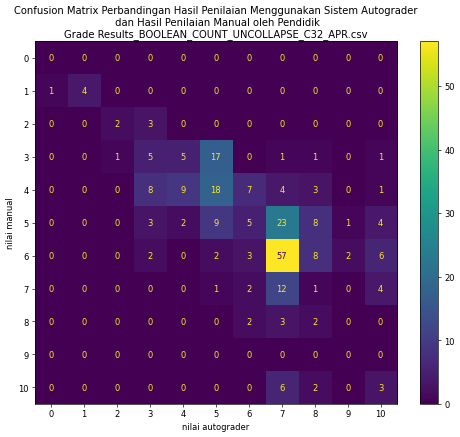

Confusion Matrix Plot of Grade Results_COUNTER_COLLAPSE_NBE_C23_APR.csv exam:


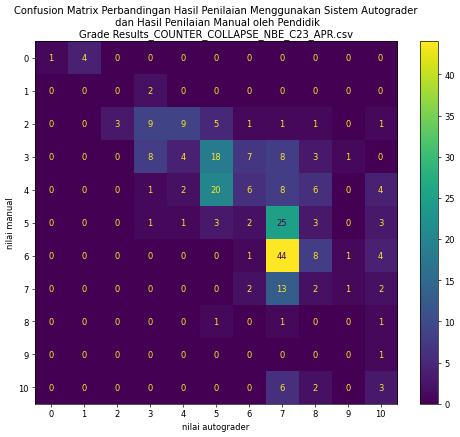

Confusion Matrix Plot of Grade Results_DAMERAU_LD_COLLAPSE_NBE_C12_APR.csv exam:


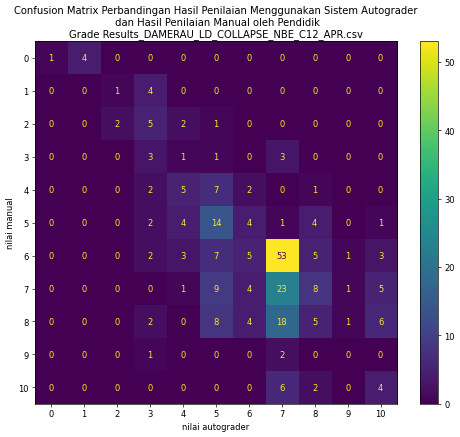

Confusion Matrix Plot of Grade Results_COUNTER_COLLAPSE_NBE_C12_APR.csv exam:


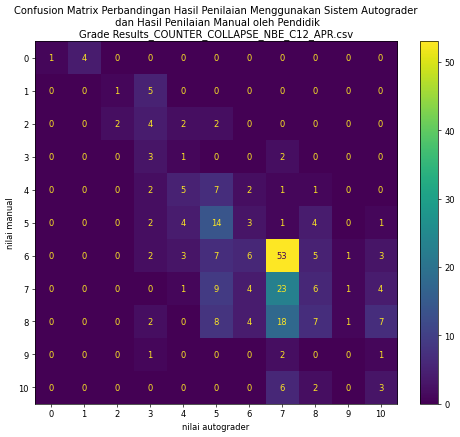

Confusion Matrix Plot of Grade Results_EXACT_COLLAPSE_C11_APR.csv exam:


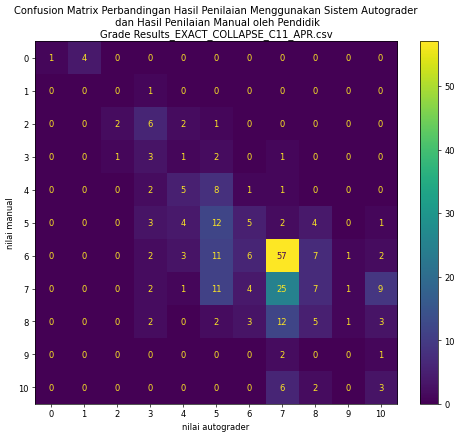

Confusion Matrix Plot of Grade Results_NONE_PROPAGATE_BRANCHING_C12_APR.csv exam:


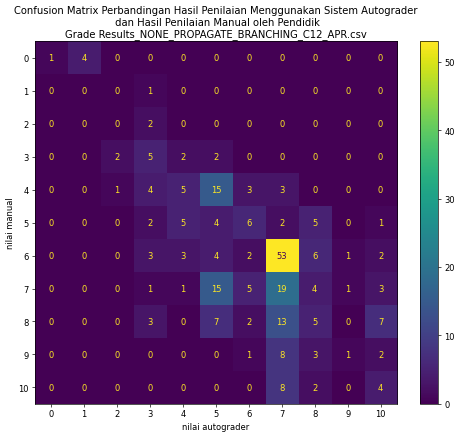

Confusion Matrix Plot of Grade Results_EXACT_COLLAPSE_NBE_C23_APR.csv exam:


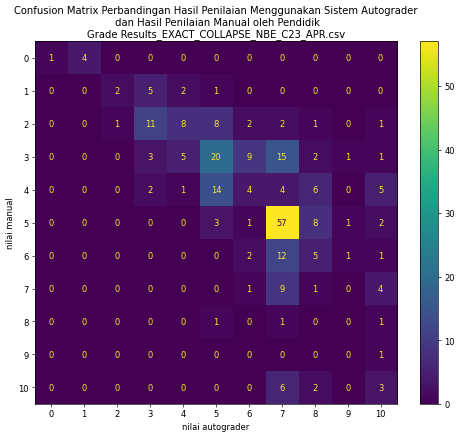

Confusion Matrix Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_NBE_C12_APR.csv exam:


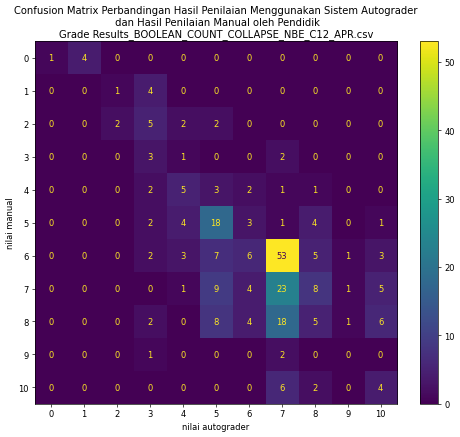

Confusion Matrix Plot of Grade Results_COUNTER_COLLAPSE_NBE_C13_APR.csv exam:


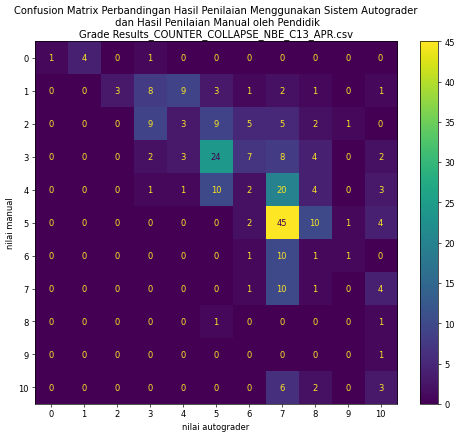

Confusion Matrix Plot of Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C11_APR.csv exam:


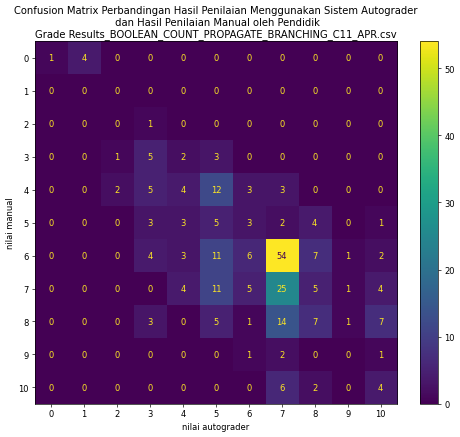

Confusion Matrix Plot of Grade Results_DAMERAU_LD_COLLAPSE_C12_APR.csv exam:


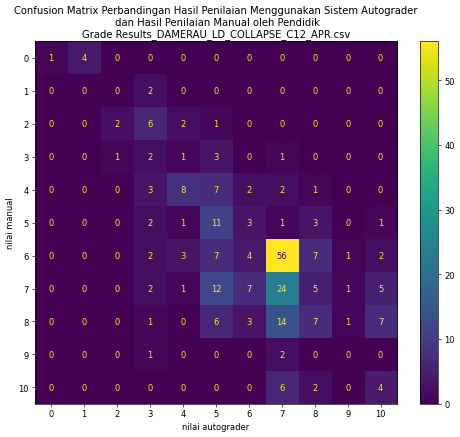

Confusion Matrix Plot of Grade Results_COUNTER_COLLAPSE_C12_APR.csv exam:


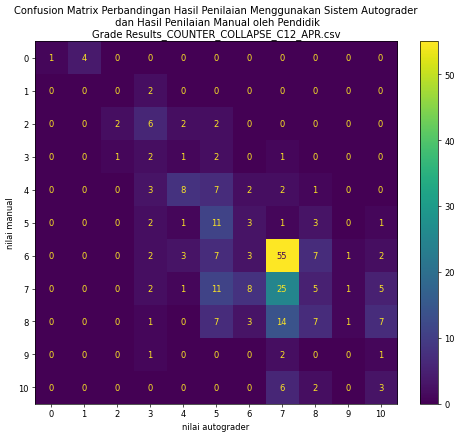

Confusion Matrix Plot of Grade Results_COUNTER_PROPAGATE_BRANCHING_C12_APR.csv exam:


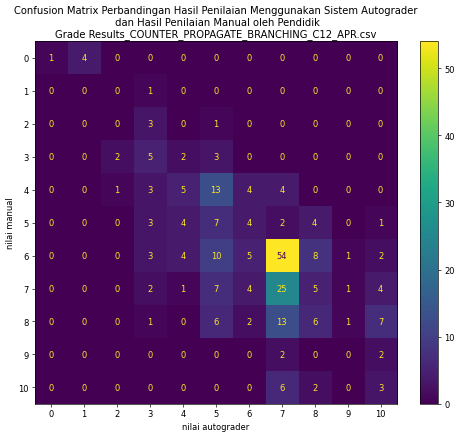

Confusion Matrix Plot of Grade Results_EXACT_COLLAPSE_NBE_C12_APR.csv exam:


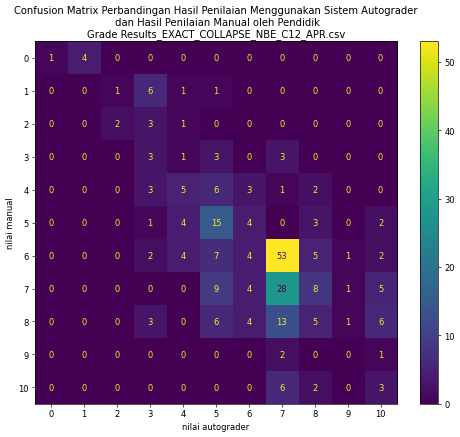

Confusion Matrix Plot of Grade Results_DAMERAU_LD_PROPAGATE_BRANCHING_C12_APR.csv exam:


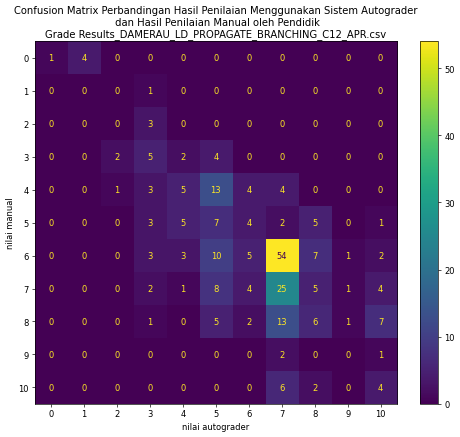

Confusion Matrix Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_C21_APR.csv exam:


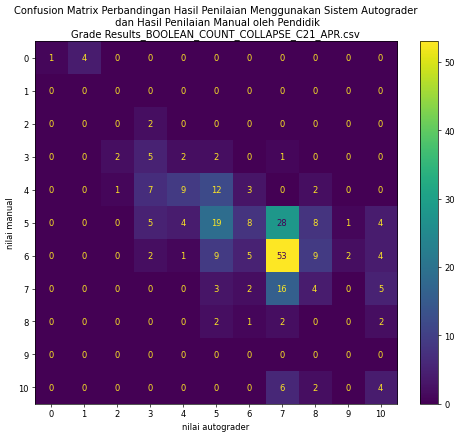

Confusion Matrix Plot of Grade Results_NONE_COLLAPSE_NBE_C11_APR.csv exam:


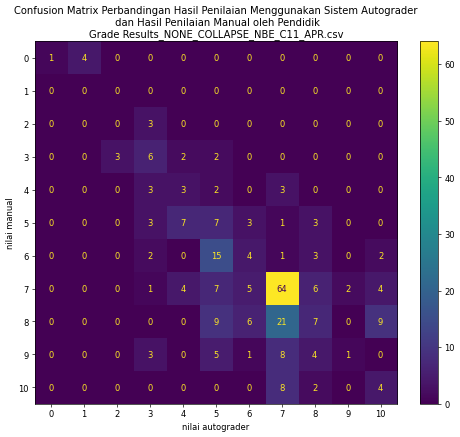

Confusion Matrix Plot of Grade Results_DAMERAU_LD_COLLAPSE_C21_APR.csv exam:


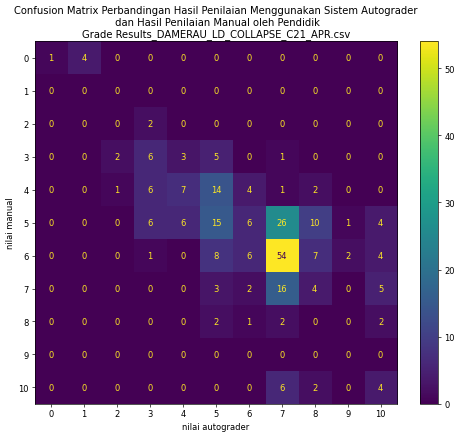

Confusion Matrix Plot of Grade Results_DAMERAU_LD_COLLAPSE_NBE_C23_APR.csv exam:


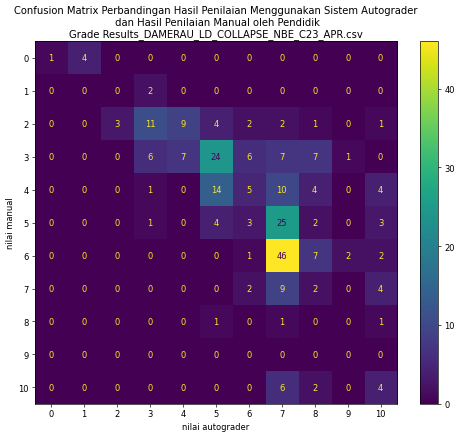

Confusion Matrix Plot of Grade Results_NONE_COLLAPSE_C12_APR.csv exam:


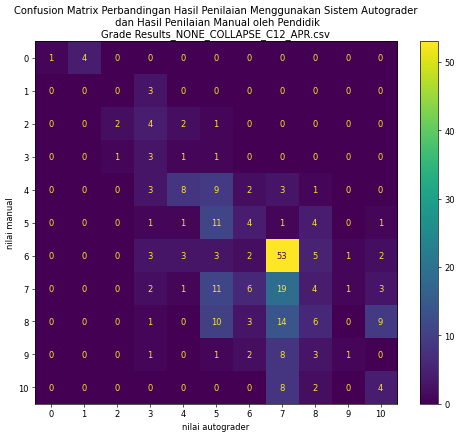

Confusion Matrix Plot of Grade Results_BOOLEAN_COUNT_COLLAPSE_C12_APR.csv exam:


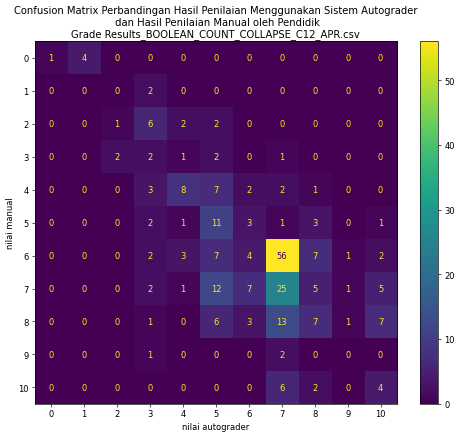

Confusion Matrix Plot of Grade Results_EXACT_COLLAPSE_C12_APR.csv exam:


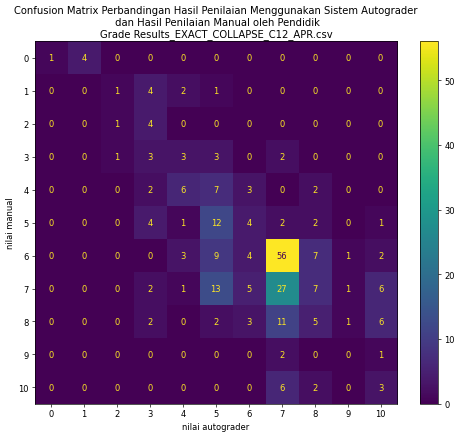

Confusion Matrix Plot of Grade Results_BOOLEAN_COUNT_PROPAGATE_BRANCHING_C12_APR.csv exam:


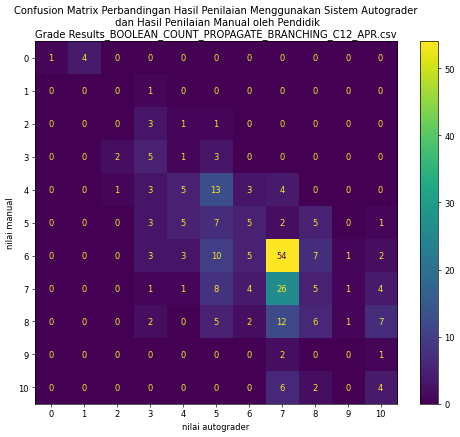

Confusion Matrix Plot of Grade Results_EXACT_PROPAGATE_BRANCHING_C11_APR.csv exam:


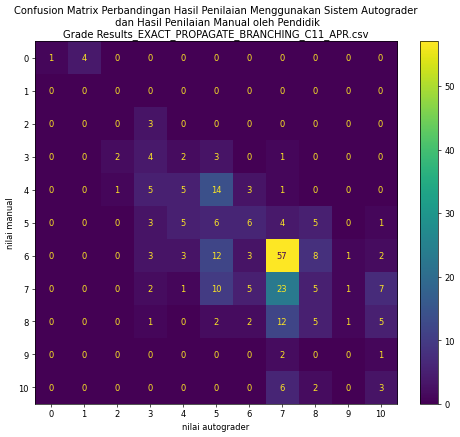

Confusion Matrix Plot of Grade Results_NONE_COLLAPSE_NBE_C12_APR.csv exam:


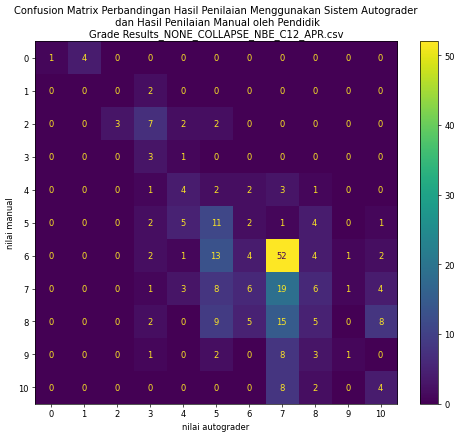

Confusion Matrix Plot of Grade Results_DAMERAU_LD_COLLAPSE_NBE_C11.csv exam:


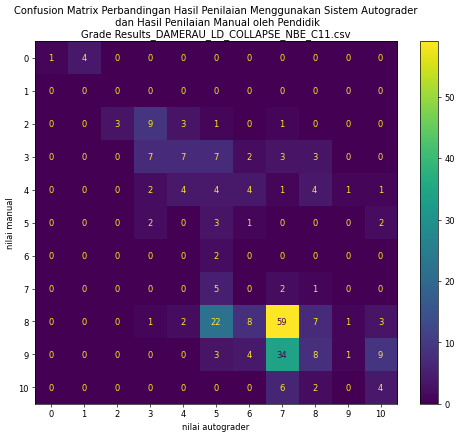

Confusion Matrix Plot of Grade Results_EXACT_PROPAGATE_BRANCHING_C12_APR.csv exam:


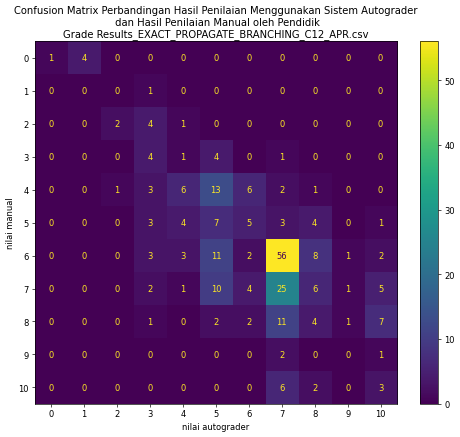

Confusion Matrix Plot of Grade Results_COUNTER_COLLAPSE_C32_APR.csv exam:


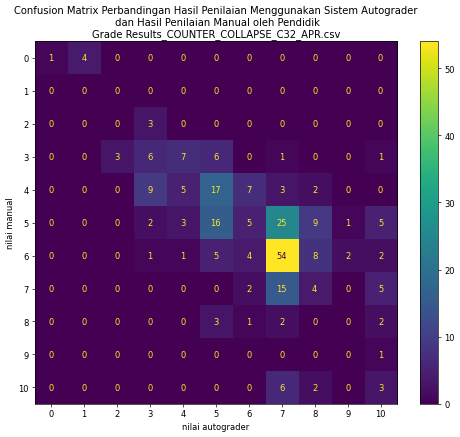

Confusion Matrix Plot of Grade Results_NONE_COLLAPSE_C13_APR.csv exam:


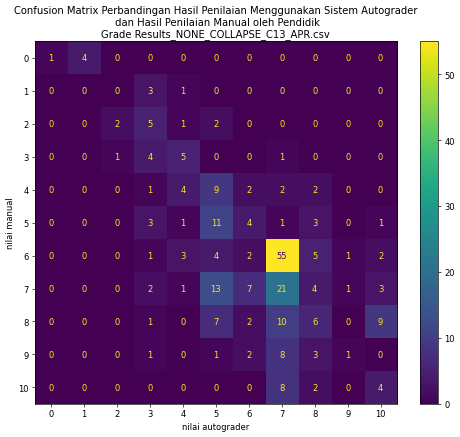

Confusion Matrix Plot of Grade Results_NONE_COLLAPSE_C21_APR.csv exam:


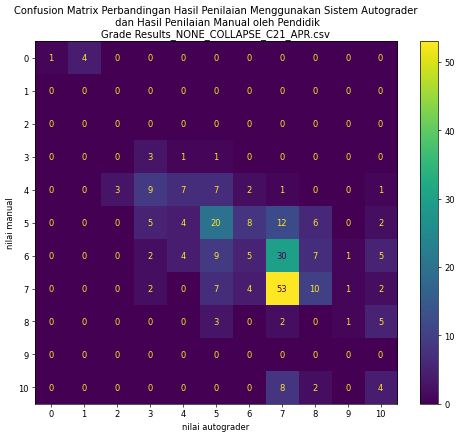

Confusion Matrix Plot of Grade Results_COUNTER_COLLAPSE_NBE_C12.csv exam:


KeyboardInterrupt: 

<Figure size 600x480 with 0 Axes>

In [11]:
# Show Confusion Matrix Plot
# for name, df in dataframes.items():
#     print(f'Confusion Matrix Plot of {name} exam:')
#     confusion_matrix_plot(name, df)
for _, name in correls:
    df = dataframes[name]
    print(f'Confusion Matrix Plot of {name} exam:')
    confusion_matrix_plot(name, df)